# FORECAST SALE MODEL


## COLAB

In [1]:
#Mount Drive as our File System
import os
drive_loc = '/content/gdrive'
files_loc = os.path.join(drive_loc, 'MyDrive', 'Colab Notebooks', 'Kschool', 'TFM')

from google.colab import drive
drive.mount(drive_loc, force_remount= True)

#This helps us to import py files located in the Drive directory
import sys
sys.path.append(os.path.abspath(files_loc))

ModuleNotFoundError: No module named 'google.colab'

In [ ]:
pip install fitter

In [ ]:
pip install -U scikit-learn

In [ ]:
pip install "statsmodels==0.12.2"

## All Functions defined for this Project

In [9]:
#Module with all functions needed
from functions import *

In [10]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Constant Section

In [11]:
#File names

#Data set to train
my_train_file = "./data_v1.xlsx"

#Data set to validate
my_validate_file = "./data_validate_v1.xlsx"

#Pickle file name
pickle_file = 'object.pkl'

In [12]:
#Set all Visualization Parameters

#Parameters
visual_parameters = dict(
    {'figure.figsize': [20, 10], #Size of the plot
     'font.size': 15, #Font size
     'xtick.labelsize': 15, #Font size in X
     'ytick.labelsize': 15, #Font size in Y
     'xtick.direction': 'inout',
     'ytick.direction': 'inout',
})

#Apply all parameters
for parameter in visual_parameters:
    plt.rcParams[parameter] = visual_parameters[parameter]

#Apply Theme style
style = 'seaborn-darkgrid' #Theme style
plt.style.use(style)

In [13]:
#A list all Continuous Distributions available in Scipy

stats = [
    'alpha', 'anglit', 'arcsine', 'argus', 'beta',
    'betaprime', 'bradford', 'burr', 'burr12', 'cauchy',
    'chi', 'chi2', 'cosine', 'crystalball', 'dgamma',
    'dweibull', 'erlang', 'expon', 'exponnorm', 'exponweib',
    'exponpow', 'f', 'fatiguelife', 'fisk', 'foldcauchy',
    'foldnorm', 'genlogistic', 'gennorm', 'genpareto',
    'genexpon', 'genextreme', 'gausshyper', 'gamma', 'gengamma', 
    'genhalflogistic', 'geninvgauss', 'gilbrat', 'gompertz', 'gumbel_r',
    'gumbel_l', 'halfcauchy', 'halflogistic', 'halfnorm',
    'halfgennorm', 'hypsecant', 'invgamma', 'invgauss', 'invweibull',
    'johnsonsb', 'johnsonsu', 'kappa4', 'kappa3', 'ksone',
    'kstwo', 'kstwobign', 'laplace', 'laplace_asymmetric', 'levy',
    'levy_l', 'levy_stable', 'logistic', 'loggamma', 'loglaplace',
    'lognorm', 'loguniform', 'lomax', 'maxwell', 'mielke',
    'moyal', 'nakagami', 'ncx2', 'ncf', 'nct',
    'norm', 'norminvgauss', 'pareto', 'pearson3', 'powerlaw',
    'powerlognorm', 'powernorm', 'rdist', 'rayleigh', 'rice',
    'recipinvgauss', 'semicircular', 'kewnorm', 't', 'trapezoid',
    'triang', 'truncexpon', 'truncnorm', 'tukeylambda', 'uniform',
    'vonmises', 'vonmises_line', 'wald', 'weibull_min', 'weibull_max', 'wrapcauchy'
]

In [14]:
#Pandas Parameters

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

## Exploratory Data Analysis

Let's analyze what is the size of our observations and columns. Is there any Nan or check the type of the data. This should be the starting point of any Data Science Project.

In [15]:
#Load the main data
data = pd.read_excel(my_train_file)
data

Date          Program  Visits  Revenue
0      2015-01-01 23:59:59              SEO       0  2317.14
1      2015-01-01 23:59:59              SEO       0   903.10
2      2015-01-01 23:59:59              SEO    2844     0.00
3      2015-01-01 23:59:59           Direct       0    24.31
4      2015-01-01 23:59:59           Direct     937     0.00
...                    ...              ...     ...      ...
106691 2021-05-09 23:59:59  ::unspecified::      21     0.00
106692 2021-05-09 23:59:59      Paid Social    1050     0.00
106693 2021-05-09 23:59:59   Organic Social      19     0.00
106694 2021-05-09 23:59:59            Other       4     0.00
106695 2021-05-09 23:59:59           Social       0     0.00

[106696 rows x 4 columns]

In [16]:
#Dimension of the Dataset
data.shape
#More than 106K records and 4 columns

(106696, 4)

In [17]:
#Let's check if there is any NaN
data.isna().sum()

Date       0
Program    0
Visits     0
Revenue    0
dtype: int64

In [18]:
data.dtypes

Date       datetime64[ns]
Program            object
Visits              int64
Revenue           float64
dtype: object

In [19]:
#Let's check if there is a zero value in Revenue
check = data.groupby(['Date'])['Revenue'].sum().reset_index()
check_zeros = check[check['Revenue'] == 0]
check_zeros

Date  Revenue
66   2015-03-08 23:59:59      0.0
163  2015-06-13 23:59:59      0.0
387  2016-01-23 23:59:59      0.0
450  2016-03-26 23:59:59      0.0
924  2017-07-13 23:59:59      0.0
1930 2020-04-14 23:59:59      0.0

In [20]:
#There are some and we are going to estimate the Revenue, we are going to use the 
#Mean between Revenue day before and day after and we are going to apply that one to Direct Traffic
data = fill_zero_revenue(data)

In [21]:
#No Zero in Revenue
check = data.groupby(['Date'])['Revenue'].sum().reset_index()
check_zeros = check[check['Revenue'] == 0]
check_zeros

Empty DataFrame
Columns: [Date, Revenue]
Index: []

In [22]:
#Validate Set
data_validate = pd.read_excel(my_validate_file)
data_validate

Date          Program  Visits  Revenue
0    2021-05-10 23:59:59           Direct       1  4212.66
1    2021-05-10 23:59:59           Direct       1  3488.05
2    2021-05-10 23:59:59           Direct       1  2926.59
3    2021-05-10 23:59:59           Direct       1  2584.90
4    2021-05-10 23:59:59           Direct       1  1374.33
...                  ...              ...     ...      ...
2740 2021-06-13 23:59:59      Paid Social    1247     0.00
2741 2021-06-13 23:59:59   Organic Social      17     0.00
2742 2021-06-13 23:59:59  ::unspecified::       5     0.00
2743 2021-06-13 23:59:59            Other       0     0.00
2744 2021-06-13 23:59:59           Social       0     0.00

[2745 rows x 4 columns]

## Distribution and briefly Statistical Analysis

It is important analyze the Revenue behave. We are going to exclude the Program Variable and just keep Year, Month, Day, Visits and Revenue.

In [23]:
data

Date          Program  Visits  Revenue
0      2015-01-01 23:59:59              SEO       0  2317.14
1      2015-01-01 23:59:59              SEO       0   903.10
2      2015-01-01 23:59:59              SEO    2844     0.00
3      2015-01-01 23:59:59           Direct       0    24.31
4      2015-01-01 23:59:59           Direct     937     0.00
...                    ...              ...     ...      ...
106691 2021-05-09 23:59:59  ::unspecified::      21     0.00
106692 2021-05-09 23:59:59      Paid Social    1050     0.00
106693 2021-05-09 23:59:59   Organic Social      19     0.00
106694 2021-05-09 23:59:59            Other       4     0.00
106695 2021-05-09 23:59:59           Social       0     0.00

[106696 rows x 4 columns]

In [24]:
#Manipulate the DataFrame a little bit. Modifying the Dates
data_small = split_dates_by_columns(data, 'Date')
#For this early stage I discard type of Traffic and just sum all of them and group by Index, Year, Month and Day
data_small = data_small.groupby(['Date', 'Year','Month','Day'])[['Visits','Revenue']].sum()
#Reset Index after having made a groupby
data_small = data_small.reset_index(['Year', 'Month', 'Day'])
#Resample to D and 00h00min00sec
data_small = data_small.resample('D', offset='00h00min00sec').sum()
data_small.tail(5)

Year  Month  Day  Visits   Revenue
Date                                          
2021-05-05  2021      5    5   14373  37283.53
2021-05-06  2021      5    6   14025  39991.11
2021-05-07  2021      5    7   12399  24901.84
2021-05-08  2021      5    8   11018  15744.14
2021-05-09  2021      5    9   13924  19703.32

In [25]:
#Do the same for the Validation set
data_validation = split_dates_by_columns(data_validate, 'Date')
#For this early stage I discard type of Traffic and just sum all of them and group by Index, Year, Month and Day
data_validation = data_validation.groupby(['Date', 'Year','Month','Day'])[['Visits','Revenue']].sum()
#Reset Index after having made a groupby
data_validation = data_validation.reset_index(['Year', 'Month', 'Day'])
#Resample to D and 00h00min00sec
data_validation = data_validation.resample('D', offset='00h00min00sec').sum()
data_validation.head(5)

Year  Month  Day  Visits    Revenue
Date                                           
2021-05-10  2021      5   10   14985   38859.97
2021-05-11  2021      5   11   15054   62814.95
2021-05-12  2021      5   12   15321   34882.23
2021-05-13  2021      5   13   14933   47518.14
2021-05-14  2021      5   14   15955  100651.00

In [26]:
#Lets check it out how this looks like and we can see that we have 2293 rows of data. Original one was 104793 rows
data_small.shape

(2321, 5)

In [22]:
#Let's see the main descriptive statistics
data_small.describe()

Year        Month          Day         Visits        Revenue
count  2321.000000  2321.000000  2321.000000    2321.000000    2321.000000
mean   2017.694959     6.308057    15.680310   13433.658337   25825.089417
std       1.843913     3.479171     8.807686    8616.702674   38526.622896
min    2015.000000     1.000000     1.000000     245.000000      46.420000
25%    2016.000000     3.000000     8.000000    7858.000000    9739.620000
50%    2018.000000     6.000000    16.000000   10223.000000   18558.480000
75%    2019.000000     9.000000    23.000000   16581.000000   32819.390000
max    2021.000000    12.000000    31.000000  109148.000000  858333.560000

What we can see here, Revenue is much more scattered than Visits

In [20]:
#Outliners Analysis
#There are number way above 100.000. Those are some outliners
sorted(data_small['Revenue'], reverse=True)

[858333.5600000034,
 784321.290000003,
 590327.1899999998,
 563812.3999999989,
 529061.6699999995,
 334605.57000000076,
 311593.59999999957,
 304644.9999999996,
 206742.70999999996,
 192917.33000000007,
 191231.44000000012,
 187432.28999999983,
 186791.86000000004,
 171407.57999999987,
 169560.74000000005,
 167811.78999999986,
 153453.7500000001,
 139222.25999999998,
 132259.49000000002,
 132244.95,
 131383.15999999992,
 130645.76999999989,
 124783.69999999997,
 124024.70000000022,
 117069.57999999999,
 115680.39000000003,
 112899.65000000001,
 111940.03999999998,
 109272.9500000002,
 107702.02999999996,
 107599.70999999995,
 104098.95000000004,
 101380.1800000001,
 100517.25999999995,
 98058.94000000002,
 97243.22999999998,
 95266.08000000016,
 94826.27,
 93087.03000000006,
 92653.50999999995,
 92156.65000000002,
 91074.79,
 90887.97000000009,
 90056.15,
 89374.43000000004,
 88473.35000000008,
 87368.04000000008,
 86168.33999999995,
 84098.13000000002,
 83723.62,
 82678.79,
 81664.65,

In [21]:
#High Variability in Revenue
pearson_revenue = data_small['Revenue'].std() / data_small['Revenue'].mean()
#Visit Variability is less than Revenue but it is above 0.5
pearson_traffic = data_small['Visits'].std() / data_small['Visits'].mean()
print(f'Pearson\'s coefficient of variation - Revenue: {pearson_revenue:.2%}')
print(f'Pearson\'s coefficient of variation - Visits: {pearson_traffic:.2%}')

Pearson's coefficient of variation - Revenue: 150.37%
Pearson's coefficient of variation - Visits: 64.57%


We can see how the Revenue evolution across time. There are some big outliners due to the BlackFriday and Cyber Monday. Those exceptional days could affect in our model but we cannot remove them. However, maybe we can create a specific model for those ones and remove them for this model. Let's see

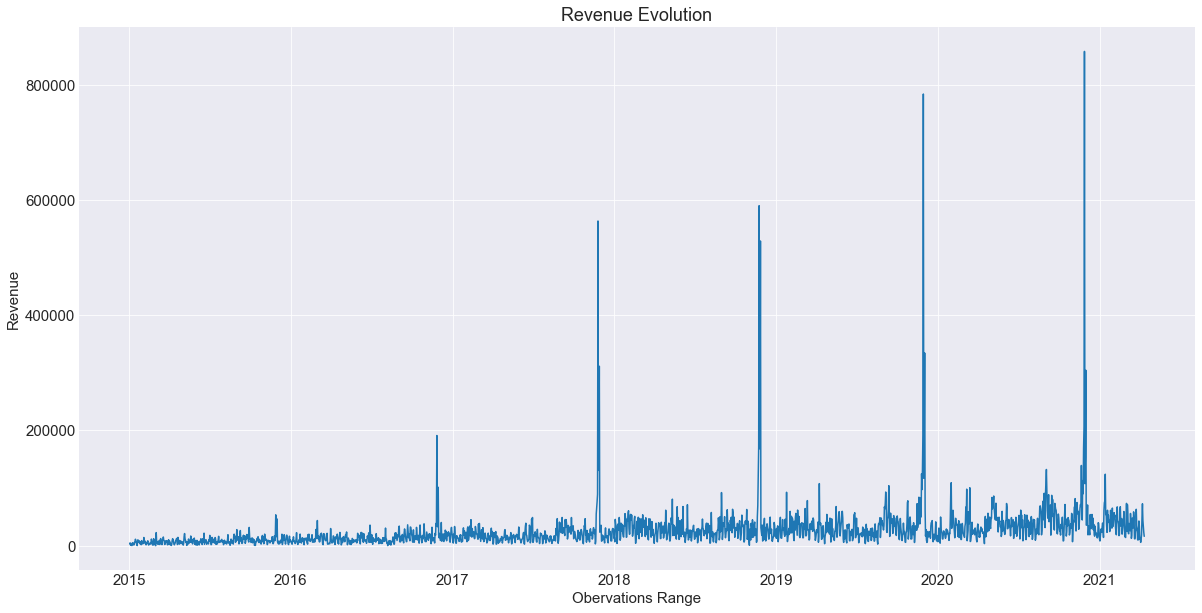

In [96]:
draw_plot(data_small, 'Revenue')

Let's see the behaviour of the Revenue and Visits and how good or bad they adjust with one polynomial.

Revenue: This daily granularity does not help to find a simple polynomial to adjust
Visits: Shows almost same issues as Revenue if we take data at daily basis

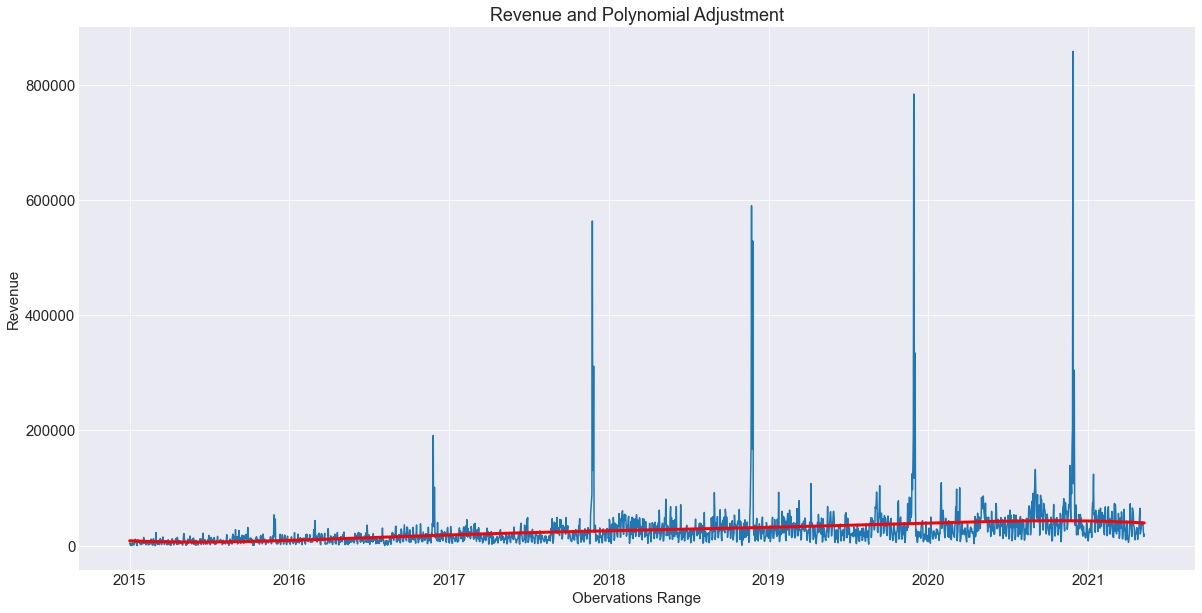

In [297]:
draw_least_squares_polynomial(data_small, data_small.columns[-1], 5)

Besides the target variable which is Revenue, Visits is another important variable which affects importantly the Revenue metric. Let's see how this looks like

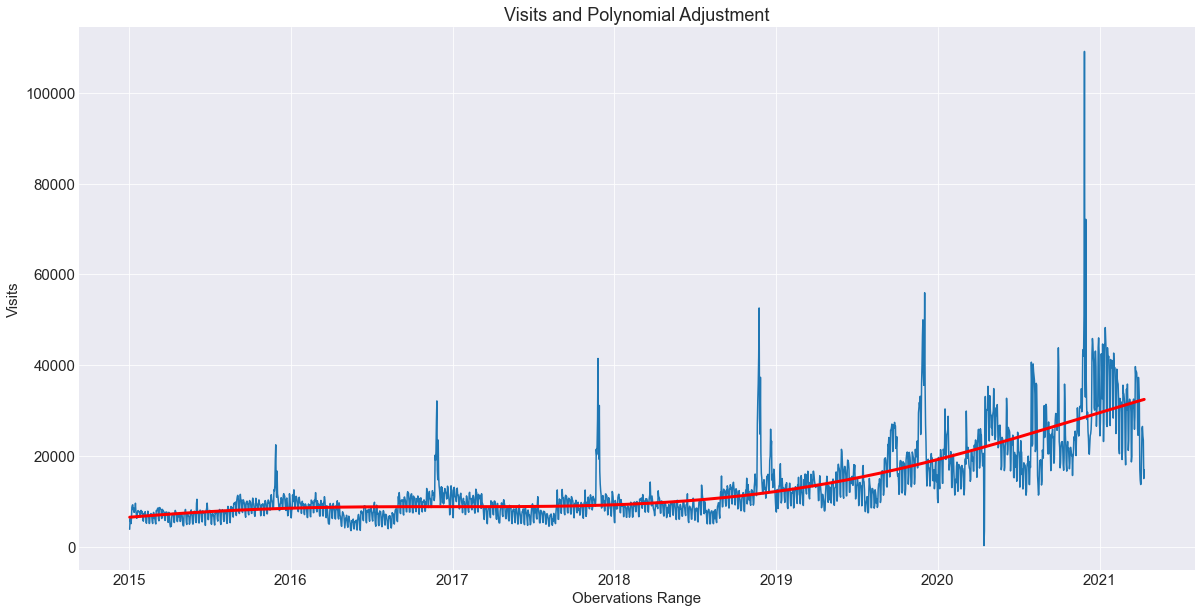

In [108]:
draw_least_squares_polynomial(data_small, data_small.columns[-2], 5)

We can see three different Distribution of our target variable, Revenue:
* Regular Distribution
* Logarithmic Distribution
* Square Transformation

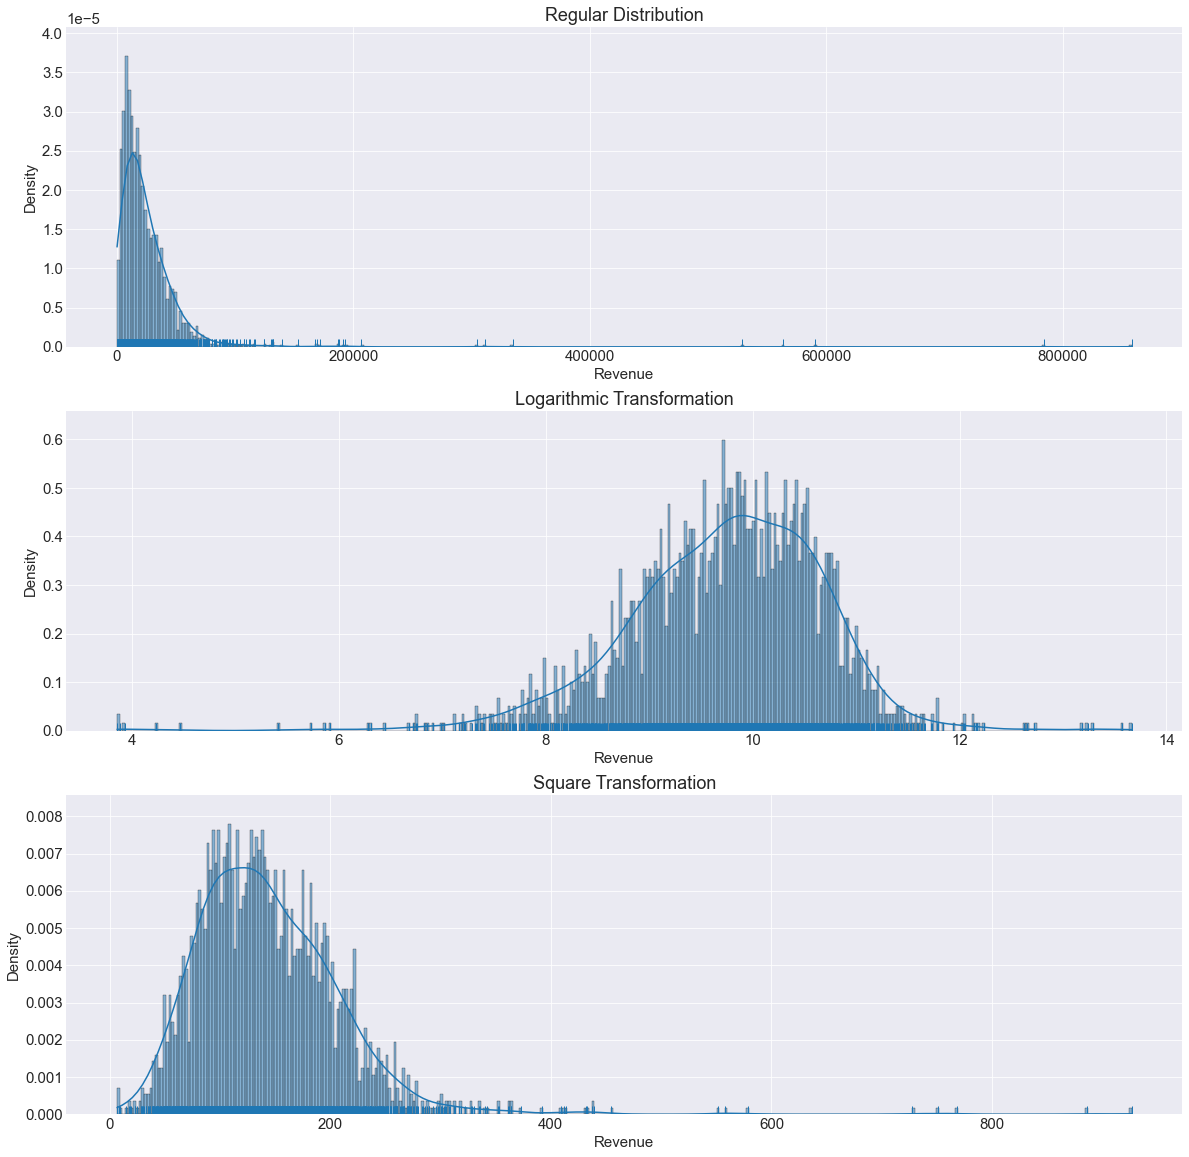

In [100]:
draw_set_of_distributions(data_small, 'Revenue');

Thanks to the Fitter library, we can test multiple Distributions with our target one and check what fits more. Here the results:
* Regular Distribution best fit with **Log-Normal**
* Logarithmic Distribution best fit with **Burr 12** is a subset of the log-logistic and quite similar like Log-Normal but heavier tails
* Square Transformation best fit with **Normal Inverse Gaussian**

{'burr12': (1.6550598046949772,
  1.9283154101132984,
  -124.38283102653897,
  30558.047377748087)}

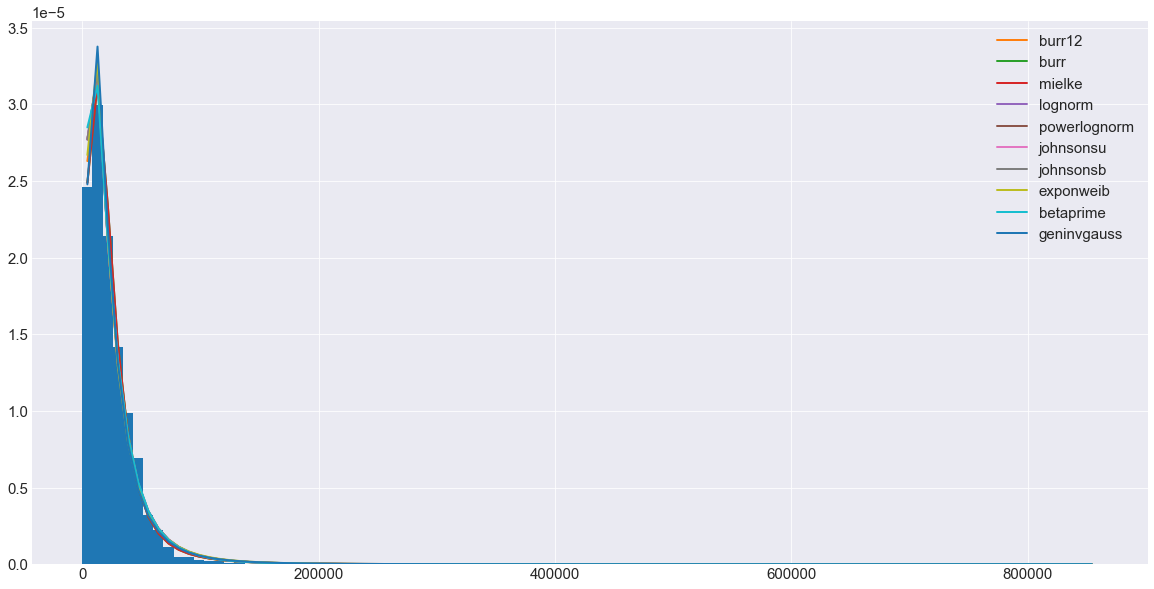

In [77]:
#Let's analyze what Distribution fits better with Revenue
fitter_norm = Fitter(data_small['Revenue'], distributions=stats)
fitter_norm.fit()
fitter_norm.summary(Nbest=10, plot=True)
fitter_norm.get_best(method='sumsquare_error')

sumsquare_error          aic           bic  kl_div
burr12              0.036928  1282.717262 -25275.520096     inf
gengamma            0.048424  1452.675023 -24654.039674     inf
genlogistic         0.049086  1166.894543 -24630.655806     inf
johnsonsu           0.049183  1091.908553 -24618.408684     inf
loggamma            0.051255  1478.166938 -24531.516419     inf
powernorm           0.053807  1517.242742 -24420.109465     inf
johnsonsb           0.059600  1575.373658 -24177.905147     inf
exponweib           0.068584  1548.409773 -23855.958886     inf
pearson3            0.070857  1687.046627 -23788.917109     inf
beta                0.073096  1665.792612 -23709.862413     inf

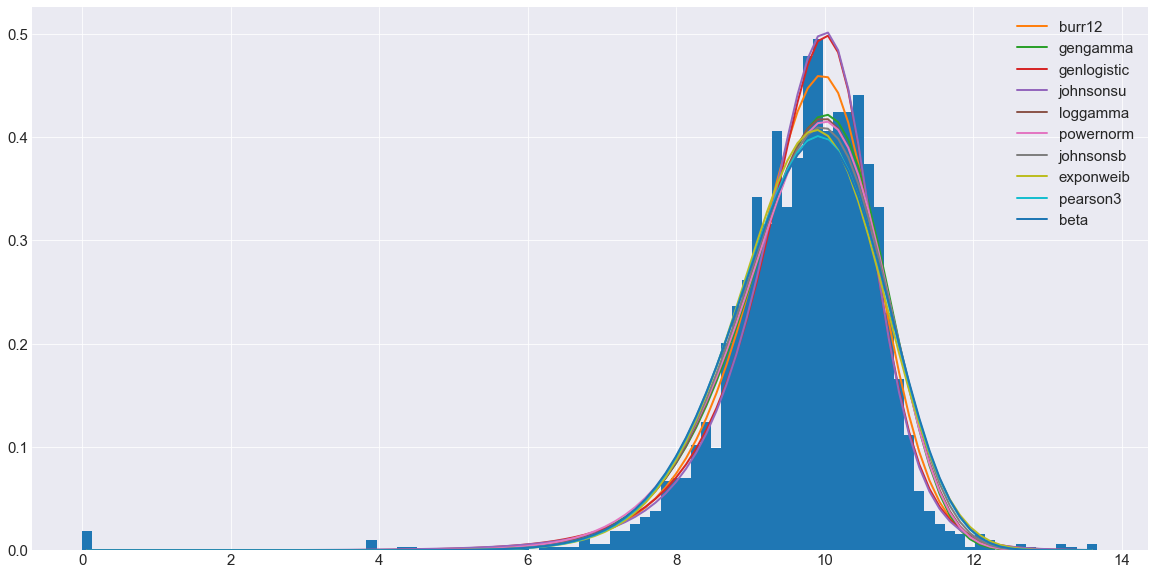

In [41]:
#Let's analyze what Distribution fits better with Revenue after a logarithmic transformation
fitter_log = Fitter(np.log1p(data_small['Revenue']), distributions=stats)
fitter_log.fit()
fitter_log.summary(Nbest=10, plot=True)
fitter_log.get_best(method='sumsquare_error')

/home/dsc/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:4523: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  intg = integrate.quad(f, -xi, np.pi/2, **intg_kwargs)[0]


sumsquare_error          aic           bic  kl_div
norminvgauss         0.000007  2381.874828 -44929.295493     inf
invgamma             0.000007  2267.710491 -44934.851317     inf
betaprime            0.000007  2269.640814 -44926.874785     inf
johnsonsb            0.000007  2372.878995 -44893.139447     inf
fatiguelife          0.000007  2483.989779 -44851.046814     inf
genlogistic          0.000007  2316.157497 -44839.795466     inf
gamma                0.000008  2637.895009 -44679.914903     inf
pearson3             0.000008  2637.895209 -44679.912792     inf
chi2                 0.000008  2637.894584 -44679.911836     inf
beta                 0.000008  2632.894976 -44650.974480     inf

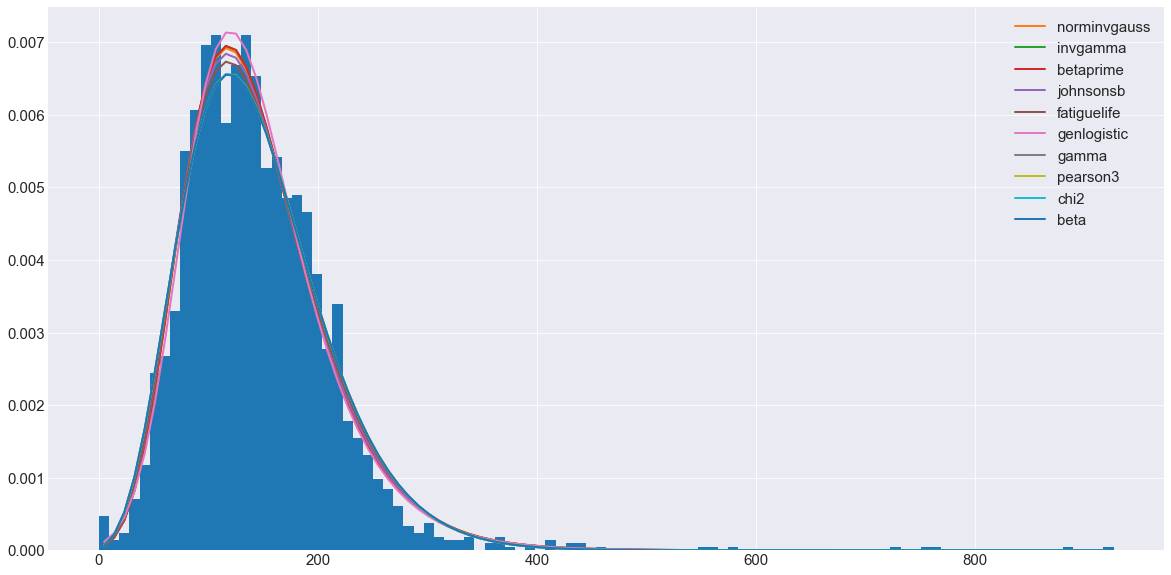

In [42]:
#Let's analyze what Distribution fits better with Revenue after a logarithmic transformation
fitter_sqr = Fitter(np.sqrt(data_small['Revenue']), distributions=stats)
fitter_sqr.fit()
fitter_sqr.summary(Nbest=10, plot=True)
fitter_sqr.get_best(method='sumsquare_error')

In [48]:
fitter.get_best(method='sumsquare_error')

{'norminvgauss': (12.950464878750978,
  10.848421324107541,
  -0.6789439577064692,
  94.51639112512959)}

Let's see how the target variable evolute across a period of time. For example, it could be a Year, Month or even a Day. We can see as long as the time goes by, it is being more and more right asymetric.

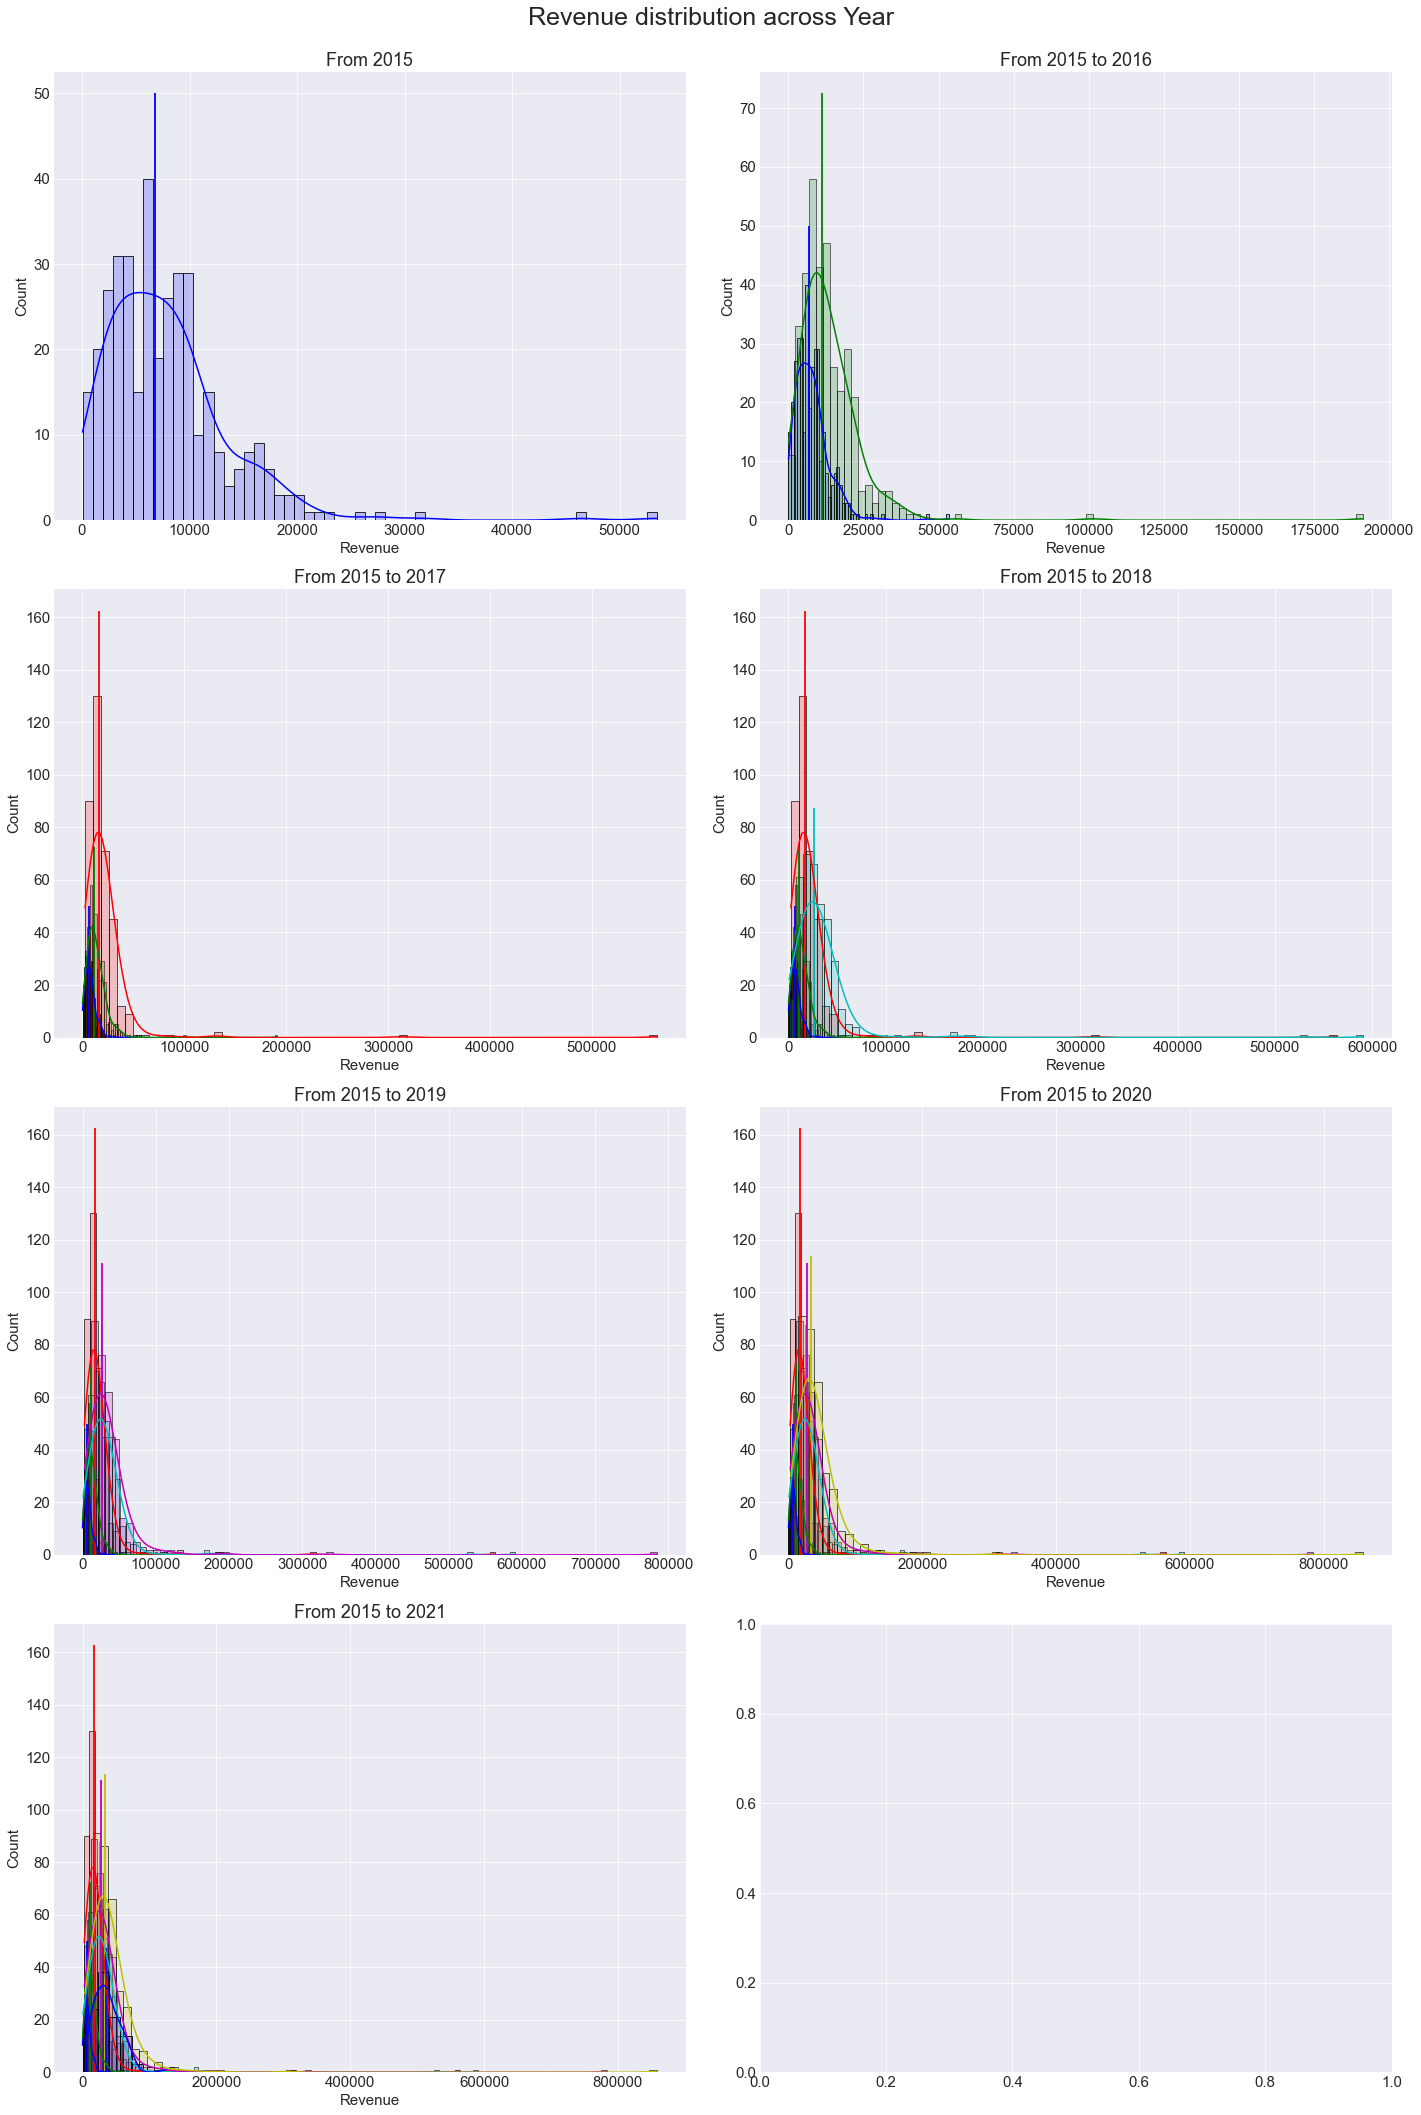

In [109]:
draw_distribution_evolution(data_small, 'Revenue', 'Year')

Now it is time for analyzing what is the distribution of the independent variables

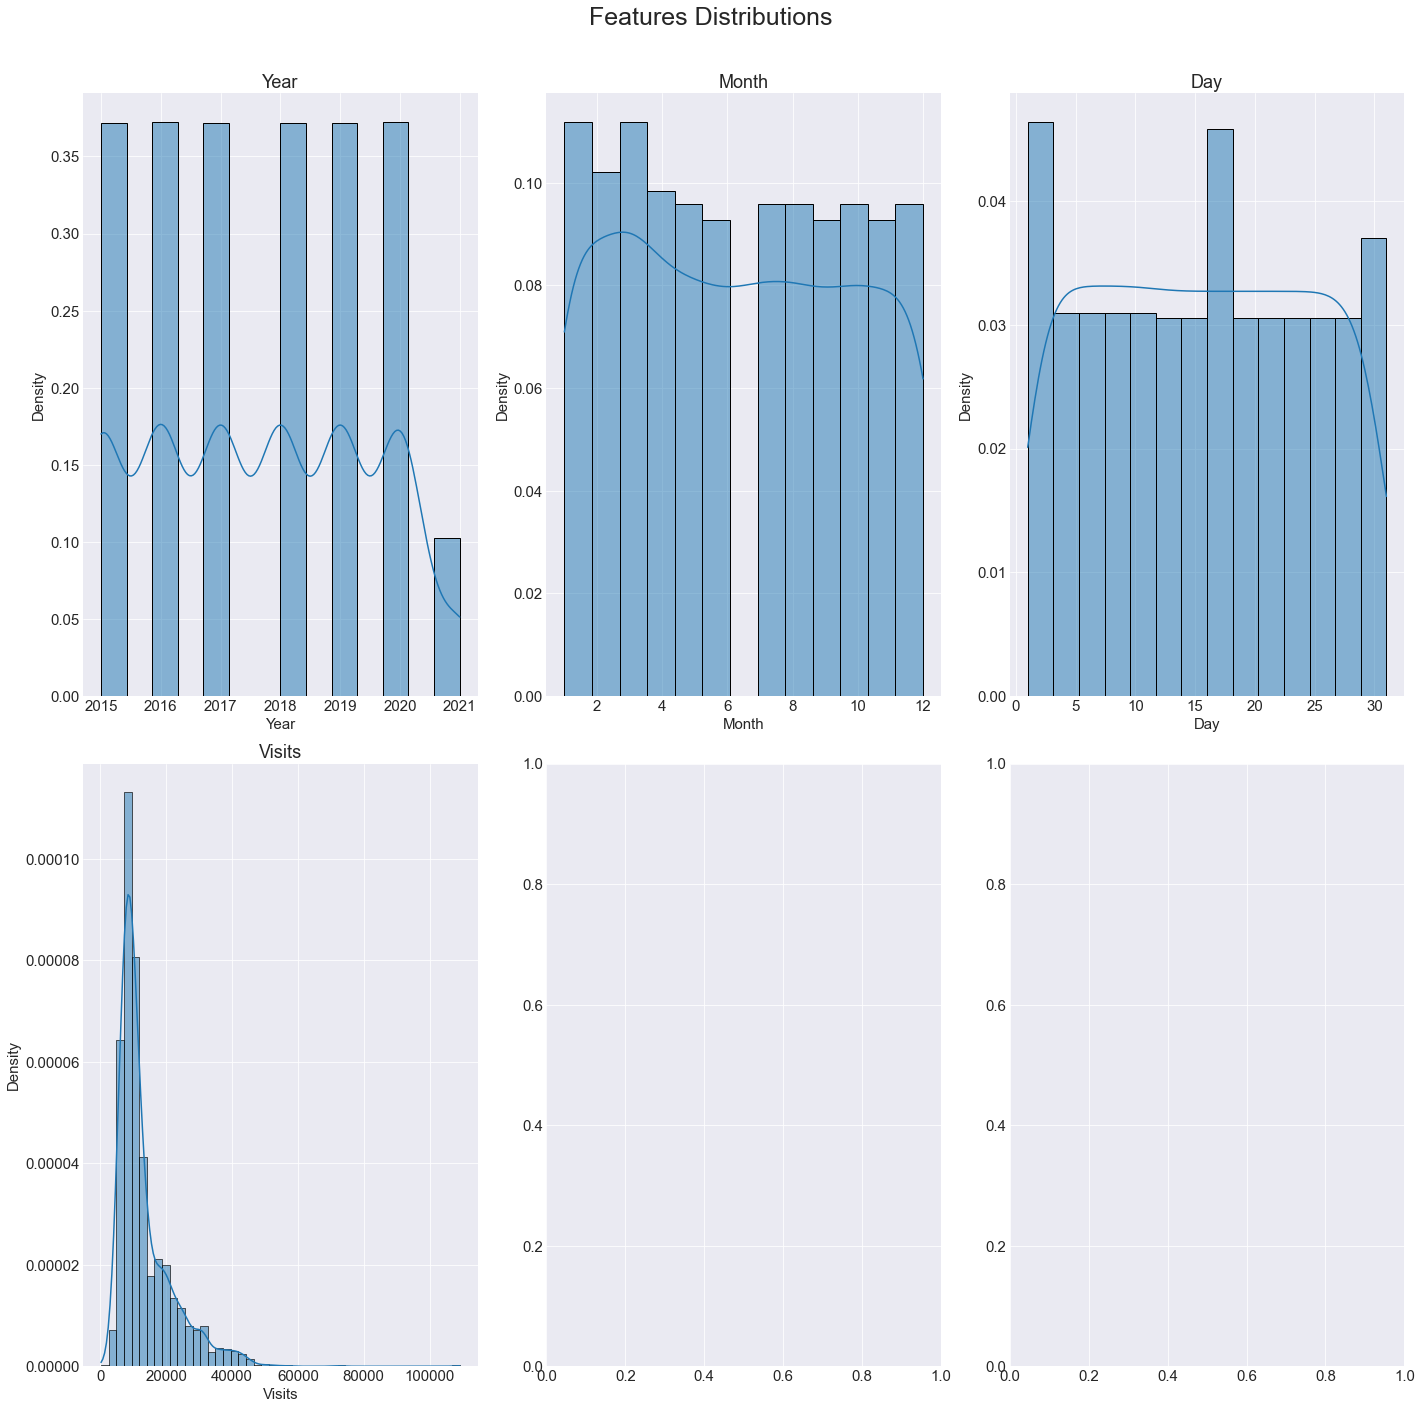

In [110]:
draw_distribution(data_small, data_small.columns[0:-1])

Let's see how the independent variables correlate with the dependant variable. As far as we can see, we cannot see a strong relationship between Year, Month and Day but we can see some correlation with Visits 

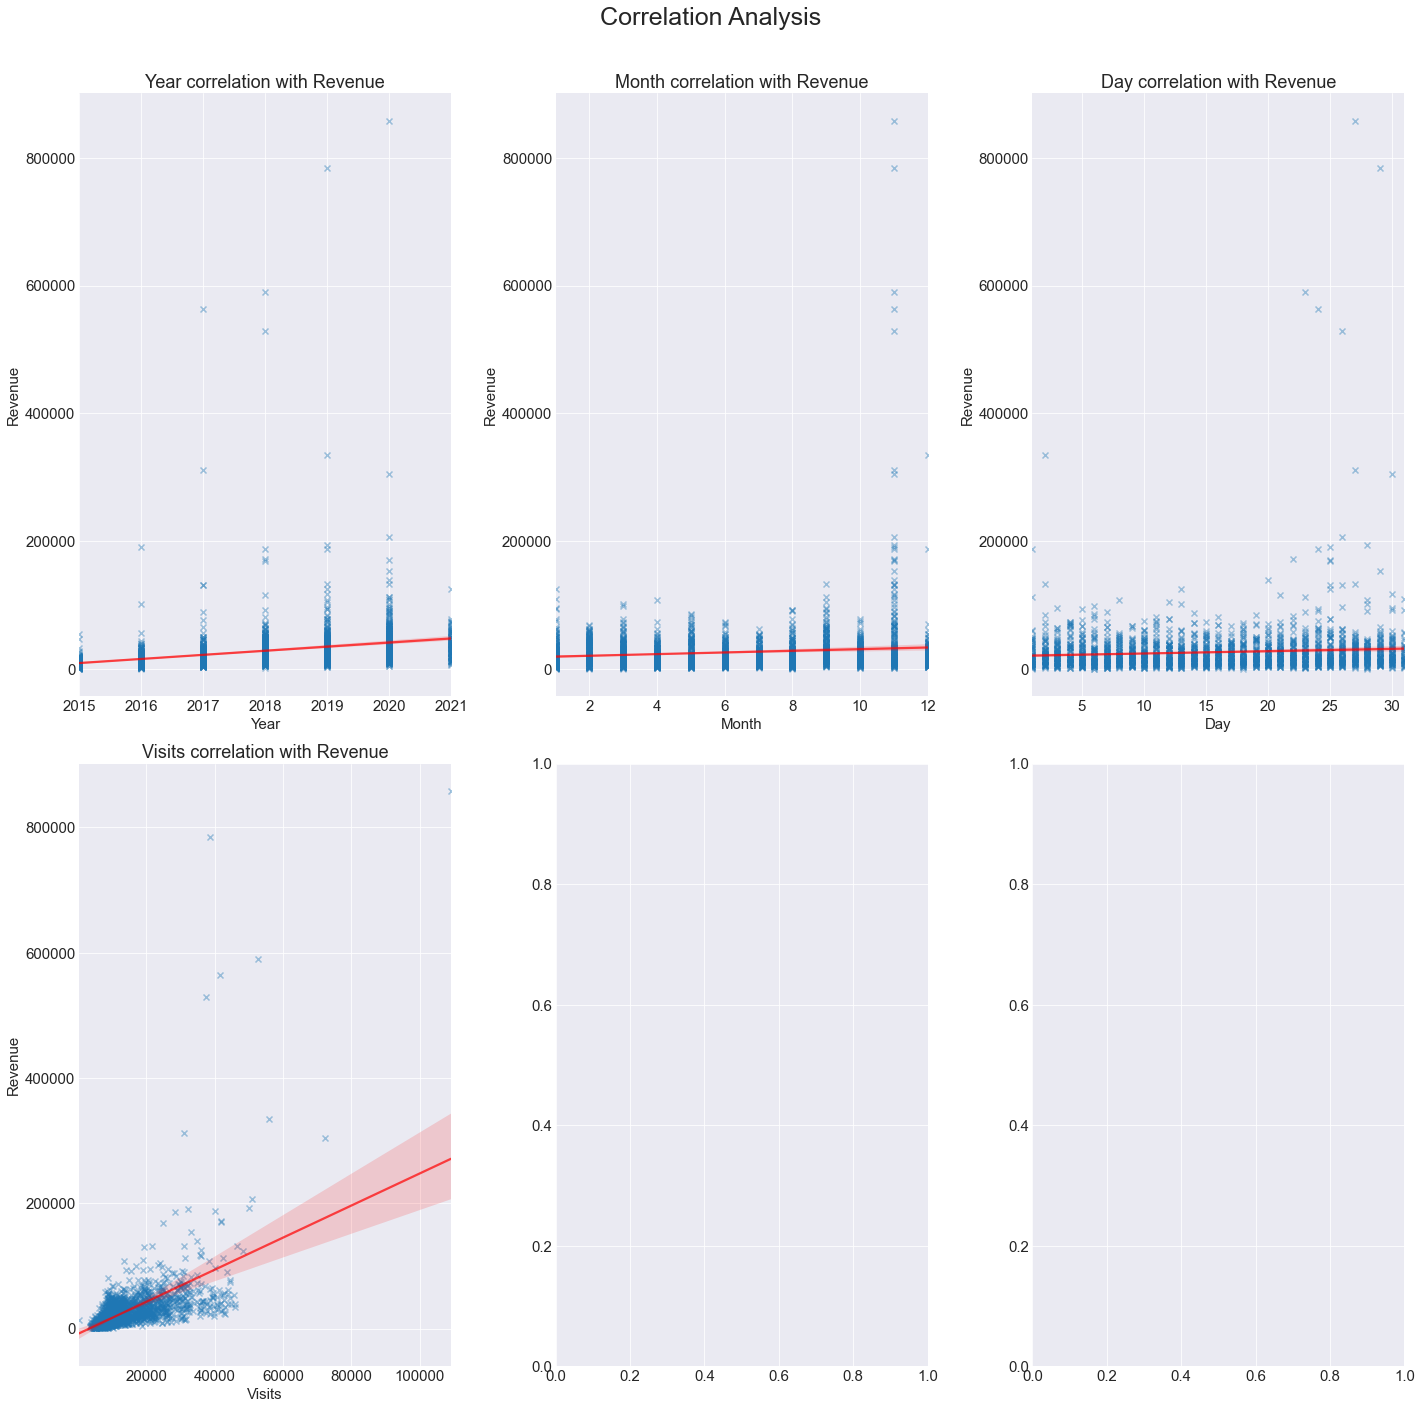

In [111]:
draw_correlation(data_small, data_small.columns[0:-1], data_small.columns[-1:])

Actually here, we can see that the correlation is quite remakable between Visits and Revenue but we can see also even stronger correlation between Year and Visits, so maybe there is collinearity between these two variable and in case we want to add them to a regression model, we should pick just one.

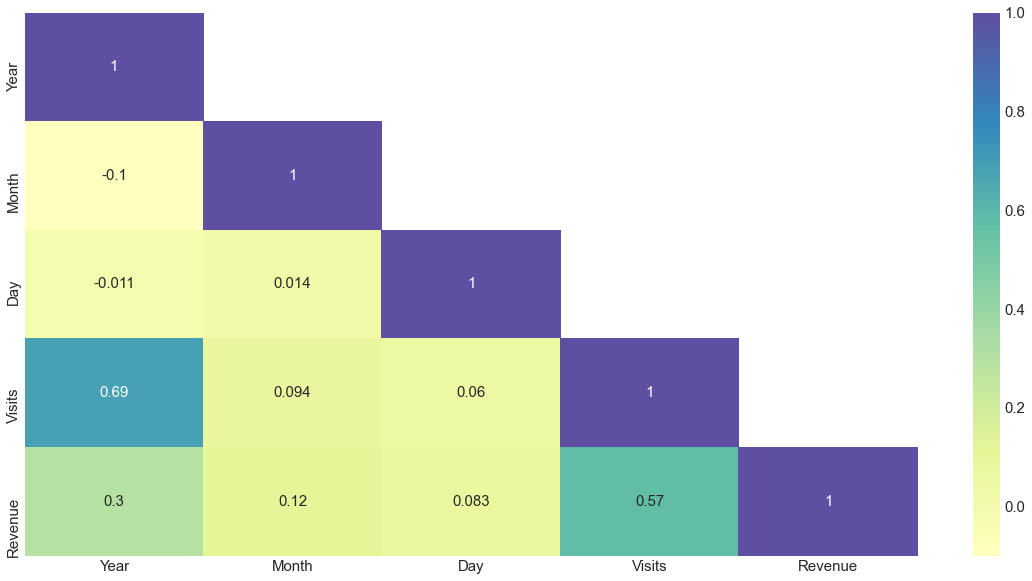

In [112]:
corr_matrix(data_small)

## Time Series

### Main Charasteristics

A Time Series could break down in four different features:
* Trend: It could go up or down acros the time
* Cyclic: Goes up or down without any specific reason
* Seasonality: Specific known pattern of one season
* Random or irregular movements: Noise size

We have two type of break down:
* Additive: yt = Tt + St + Ct + R
* Multiplicative = yt = Tt × St × Ct × R

### Aditive or Multiplative Analysis

/home/dsc/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


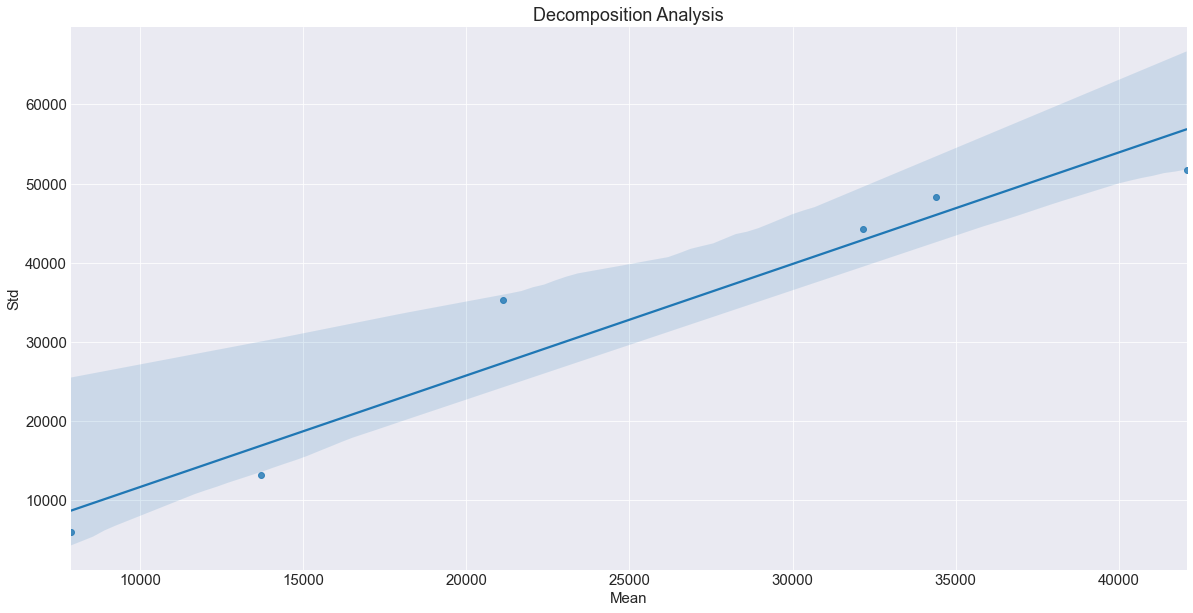

In [113]:
draw_decomposition(data_small);

It seems Multiplicative because the slope is not plain an around 45º

### Time Series Decomposition 

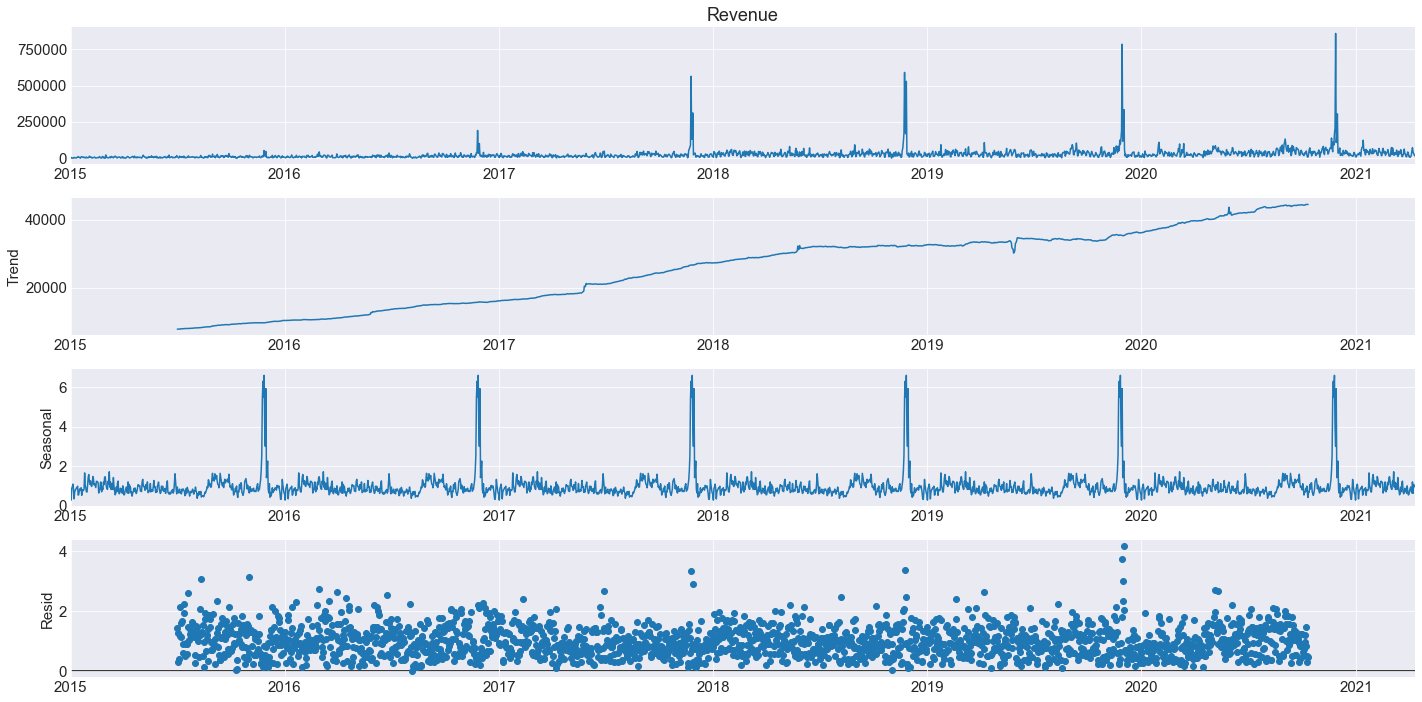

In [122]:
s_d_small = seasonal_decompose(data_small['Revenue'], period= 365, model= 'multiplicative')
s_d_small.plot();

### Stationary Analysis - Augmented Dickey-Fuller test 

In [117]:
test_adf(data_small, 'Revenue')

** Augmented Dickey-Fuller Test **

T-test: -7.000968604662691 < Confidence Interval[1%]: -3.43323655938138 - Result: Stationary
T-test: -7.000968604662691 < Confidence Interval[5%]: -2.86281520927122 - Result: Stationary
T-test: -7.000968604662691 < Confidence Interval[10%]: -2.567448852970086 - Result: Stationary

P-Value: 7.32383597947612e-10 < 0.05 - Result: Stationary


As far as we can see here, it seems this Time Series is Stationary. If we check same Time Series by Week, everything changes because it seems Non Stationary.

## White Noise

OJO TAL VEZ PONER WEEK PARA DEMOSTRAR QUE NO ES ESTACIONARIO

Random Walk - Dickey-Fuller test

H0: β = 0 (This is a random walk)

H1: β < 0 (This is not a random walk)

In [574]:
test_adf(data_small, 'Revenue')

** Augmented Dickey-Fuller Test **

T-test: -7.000968604662691 < Confidence Interval: -3.43323655938138 - Result: Stationary
T-test: -7.000968604662691 < Confidence Interval: -2.86281520927122 - Result: Stationary
T-test: -7.000968604662691 < Confidence Interval: -2.567448852970086 - Result: Stationary

P-Value: 7.32383597947612e-10 < 0.05 - Result: Stationary


In [575]:
test_adf(data_big, 'Revenue')

** Augmented Dickey-Fuller Test **

T-test: -2.3082165125000897 > Confidence Interval: -3.4512146067362317 - Result: No Stationary
T-test: -2.3082165125000897 > Confidence Interval: -2.870730188960711 - Result: No Stationary
T-test: -2.3082165125000897 > Confidence Interval: -2.5716664849383113 - Result: No Stationary

P-Value: 0.16933167517757752 > 0.05 - Result: No Stationary


### Residual Analysis 

Residuals are White Noise, it has passed the ADF Test and therefore it is not a Random Walk and we can also see visually that the mean is 'plain'

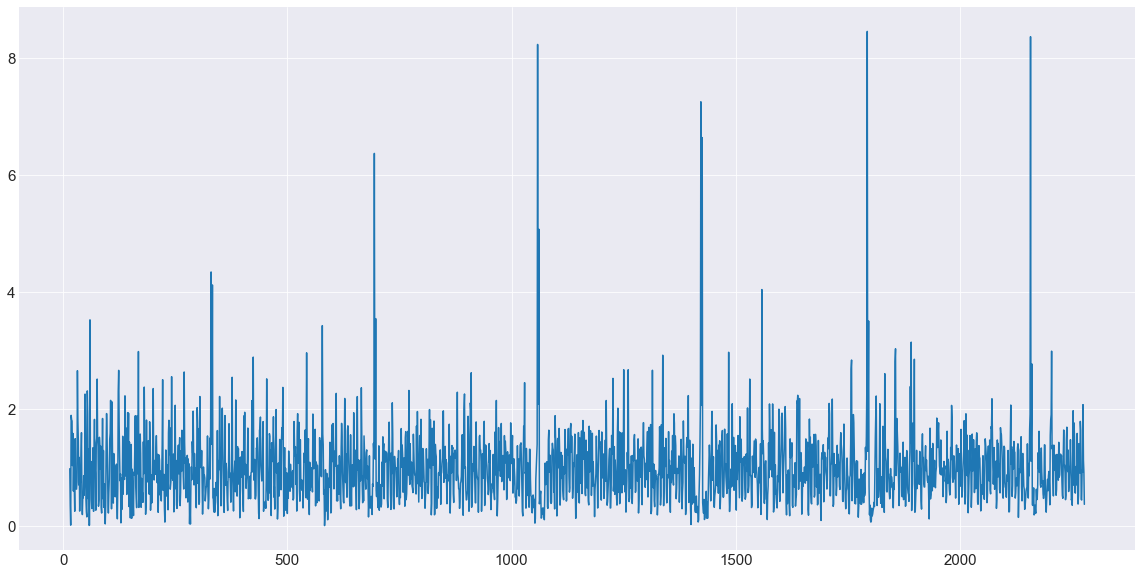

In [66]:
plt.plot(s_d_small.resid.index, s_d_small.resid)

In [67]:
#Augmented Dickey-Fuller test
residual = pd.DataFrame(s_d_small.resid)
residual.dropna(inplace= True)
test_adf(residual, residual.columns[0])

** Augmented Dickey-Fuller Test **

T-test: -13.76633709859893 < Confidence Interval[1%]: -3.4332792288216227 - Result: Stationary
T-test: -13.76633709859893 < Confidence Interval[5%]: -2.8628340503010357 - Result: Stationary
T-test: -13.76633709859893 < Confidence Interval[10%]: -2.567458884484683 - Result: Stationary

P-Value: 9.868725250454579e-26 < 0.05 - Result: Stationary


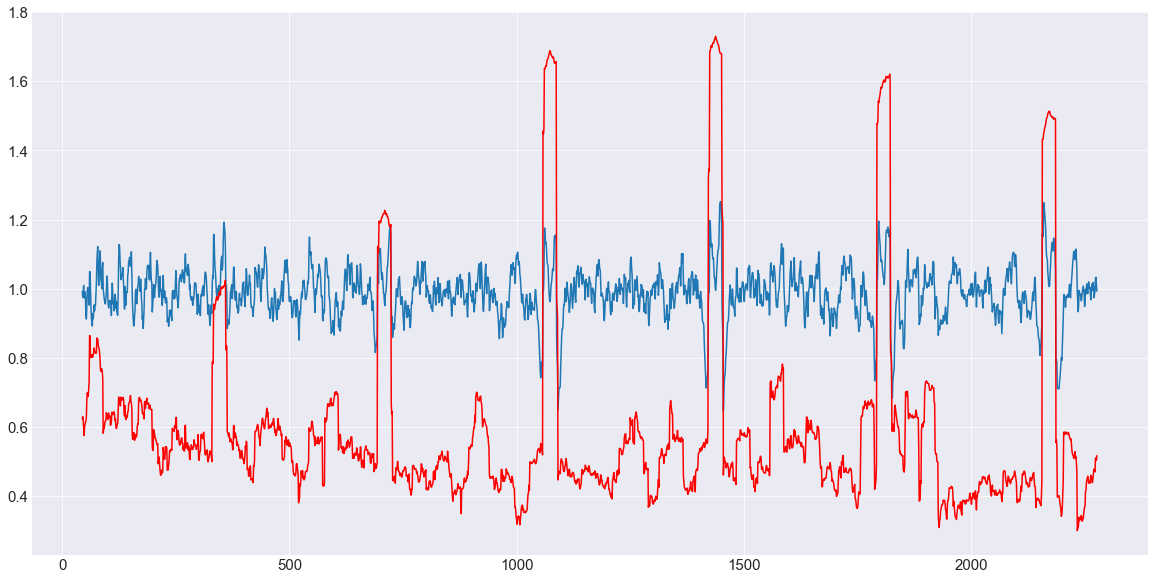

In [68]:
#Visual Analysis
#Let's calculate the rolling mean
rolling_mean = residual.rolling(window=30).mean()
rolling_mean.dropna(inplace= True)
#And the rolling std
rolling_std = residual.rolling(window=30).std()
rolling_std.dropna(inplace= True)

plt.plot(rolling_mean.index, rolling_mean)
plt.plot(rolling_std.index, rolling_std, c= 'r')

### Autocorrelation and Partial Autocorrelation

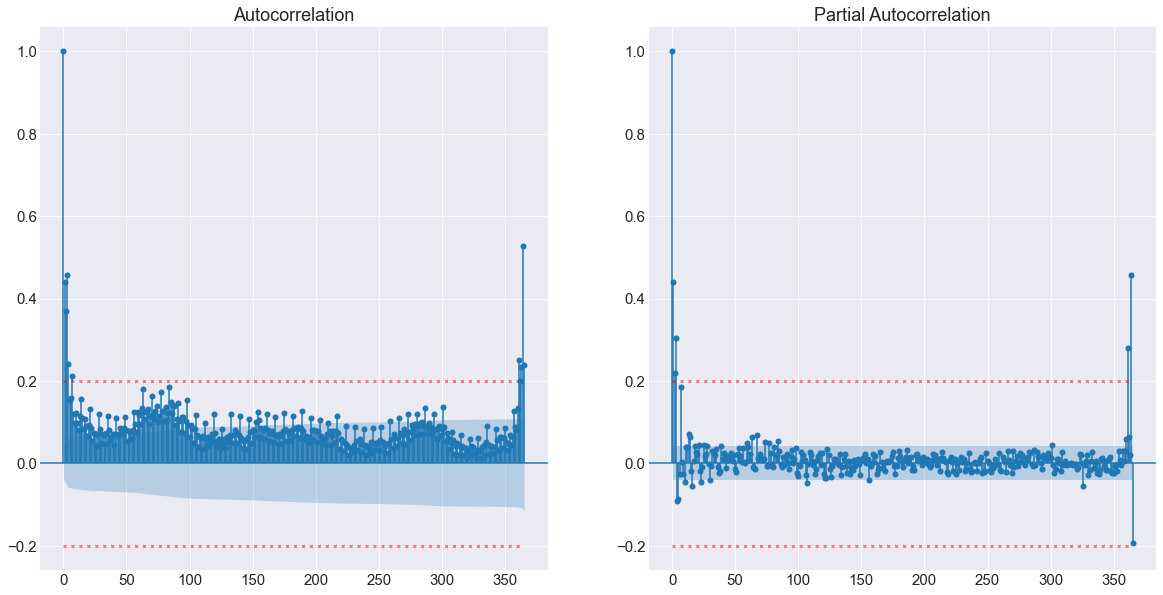

In [299]:
draw_autocorrelation(data_small, 365)

### Naïve Model 

We are going to use as baseline model, this one 'Last Naïve Value' Y(t+ 1) =Y(t)

In [123]:
column = 'Revenue'
data_s = data_small[[column]].copy()
data_s[f'{column}_predicted'] = data_s[column].shift(1)
data_s.dropna(inplace= True)

<AxesSubplot:xlabel='Date'>

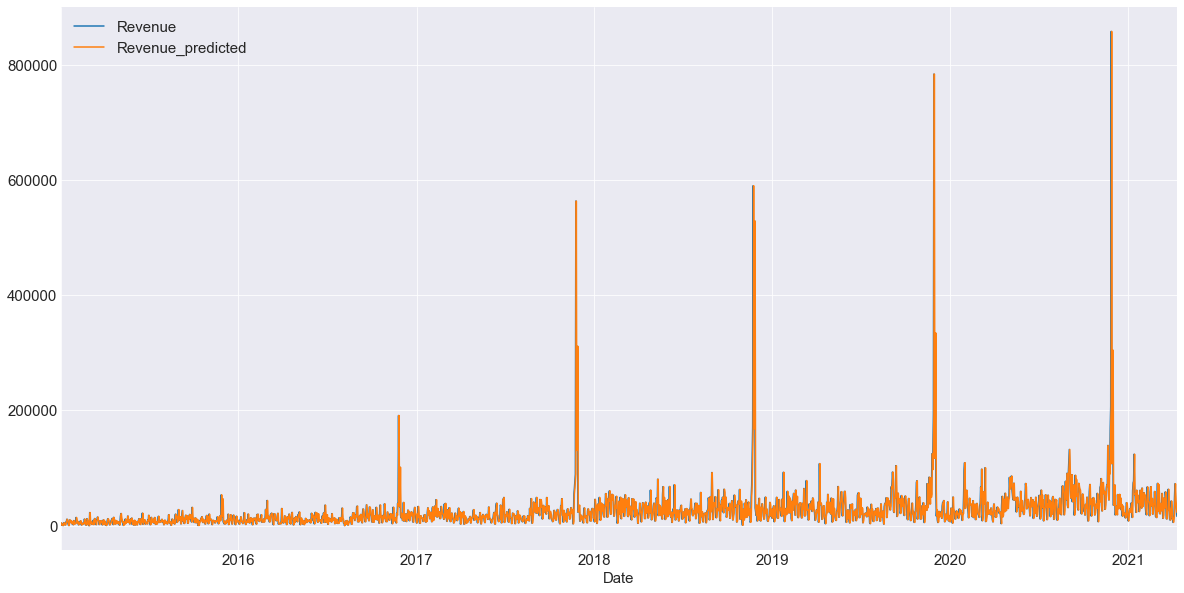

In [124]:
data_s.plot()

In [125]:
#Model RMSE
metric_rmse(data_s, 'Revenue')

40984.40412679773

In [128]:
data_full = pd.concat([data_small[[column]], data_validation[[column]]])
data_full[f'{column}_predicted'] = data_full[column].shift(1)
data_full.dropna(inplace= True)

<AxesSubplot:xlabel='Date'>

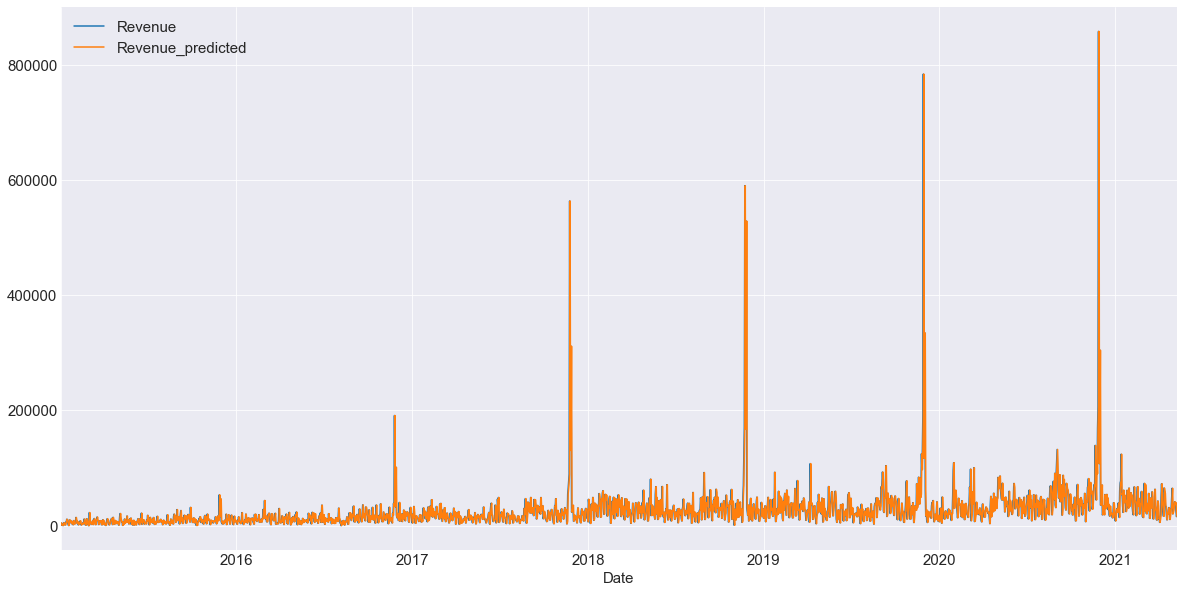

In [129]:
data_full.plot()

In [130]:
#Model Validation
#Model RMSE
metric_rmse(data_full, 'Revenue')

40772.74855191387

<AxesSubplot:xlabel='Date'>

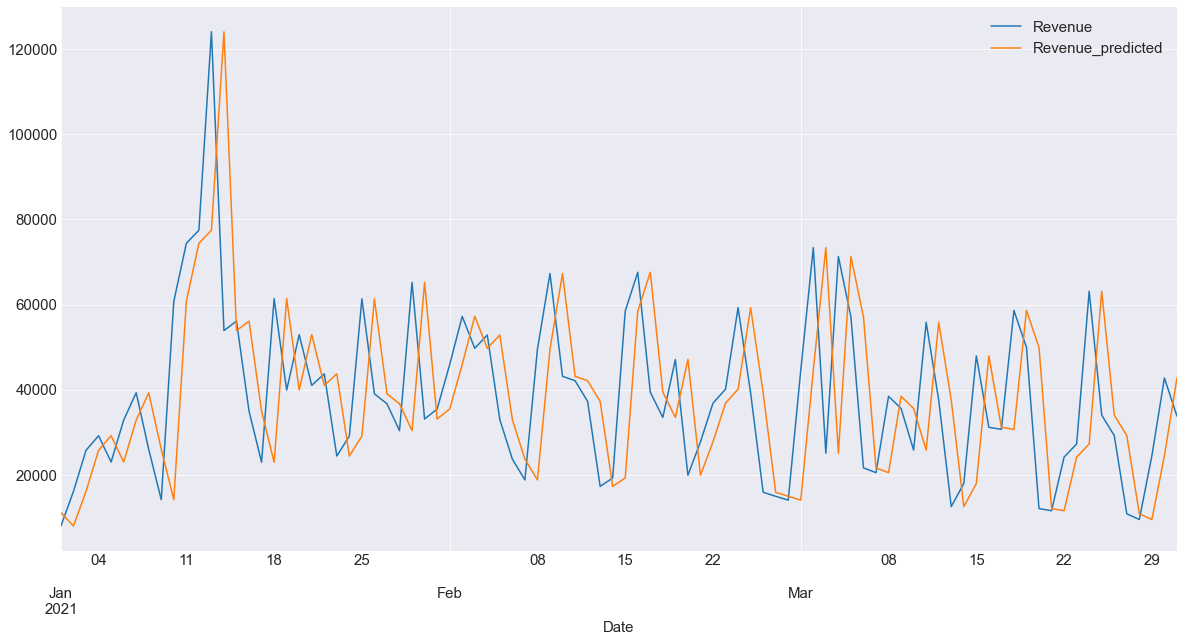

In [132]:
#Let's see it more in detail
data_full.loc['2021-01-01':'2021-03-31'].plot()

As we can see, this would be our starting point for comparing the error across the rest of the models

### SARIMAX 

We are going to apply a SARIMAX model for our Time Series. We are going to create three exogenous variables.
* Black Friday: This will consider from Black Friday to Cyber Monday. Four days in total
* Easter: This is another important period, from Monday to next Monday. Some Communities have slightly different Easter Weeks
* Covid: A new exceptional period. We are going to start with the full lockdown

In [29]:
#Let's create the new exogenous variables
data_exogenous = get_exogenous_features(data_small)

In [130]:
#We have create a GridSearch in order to chose the better hyperparameters
#IMPORTANT, this task is quite intensive so we are saving a pickle for multiple iterations.
#ASSUMPTIONS, we would like to test with 365 season but we do not have enough memory
arima_params = {'p': [5, 7],
                'd': [0, 2], #Up to 1
                'q': [5, 7]}

sarima_params = {'P': [5, 7],
                 'D': [0, 2], #Up to 1
                 'Q': [5, 7],
                 'S': [7]}

trend_params = ['t'] #We has test before and this is the best option always

In [34]:
#We have create a GridSearch in order to chose the better hyperparameters
#IMPORTANT, this task is quite intensive so we are saving a pickle for multiple iterations.
#ASSUMPTIONS, we would like to test with 365 season but we do not have enough memory
arima_params = {'p': [0, 2],
                'd': [0, 2], #Up to 1
                'q': [0, 1]}

sarima_params = {'P': [0, 1],
                 'D': [0, 2], #Up to 1
                 'Q': [0, 1],
                 'S': [2]}

trend_params = ['t'] #We has test before and this is the best option always

In [30]:
X_train, y_train, X_test, y_test = sarimax_preparation_split(data_exogenous)

In [35]:
test_aic = gridsearch_sarimax(y_train, X_train[['Black_Friday', 'Easter', 'Covid']], arima_params, 
                             sarima_params, trend_params)

In [20]:
sorted(test_aic.items(), key=lambda x: x[1])

[((3, 0, 0, '-', 1, 0, 1, 7, '-', 't'), 47898.60855109147),
 ((3, 0, 0, '-', 2, 0, 1, 7, '-', 't'), 47899.75870881471),
 ((3, 0, 0, '-', 1, 0, 2, 7, '-', 't'), 47900.13801876921),
 ((3, 0, 0, '-', 1, 0, 3, 7, '-', 't'), 47902.40845644389),
 ((3, 0, 0, '-', 2, 0, 2, 7, '-', 't'), 47902.85803318481),
 ((3, 0, 1, '-', 1, 0, 1, 7, '-', 't'), 47903.52229778633),
 ((3, 0, 0, '-', 3, 0, 2, 7, '-', 't'), 47903.723548246824),
 ((3, 0, 0, '-', 2, 0, 3, 7, '-', 't'), 47904.485667301924),
 ((2, 0, 3, '-', 1, 0, 1, 7, '-', 't'), 47904.873850624266),
 ((3, 0, 0, '-', 3, 0, 1, 7, '-', 't'), 47907.800261122626),
 ((3, 0, 0, '-', 3, 0, 3, 7, '-', 't'), 47907.87278512935),
 ((3, 0, 1, '-', 1, 0, 2, 7, '-', 't'), 47907.95030234906),
 ((1, 0, 3, '-', 1, 0, 1, 7, '-', 't'), 47908.593753361754),
 ((1, 0, 3, '-', 2, 0, 1, 7, '-', 't'), 47911.22732210987),
 ((1, 0, 3, '-', 1, 0, 2, 7, '-', 't'), 47912.146571199184),
 ((3, 0, 1, '-', 1, 0, 3, 7, '-', 't'), 47913.88543416833),
 ((3, 0, 3, '-', 0, 1, 1, 7, '-', 

In [129]:
sorted(test_aic.items(), key=lambda x: x[1])

[((4, 0, 4, '-', 4, 0, 4, 7, '-', 't'), 47982.72285554057),
 ((4, 0, 4, '-', 4, 1, 4, 7, '-', 't'), 48015.33809054071),
 ((4, 1, 4, '-', 4, 0, 4, 7, '-', 't'), 48034.47456622115),
 ((4, 1, 4, '-', 4, 1, 4, 7, '-', 't'), 48306.6430314474)]

In [132]:
sorted(test_aic.items(), key=lambda x: x[1])

[((6, 0, 5, '-', 5, 0, 5, 7, '-', 't'), 47932.131057390296),
 ((5, 0, 6, '-', 5, 0, 6, 7, '-', 't'), 47934.27837766443),
 ((6, 0, 5, '-', 6, 0, 5, 7, '-', 't'), 47936.178517190405),
 ((5, 0, 6, '-', 6, 0, 5, 7, '-', 't'), 47936.5629532279),
 ((6, 0, 5, '-', 5, 0, 6, 7, '-', 't'), 47938.67609038649),
 ((6, 0, 6, '-', 5, 0, 6, 7, '-', 't'), 47939.576789980885),
 ((6, 0, 6, '-', 6, 0, 6, 7, '-', 't'), 47940.09103830449),
 ((6, 0, 6, '-', 5, 0, 5, 7, '-', 't'), 47941.731750452425),
 ((6, 0, 6, '-', 6, 0, 5, 7, '-', 't'), 47941.94278978875),
 ((5, 0, 5, '-', 5, 0, 6, 7, '-', 't'), 47945.21216202574),
 ((5, 0, 6, '-', 5, 0, 5, 7, '-', 't'), 47945.30127016295),
 ((5, 0, 6, '-', 6, 0, 6, 7, '-', 't'), 47950.71264493723),
 ((6, 0, 5, '-', 6, 0, 6, 7, '-', 't'), 47954.29555960231),
 ((5, 0, 5, '-', 6, 0, 5, 7, '-', 't'), 47956.336323259784),
 ((6, 0, 6, '-', 5, 1, 5, 7, '-', 't'), 47959.46935074453),
 ((6, 0, 6, '-', 5, 1, 6, 7, '-', 't'), 47960.85814227002),
 ((6, 0, 6, '-', 6, 1, 5, 7, '-', 't

In [49]:
#Fit considering best hyperparameters
model = SARIMAX(endog= y_train, exog= X_train[['Black_Friday', 'Easter', 'Covid']],
                order= (3, 0, 0), seasonal_order= (1, 0, 1, 7), trend= 't')
result = model.fit()

In [50]:
#Predict taking full Train
forecast = result.get_prediction(start= '2015-01-01', end= '2020-09-18', 
                                 exog= X_train.loc['2015-01-01':'2020-09-18'][['Black_Friday', 'Easter', 'Covid']])
mean_forecast = forecast.predicted_mean
#Rename mean_forecast column name
mean_forecast.rename(f'{y_train.name}_predicted', inplace= True)

Date
2015-01-01       48.261495
2015-01-02     1329.829374
2015-01-03     2070.849849
2015-01-04     1012.778703
2015-01-05     1511.628873
                  ...     
2020-09-14    48638.057794
2020-09-15    52858.167422
2020-09-16    45358.117886
2020-09-17    65179.810754
2020-09-18    50782.665643
Freq: D, Name: Revenue_predicted, Length: 2088, dtype: float64

<AxesSubplot:xlabel='Date'>

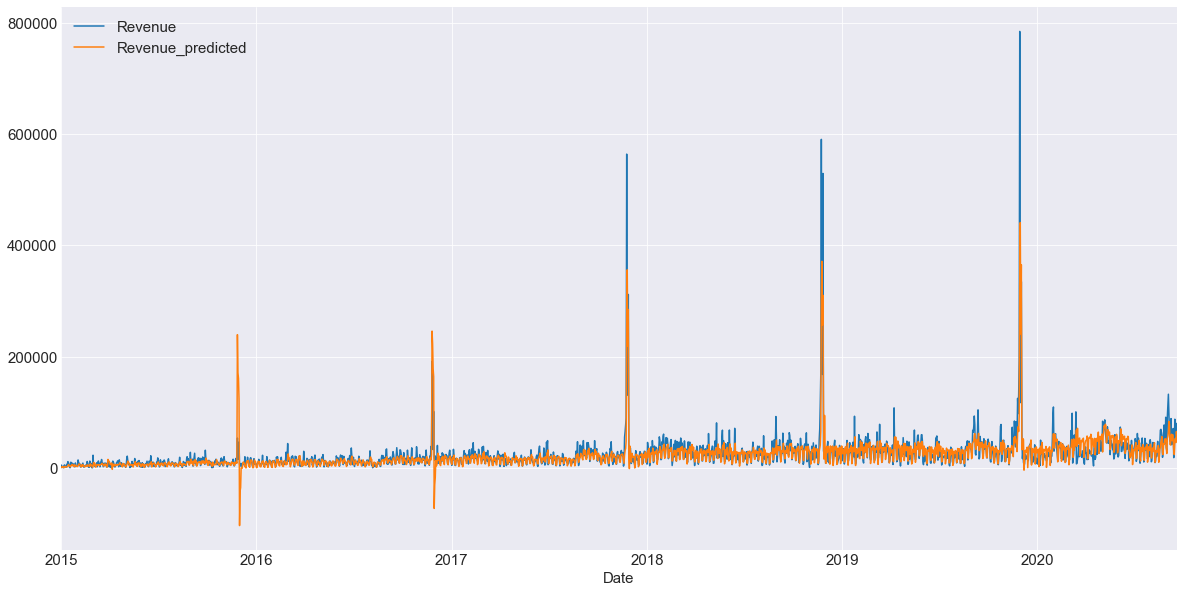

In [51]:
data_train_predict = pd.concat([y_train, mean_forecast], axis= 1)
data_train_predict.plot()

<AxesSubplot:xlabel='Date'>

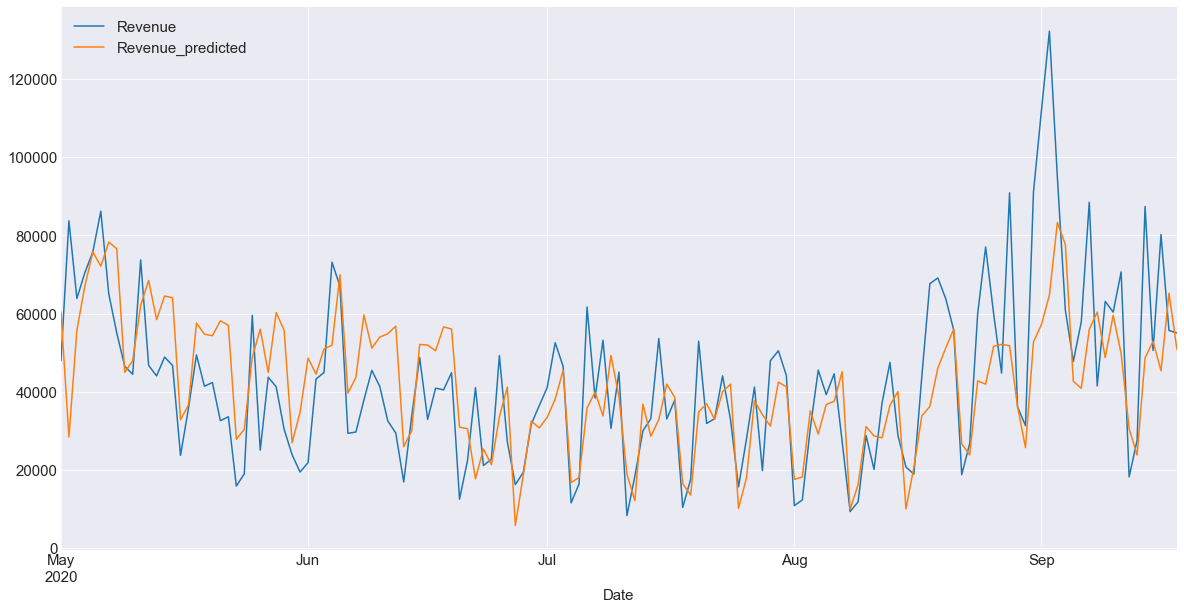

In [52]:
#Let's see a subset of the Time Series
data_train_predict.loc['2020-05-01':'2020-09-18'].plot()

In [53]:
metric_rmse(data_train_predict, 'Revenue')

22941.71458906555

Residuals
count  2.088000e+03
mean  -3.827611e+07
std    1.000648e+09
min   -3.473672e+10
25%   -6.484333e+03
50%    3.172056e+02
75%    6.002982e+03
max    8.763761e+04

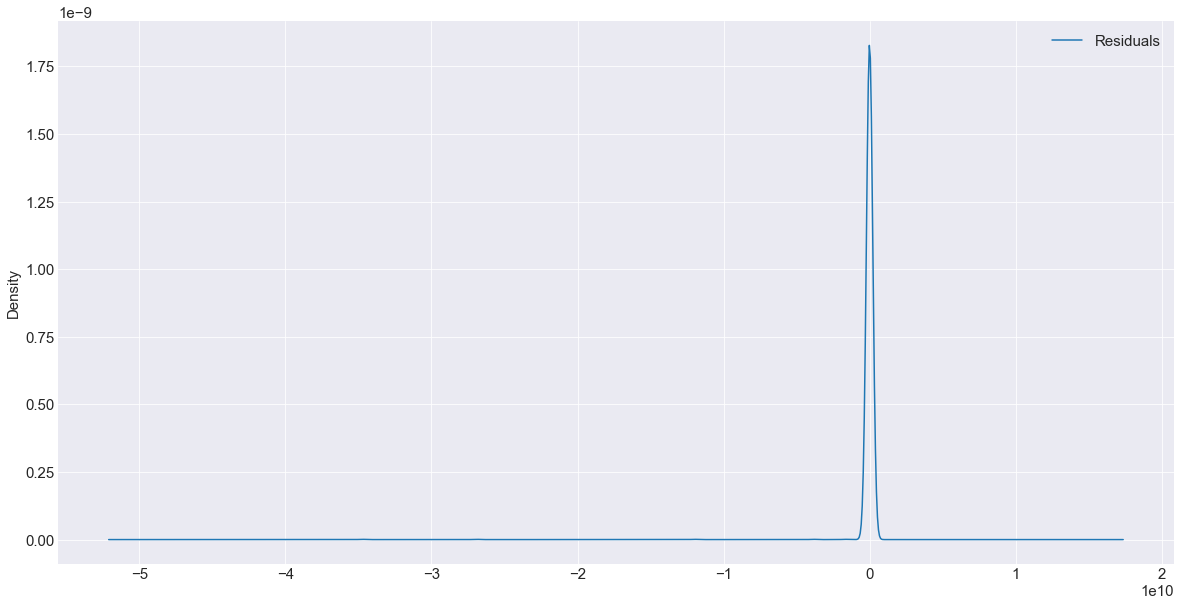

In [74]:
#Residual Analysis
data_residual = pd.DataFrame()
#Real - Predict
data_residual['Residuals'] = \
    data_train_predict[data_train_predict.columns[0]] - data_train_predict[data_train_predict.columns[1]]
data_residual.plot(kind='kde')

#Let's see the mean if it is in the center or show kind of skew
data_residual.describe()

In [300]:
draw_autocorrelation(pd.DataFrame(result.resid), 30)

NameError: name 'result' is not defined

In [56]:
#Forecast vs. Test

#Predict taking full Test
forecast = result.get_prediction(start= '2020-09-19', end= '2021-05-09', 
                                 exog= X_test.loc['2020-09-19':'2021-05-09'][['Black_Friday', 'Easter', 'Covid']])
mean_forecast = forecast.predicted_mean
#Rename mean_forecast column name
mean_forecast.rename(f'{y_train.name}_predicted', inplace= True)

2020-09-19    28934.311255
2020-09-20    26444.037858
2020-09-21    45782.924854
2020-09-22    41327.546210
2020-09-23    42715.955671
                  ...     
2021-05-05    43752.538070
2021-05-06    45073.630018
2021-05-07    46842.039874
2021-05-08    21713.326417
2021-05-09    24541.436958
Freq: D, Name: Revenue_predicted, Length: 233, dtype: float64

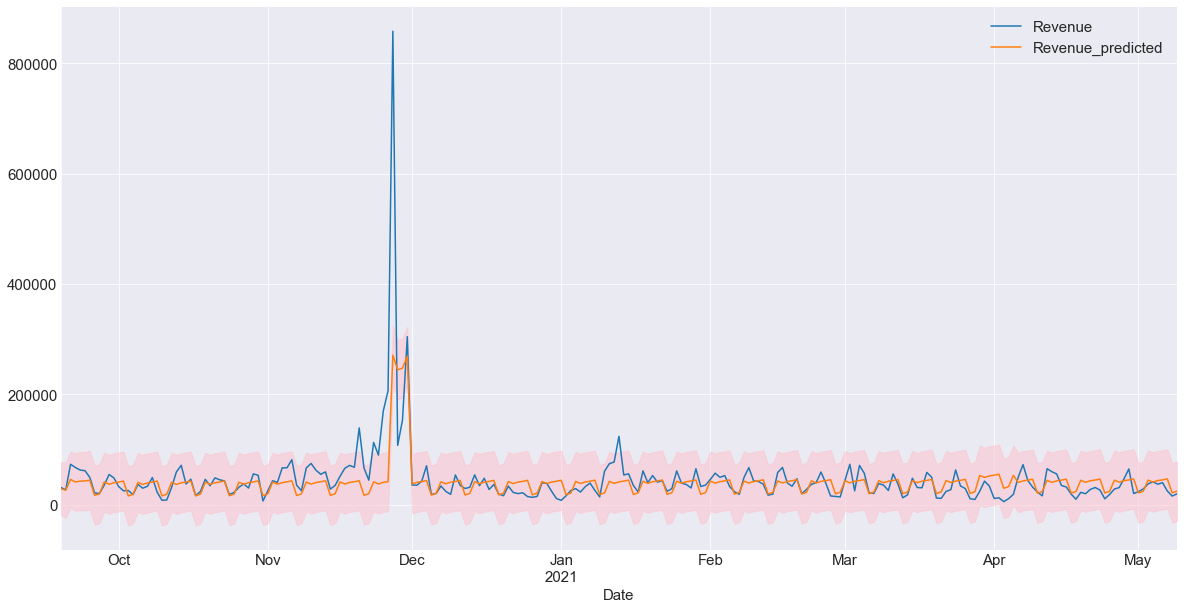

In [57]:
#Let's see how this model predict
data_test_predict = pd.concat([y_test, mean_forecast], axis= 1)
data_test_predict.plot()

confidence_intervals = forecast.conf_int()
plt.fill_between(confidence_intervals.index, confidence_intervals[confidence_intervals.columns[0]],
                 confidence_intervals[confidence_intervals.columns[1]], color='pink', alpha=0.5)

In [58]:
metric_rmse(data_test_predict, 'Revenue')

46211.325117016946

### Log Time Series Analysis

In [59]:
data_log = data_small.copy()
data_log['Revenue'] = np.log1p(data_log['Revenue'])

/home/dsc/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


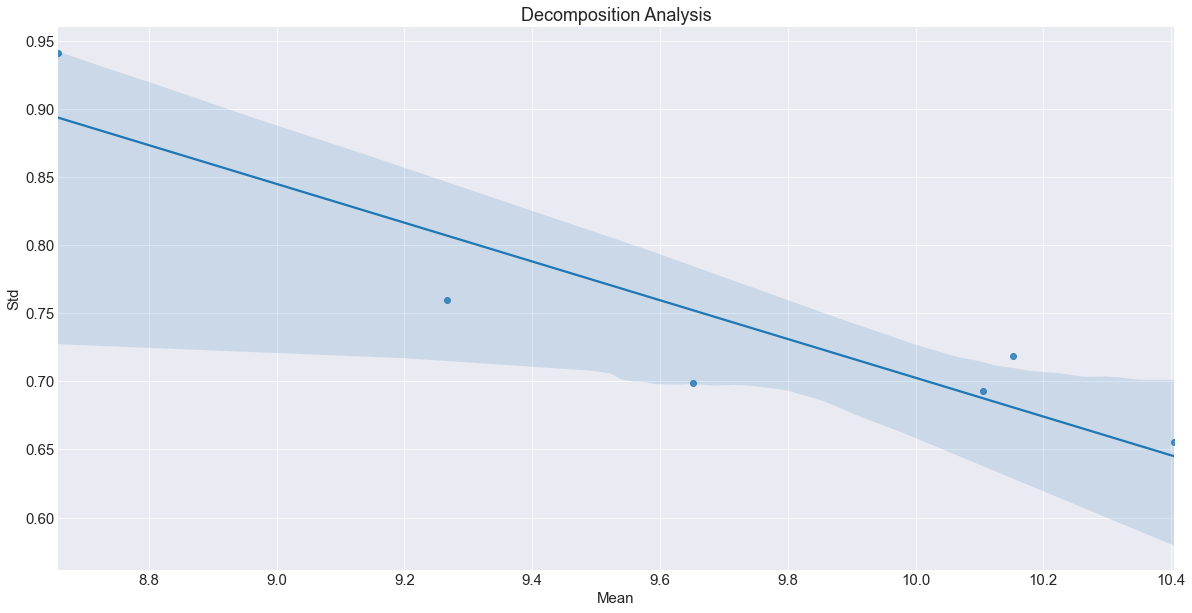

In [34]:
draw_decomposition(data_log);

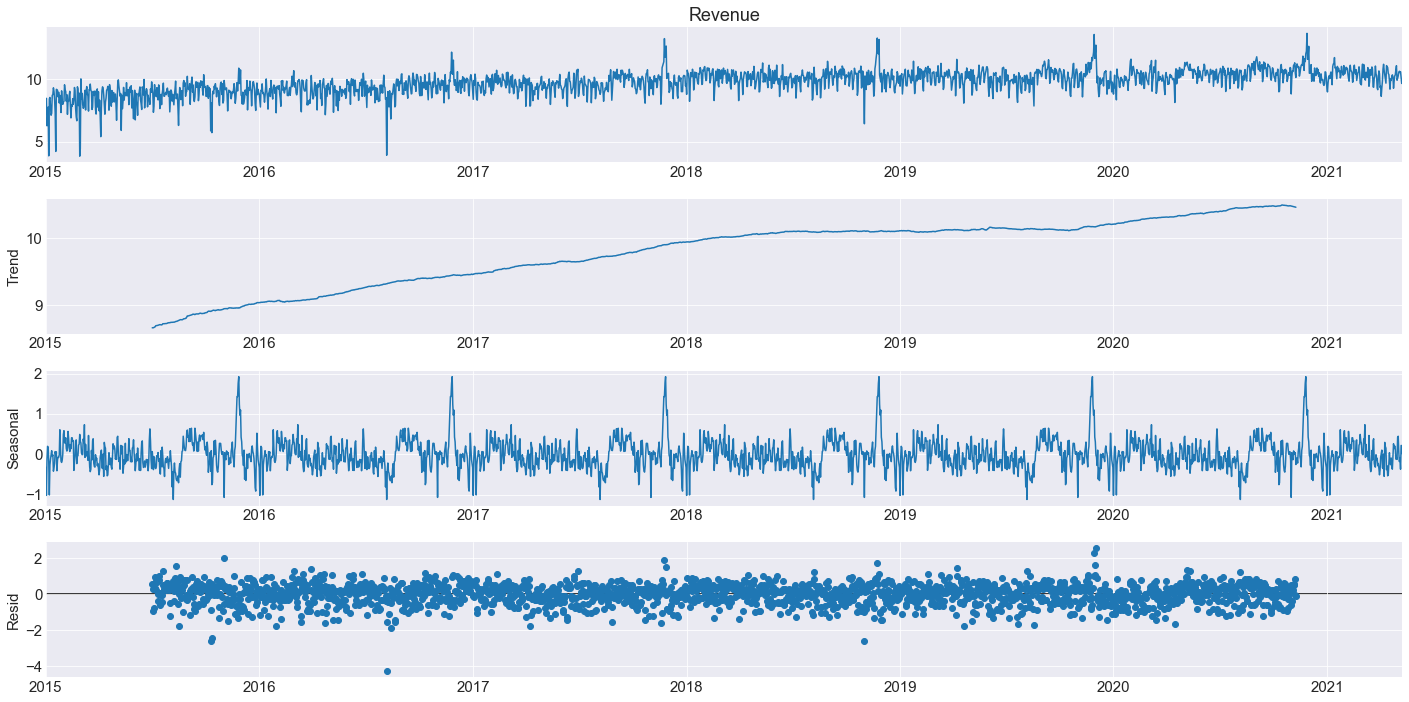

In [64]:
#A transformed data into Log makes Additivie model always
s_d_log = seasonal_decompose(data_log['Revenue'], period= 365, model= 'additive')
s_d_log.plot();

In [36]:
test_adf(data_log, 'Revenue')

** Augmented Dickey-Fuller Test **

T-test: -3.2629643223107463 > Confidence Interval[1%]: -3.4332403869849286 - Result: No Stationary
T-test: -3.2629643223107463 < Confidence Interval[5%]: -2.862816899390905 - Result: Stationary
T-test: -3.2629643223107463 < Confidence Interval[10%]: -2.567449752837351 - Result: Stationary

P-Value: 0.01661734589099667 < 0.05 - Result: Stationary


In [301]:
draw_autocorrelation(data_log, 30)

NameError: name 'data_log' is not defined

### Log Arima 

In [60]:
#Let's create the new exogenous variables
data_exogenous_log = get_exogenous_features(data_log)

In [133]:
#We have create a GridSearch in order to chose the better hyperparameters
#IMPORTANT, this task is quite intensive so we are saving a pickle for multiple iterations.
#ASSUMPTIONS, we would like to test with 365 season but we do not have enough memory
arima_params = {'p': [0, 4],
                'd': [0, 2], #Up to 1
                'q': [0, 4]}

sarima_params = {'P': [0, 4],
                 'D': [0, 2], #Up to 1
                 'Q': [0, 4],
                 'S': [7]}

#t = ['n','c','t','ct']
trend_params = ['c'] #We has test before and this is the best option always

In [134]:
X_train, y_train, X_test, y_test = sarimax_preparation_split(data_exogenous_log)

In [135]:
test_aic = gridsearch_sarimax(y_train, X_train[['Black_Friday', 'Easter', 'Covid']], arima_params, 
                             sarima_params, trend_params)

In [114]:
sorted(test_aic.items(), key=lambda x: x[1])

[((1, 0, 1, '-', 1, 1, 1, 7, '-', 'c'), 3320.406516444623),
 ((1, 0, 1, '-', 0, 1, 1, 7, '-', 'c'), 3323.3109745842253),
 ((1, 1, 1, '-', 1, 1, 1, 7, '-', 'n'), 3332.6859418947224),
 ((1, 1, 1, '-', 0, 1, 1, 7, '-', 'n'), 3332.8885650713582),
 ((1, 1, 1, '-', 1, 0, 1, 7, '-', 'n'), 3340.8814806513988),
 ((1, 0, 1, '-', 1, 1, 1, 7, '-', 'n'), 3342.179794025067),
 ((1, 0, 1, '-', 0, 1, 1, 7, '-', 'n'), 3346.1361716474744),
 ((1, 1, 1, '-', 1, 1, 1, 7, '-', 'c'), 3349.3833108654208),
 ((1, 1, 1, '-', 0, 1, 1, 7, '-', 'c'), 3355.038904194308),
 ((0, 1, 1, '-', 1, 1, 1, 7, '-', 'n'), 3383.677481856423),
 ((1, 0, 0, '-', 0, 1, 1, 7, '-', 'c'), 3390.0343341570524),
 ((1, 0, 0, '-', 1, 1, 1, 7, '-', 'c'), 3391.442454137199),
 ((0, 1, 1, '-', 0, 1, 1, 7, '-', 'n'), 3392.2567977852486),
 ((0, 1, 1, '-', 1, 1, 1, 7, '-', 'c'), 3394.0939876683497),
 ((0, 1, 1, '-', 1, 0, 1, 7, '-', 'n'), 3402.0663770164756),
 ((0, 1, 1, '-', 0, 1, 1, 7, '-', 'c'), 3406.341309546855),
 ((1, 0, 1, '-', 1, 0, 1, 7, '

In [136]:
sorted(test_aic.items(), key=lambda x: x[1])

[((2, 0, 3, '-', 3, 1, 1, 7, '-', 'c'), 3307.013646056871),
 ((2, 0, 3, '-', 2, 1, 1, 7, '-', 'c'), 3307.1207378884264),
 ((2, 0, 3, '-', 1, 1, 1, 7, '-', 'c'), 3309.531712114427),
 ((1, 0, 3, '-', 0, 1, 2, 7, '-', 'c'), 3309.9852863338347),
 ((2, 0, 3, '-', 0, 1, 2, 7, '-', 'c'), 3310.6594794164107),
 ((2, 0, 3, '-', 0, 1, 1, 7, '-', 'c'), 3311.984724136573),
 ((2, 0, 3, '-', 0, 1, 3, 7, '-', 'c'), 3312.7266018399405),
 ((1, 0, 2, '-', 1, 1, 2, 7, '-', 'c'), 3313.170741730653),
 ((2, 0, 2, '-', 1, 1, 1, 7, '-', 'c'), 3315.144119724566),
 ((2, 0, 2, '-', 0, 1, 2, 7, '-', 'c'), 3315.7912641921644),
 ((3, 0, 3, '-', 0, 1, 2, 7, '-', 'c'), 3316.1640697885414),
 ((2, 0, 2, '-', 2, 1, 1, 7, '-', 'c'), 3316.2674482811303),
 ((2, 0, 2, '-', 0, 1, 3, 7, '-', 'c'), 3316.4382111544846),
 ((2, 0, 2, '-', 0, 1, 1, 7, '-', 'c'), 3316.9075504999464),
 ((2, 0, 3, '-', 2, 1, 3, 7, '-', 'c'), 3317.0766373323645),
 ((3, 0, 2, '-', 0, 1, 2, 7, '-', 'c'), 3317.0780412184267),
 ((3, 0, 3, '-', 0, 1, 3, 7, 

In [62]:
#Fit considering best hyperparameters
model = SARIMAX(endog= y_train, exog= X_train[['Black_Friday', 'Easter', 'Covid']],
                order= (3, 0, 0), seasonal_order= (1, 0, 1, 7), trend= 'c')
result = model.fit()

In [63]:
#Predict taking full Train
forecast = result.get_prediction(start= '2015-01-01', end= '2020-09-18', 
                                 exog= X_train.loc['2015-01-01':'2020-09-18'][['Black_Friday', 'Easter', 'Covid']])
mean_forecast = forecast.predicted_mean
#Rename mean_forecast column name
mean_forecast.rename(f'{y_train.name}_predicted', inplace= True)

Date
2015-01-01    -0.002295
2015-01-02     8.065705
2015-01-03     8.392369
2015-01-04     6.639420
2015-01-05     7.079218
                ...    
2020-09-14    10.911270
2020-09-15    11.043483
2020-09-16    11.031568
2020-09-17    11.146505
2020-09-18    10.930929
Freq: D, Name: Revenue_predicted, Length: 2088, dtype: float64

<AxesSubplot:xlabel='Date'>

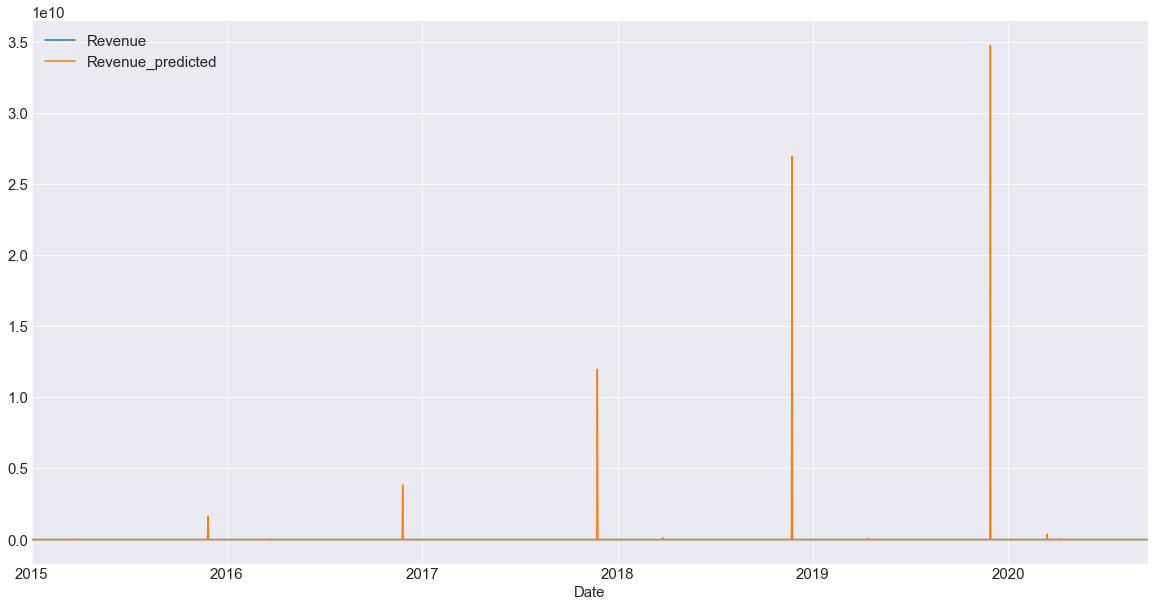

In [64]:
data_train_predict = pd.concat([np.expm1(y_train), np.expm1(mean_forecast)], axis= 1)
data_train_predict.plot()

<AxesSubplot:xlabel='Date'>

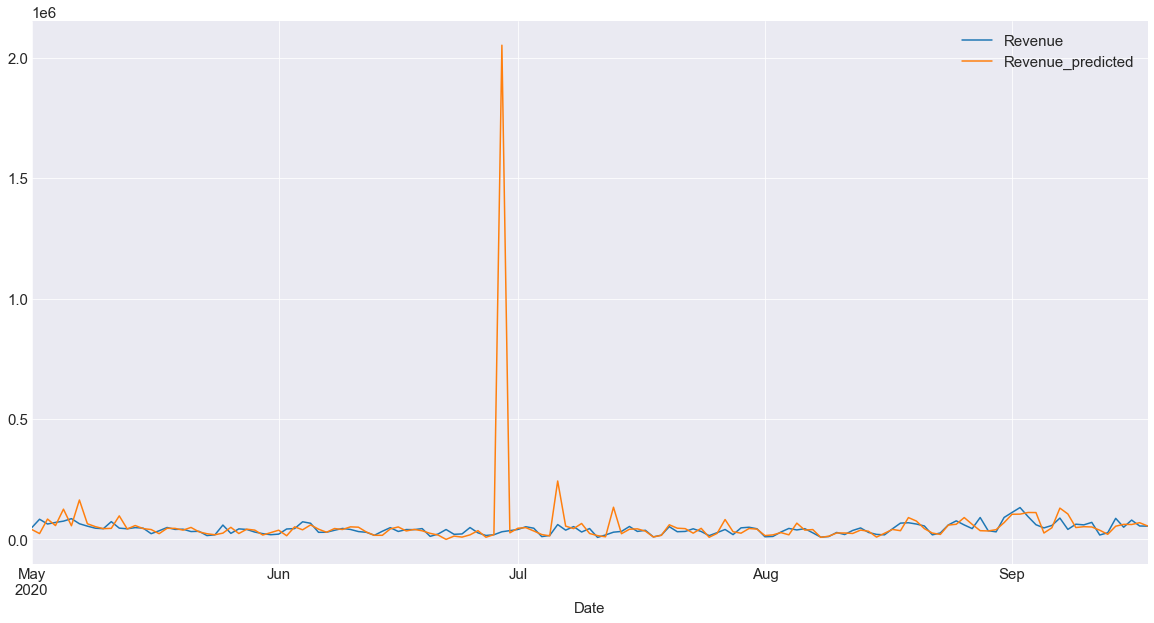

In [65]:
#Let's see a subset of the Time Series
data_train_predict.loc['2020-05-01':'2020-09-18'].plot()

In [66]:
metric_rmse(data_train_predict, 'Revenue')

1001140277.9398998

Residuals
count  2.088000e+03
mean  -3.827611e+07
std    1.000648e+09
min   -3.473672e+10
25%   -6.484333e+03
50%    3.172056e+02
75%    6.002982e+03
max    8.763761e+04

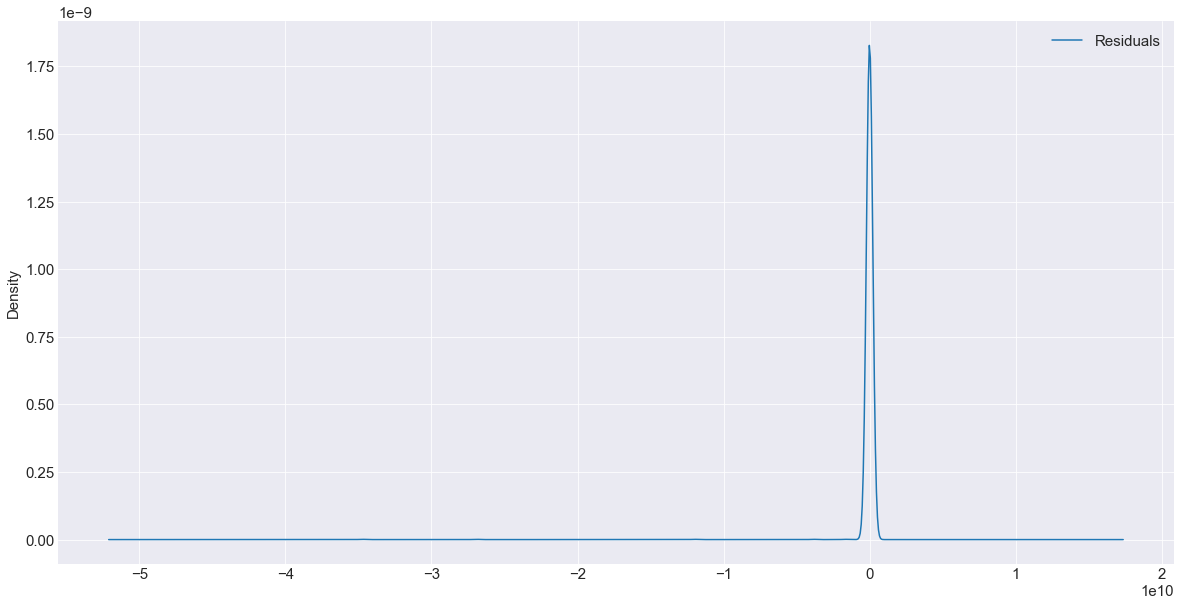

In [75]:
#Residual Analysis
data_residual = pd.DataFrame()
#Real - Predict
data_residual['Residuals'] = \
    data_train_predict[data_train_predict.columns[0]] - data_train_predict[data_train_predict.columns[1]]
data_residual.plot(kind='kde')

#Let's see the mean if it is in the center or show kind of skew
data_residual.describe()

In [302]:
draw_autocorrelation(pd.DataFrame(result.resid), 30)

NameError: name 'result' is not defined

In [70]:
#Augmented Dickey-Fuller test
residual = pd.DataFrame(result.resid)
residual.dropna(inplace= True)
test_adf(residual, residual.columns[0])

** Augmented Dickey-Fuller Test **

T-test: -12.141693292212285 < Confidence Interval[1%]: -3.433526838083527 - Result: Stationary
T-test: -12.141693292212285 < Confidence Interval[5%]: -2.8629433788300744 - Result: Stationary
T-test: -12.141693292212285 < Confidence Interval[10%]: -2.567517095065801 - Result: Stationary

P-Value: 1.6453953648076815e-22 < 0.05 - Result: Stationary


In [71]:
#Forecast vs. Test

#Predict taking full Test
forecast = result.get_prediction(start= '2020-09-19', end= '2021-05-09', 
                                 exog= X_test.loc['2020-09-19':'2021-05-09'][['Black_Friday', 'Easter', 'Covid']])
mean_forecast = forecast.predicted_mean
#Rename mean_forecast column name
mean_forecast.rename(f'{y_train.name}_predicted', inplace= True)

2020-09-19    10.005896
2020-09-20    10.241901
2020-09-21    11.100572
2020-09-22    10.706082
2020-09-23    11.025286
                ...    
2021-05-05     3.345079
2021-05-06     3.211531
2021-05-07     3.191354
2021-05-08     2.748687
2021-05-09     2.839319
Freq: D, Name: Revenue_predicted, Length: 233, dtype: float64

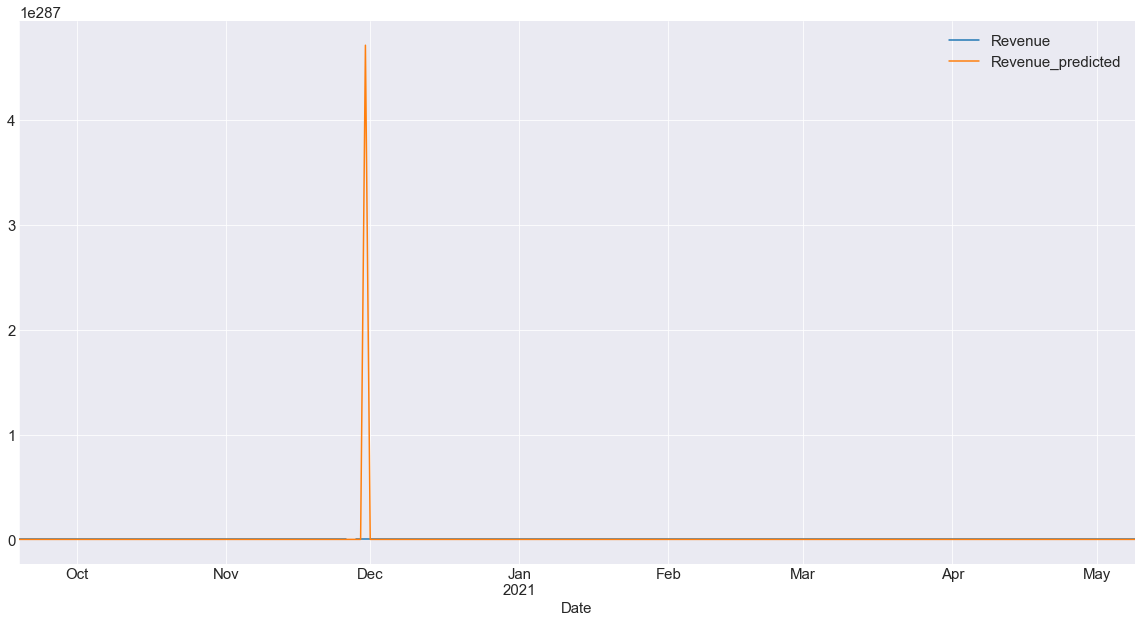

In [101]:
#Let's see how this model predict
data_test_predict = pd.concat([np.expm1(y_test), np.expm1(mean_forecast)], axis= 1)
data_test_predict.plot()

confidence_intervals = forecast.conf_int()
confidence_intervals = np.expm1(confidence_intervals)
plt.fill_between(confidence_intervals.index, confidence_intervals[confidence_intervals.columns[0]],
                 confidence_intervals[confidence_intervals.columns[1]], color='pink', alpha=0.5)

In [73]:
metric_rmse(data_test_predict, 'Revenue')

85033799.07349415

### Square Time Series Analysis

In [304]:
data_sqrt = data_small.copy()
data_sqrt['Revenue'] = np.sqrt(data_sqrt['Revenue'])

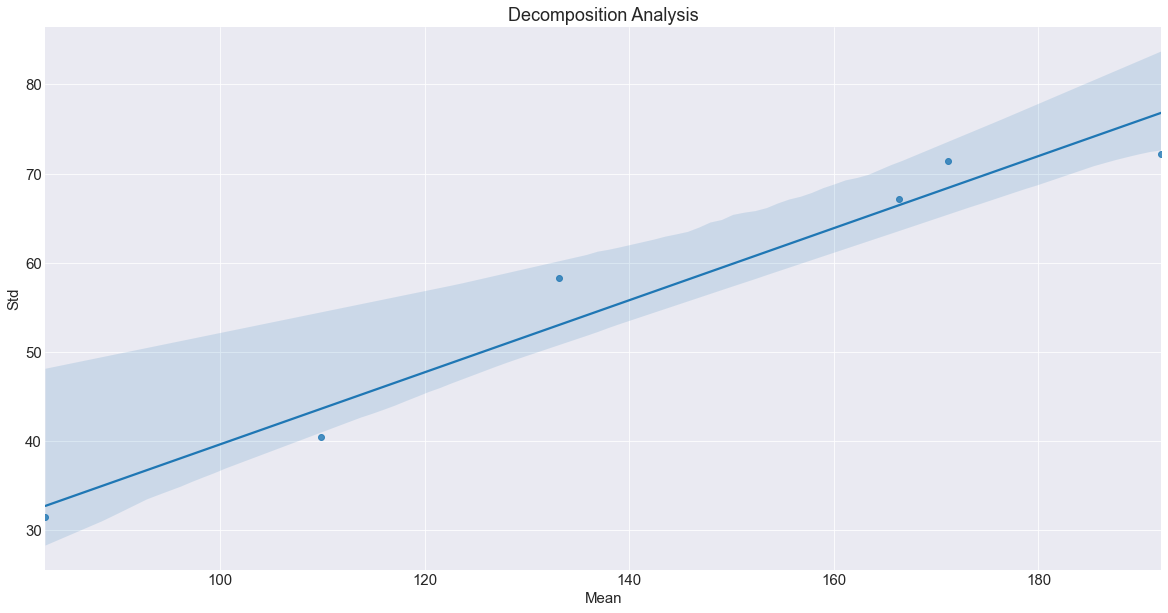

In [305]:
draw_decomposition(data_sqrt);

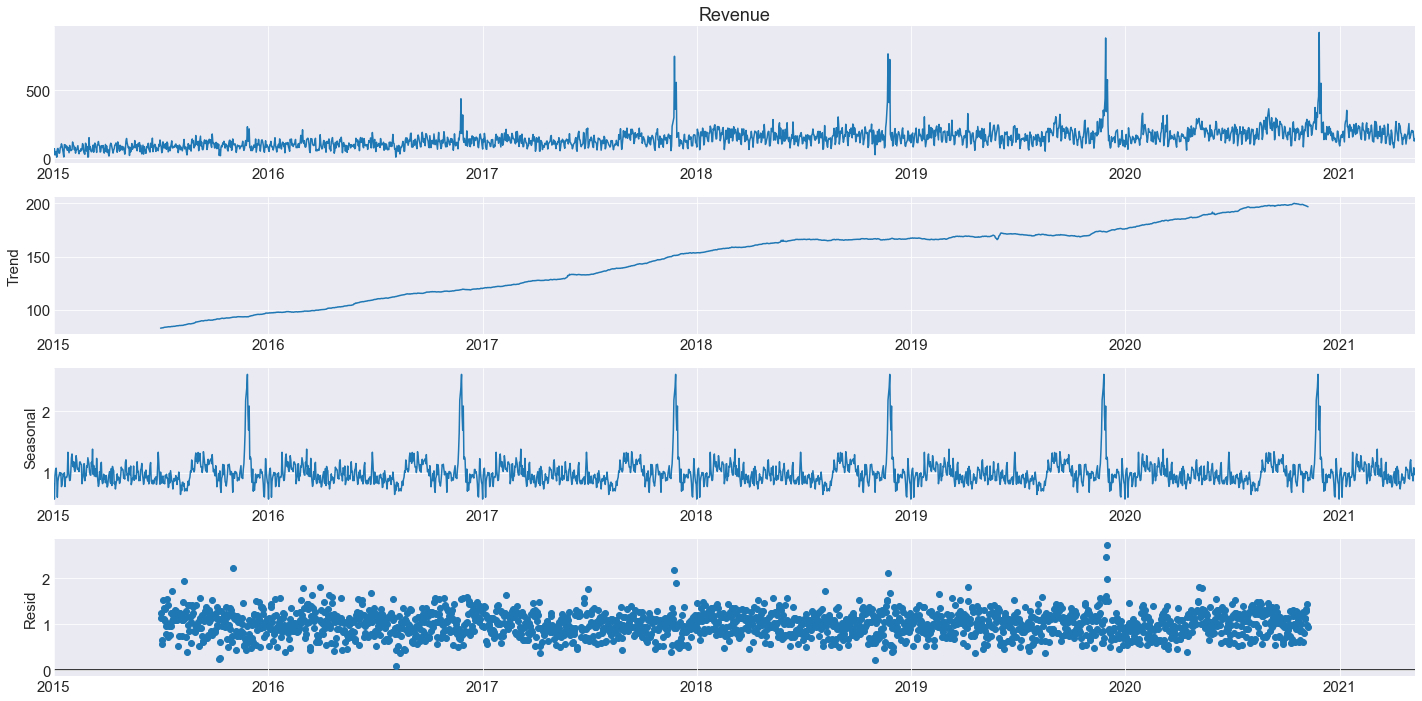

In [78]:
s_d_sqrt = seasonal_decompose(data_sqrt['Revenue'], period= 365, model= 'multiplicative')
s_d_sqrt.plot();

In [79]:
test_adf(data_sqrt, 'Revenue')

** Augmented Dickey-Fuller Test **

T-test: -4.1645727299394535 < Confidence Interval[1%]: -3.4332050526159112 - Result: Stationary
T-test: -4.1645727299394535 < Confidence Interval[5%]: -2.8628012970364574 - Result: Stationary
T-test: -4.1645727299394535 < Confidence Interval[10%]: -2.5674414457185817 - Result: Stationary

P-Value: 0.000756033819549469 < 0.05 - Result: Stationary


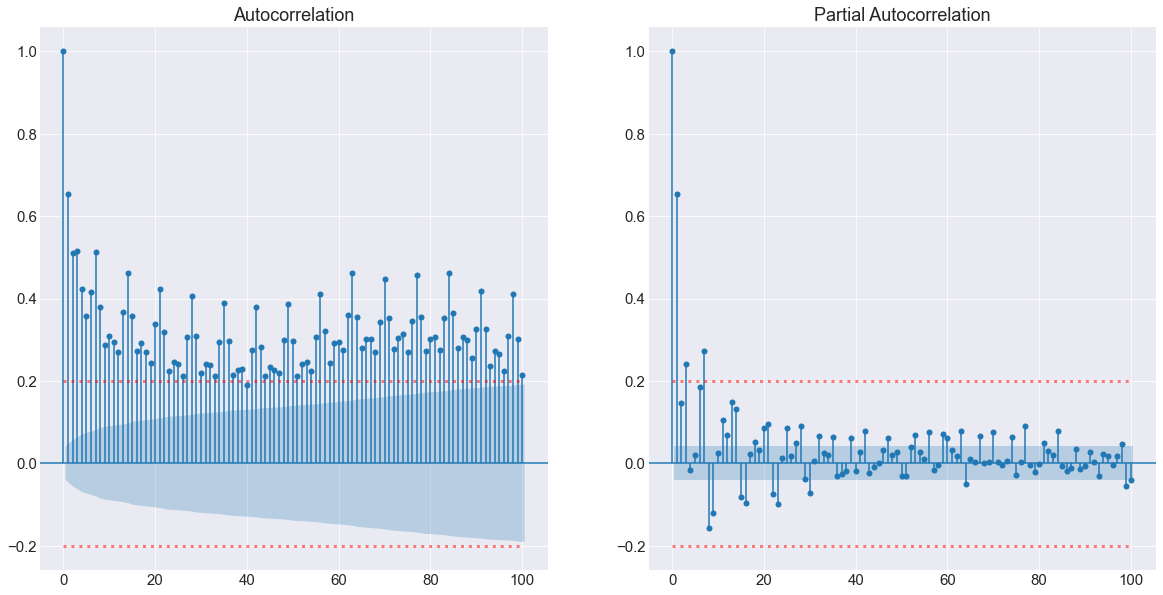

In [306]:
draw_autocorrelation(data_sqrt, 100)

### Sqrt Arima 

In [24]:
#Let's create the new exogenous variables
data_exogenous_sqrt = get_exogenous_features(data_sqrt)

In [138]:
#We have create a GridSearch in order to chose the better hyperparameters
#IMPORTANT, this task is quite intensive so we are saving a pickle for multiple iterations.
#ASSUMPTIONS, we would like to test with 365 season but we do not have enough memory
arima_params = {'p': [0, 4],
                'd': [0, 2], #Up to 1
                'q': [0, 4]}

sarima_params = {'P': [0, 4],
                 'D': [0, 2], #Up to 1
                 'Q': [0, 4],
                 'S': [7]}

#t = ['n','c','t','ct']
trend_params = ['c'] #We has test before and this is the best option always

In [25]:
X_train, y_train, X_test, y_test = sarimax_preparation_split(data_exogenous_sqrt)

In [ ]:
test_aic = gridsearch_sarimax(y_train, X_train[['Black_Friday', 'Easter', 'Covid']], arima_params, 
                             sarima_params, trend_params)

In [119]:
sorted(test_aic.items(), key=lambda x: x[1])

[((1, 0, 1, '-', 0, 1, 1, 7, '-', 'c'), 20716.71392250466),
 ((1, 0, 1, '-', 1, 1, 1, 7, '-', 'c'), 20716.92141933),
 ((1, 0, 1, '-', 0, 1, 1, 7, '-', 'n'), 20734.259905031497),
 ((1, 0, 1, '-', 1, 1, 1, 7, '-', 'n'), 20736.423939857275),
 ((1, 1, 1, '-', 0, 1, 1, 7, '-', 'n'), 20756.70747803355),
 ((1, 1, 1, '-', 1, 1, 1, 7, '-', 'n'), 20763.023790883817),
 ((1, 0, 0, '-', 0, 1, 1, 7, '-', 'c'), 20772.97049405372),
 ((1, 0, 0, '-', 1, 1, 1, 7, '-', 'n'), 20804.053614725108),
 ((1, 0, 0, '-', 0, 1, 1, 7, '-', 'n'), 20808.70342985497),
 ((1, 0, 0, '-', 1, 1, 1, 7, '-', 'c'), 20809.66505232566),
 ((0, 1, 1, '-', 1, 1, 1, 7, '-', 'n'), 20834.17159513651),
 ((0, 1, 1, '-', 0, 1, 1, 7, '-', 'n'), 20836.957638968266),
 ((1, 1, 1, '-', 1, 0, 1, 7, '-', 'n'), 20858.498377415446),
 ((1, 1, 1, '-', 1, 1, 1, 7, '-', 'c'), 20865.67815326595),
 ((1, 1, 1, '-', 0, 1, 1, 7, '-', 'c'), 20894.448387451026),
 ((0, 0, 1, '-', 1, 1, 1, 7, '-', 'c'), 20898.56875778031),
 ((0, 1, 1, '-', 1, 1, 1, 7, '-', 'c

In [20]:
test_aic = pickle_to_object(pickle_file)

In [21]:
sorted(test_aic.items(), key=lambda x: x[1])

[((0, 1, 2, '-', 2, 1, 1, 7, '-', 'c'), 129.7265275818368),
 ((1, 0, 2, '-', 1, 1, 2, 7, '-', 'c'), 20706.73600442587),
 ((1, 0, 3, '-', 2, 1, 2, 7, '-', 'c'), 20709.62117492332),
 ((1, 0, 3, '-', 3, 1, 2, 7, '-', 'c'), 20709.996951281373),
 ((1, 0, 3, '-', 1, 1, 3, 7, '-', 'c'), 20710.348807508264),
 ((1, 0, 3, '-', 3, 1, 3, 7, '-', 'c'), 20711.12423214681),
 ((1, 0, 3, '-', 2, 1, 3, 7, '-', 'c'), 20711.196785933415),
 ((1, 0, 3, '-', 1, 1, 2, 7, '-', 'c'), 20711.43590003671),
 ((1, 0, 1, '-', 0, 1, 1, 7, '-', 'c'), 20716.71392250466),
 ((1, 0, 1, '-', 1, 1, 1, 7, '-', 'c'), 20716.92141933),
 ((1, 0, 1, '-', 1, 1, 2, 7, '-', 'c'), 20717.133011600203),
 ((1, 0, 1, '-', 2, 1, 2, 7, '-', 'c'), 20717.54000169415),
 ((1, 0, 1, '-', 2, 1, 3, 7, '-', 'c'), 20718.61215734003),
 ((1, 0, 1, '-', 0, 1, 3, 7, '-', 'c'), 20719.691497262622),
 ((1, 0, 1, '-', 1, 1, 3, 7, '-', 'c'), 20720.11671068731),
 ((1, 0, 1, '-', 3, 1, 2, 7, '-', 'c'), 20720.45145494505),
 ((1, 0, 1, '-', 3, 1, 3, 7, '-', 'c')

In [26]:
#Fit considering best hyperparameters
model = SARIMAX(endog= y_train, exog= X_train[['Black_Friday', 'Easter', 'Covid']],
                order= (1, 0, 2), seasonal_order= (1, 1, 2, 7), trend= 'c')
result = model.fit()

In [27]:
#Predict taking full Train
forecast = result.get_prediction(start= '2015-01-01', end= '2020-09-18', 
                                 exog= X_train.loc['2015-01-01':'2020-09-18'][['Black_Friday', 'Easter', 'Covid']])
mean_forecast = forecast.predicted_mean
#Rename mean_forecast column name
mean_forecast.rename(f'{y_train.name}_predicted', inplace= True)

Date
2015-01-01      0.383327
2015-01-02      0.439084
2015-01-03      0.479207
2015-01-04      0.459059
2015-01-05      0.456926
                 ...    
2020-09-14    229.957211
2020-09-15    245.924583
2020-09-16    230.615159
2020-09-17    258.166237
2020-09-18    234.922997
Freq: D, Name: Revenue_predicted, Length: 2088, dtype: float64

<AxesSubplot:xlabel='Date'>

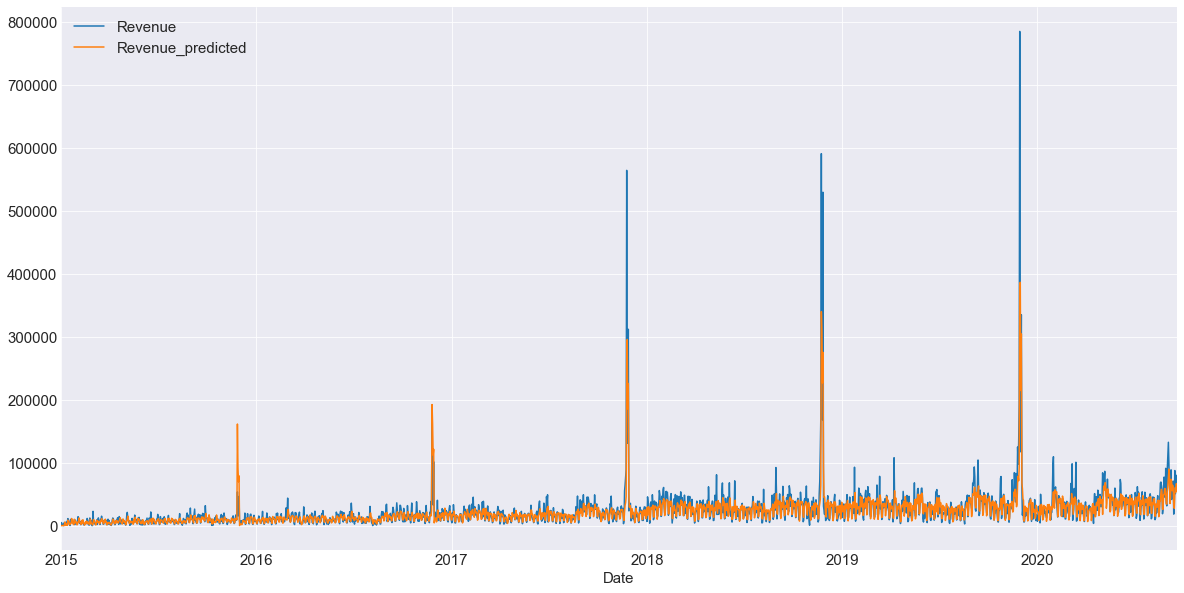

In [28]:
data_train_predict = pd.concat([pd.DataFrame(y_train).apply(lambda x: x ** 2), 
                                pd.DataFrame(mean_forecast).apply(lambda x: x ** 2)], axis= 1)
data_train_predict.plot()

In [29]:
#Let's see a subset of the Time Series
data_train_predict.loc['2020-05-01':'2020-09-18'].plot()

<AxesSubplot:xlabel='Date'>

In [30]:
metric_rmse(data_train_predict, 'Revenue')

19621.188643040987

Residuals
count    2088.000000
mean     1232.522989
std     19587.130315
min   -269009.237043
25%     -4103.613928
50%       -71.370170
75%      4893.141589
max    404720.121675

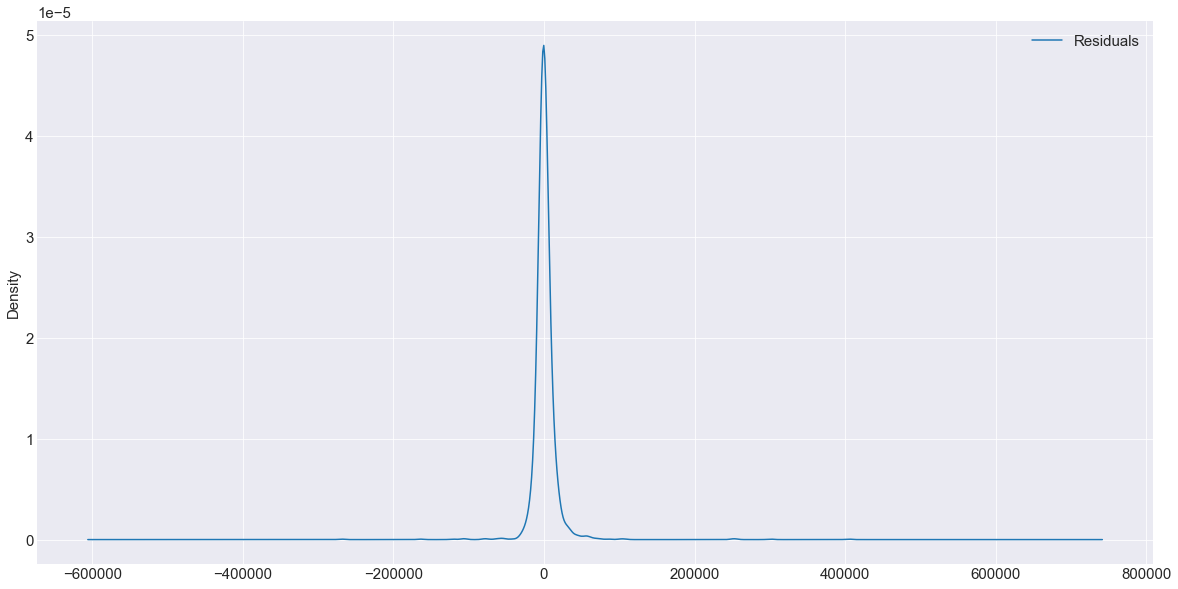

In [31]:
#Residual Analysis
data_residual = pd.DataFrame()
#Real - Predict
data_residual['Residuals'] = \
    data_train_predict[data_train_predict.columns[0]] - data_train_predict[data_train_predict.columns[1]]
data_residual.plot(kind='kde')

#Let's see the mean if it is in the center or show kind of skew
data_residual.describe()

In [307]:
draw_autocorrelation(pd.DataFrame(result.resid), 30)

NameError: name 'result' is not defined

In [34]:
#Augmented Dickey-Fuller test
residual = pd.DataFrame(result.resid)
residual.dropna(inplace= True)
test_adf(residual, residual.columns[0])

** Augmented Dickey-Fuller Test **

T-test: -45.69568884529083 < Confidence Interval[1%]: -3.4334872119603324 - Result: Stationary
T-test: -45.69568884529083 < Confidence Interval[5%]: -2.862925883058088 - Result: Stationary
T-test: -45.69568884529083 < Confidence Interval[10%]: -2.567507779564507 - Result: Stationary

P-Value: 0.0 < 0.05 - Result: Stationary


In [35]:
#Forecast vs. Test

#Predict taking full Test
forecast = result.get_prediction(start= '2020-09-19', end= '2021-05-09', 
                                 exog= X_test.loc['2020-09-19':'2021-05-09'][['Black_Friday', 'Easter', 'Covid']])
mean_forecast = forecast.predicted_mean
#Rename mean_forecast column name
mean_forecast.rename(f'{y_train.name}_predicted', inplace= True)

2020-09-19    164.428558
2020-09-20    174.045927
2020-09-21    234.360490
2020-09-22    223.314736
2020-09-23    228.726663
                 ...    
2021-05-05    230.972416
2021-05-06    235.562066
2021-05-07    231.545778
2021-05-08    160.948584
2021-05-09    172.645094
Freq: D, Name: Revenue_predicted, Length: 233, dtype: float64

In [36]:
#Let's see how this model predict
data_test_predict = pd.concat([pd.DataFrame(y_test).apply(lambda x: x ** 2), 
                               pd.DataFrame(mean_forecast).apply(lambda x: x ** 2)], axis= 1)
data_test_predict.plot()

confidence_intervals = forecast.conf_int()
confidence_intervals = confidence_intervals.apply(lambda x: x ** 2)
plt.fill_between(confidence_intervals.index, confidence_intervals[confidence_intervals.columns[0]],
                 confidence_intervals[confidence_intervals.columns[1]], color='pink', alpha=0.5)

In [37]:
metric_rmse(data_test_predict, 'Revenue')

45356.557148849846

### Triple Exponential Smoothing

Now, we are going to apply another classical Time Series Forecast method called Triple Exponential Smoothing

In [68]:
#We have create a GridSearch in order to chose the better hyperparameters
#IMPORTANT, this task is quite intensive so we are saving a pickle for multiple iterations.

#Parameters for fit
trend_params = ['add','mul']
damped_params = [True, False]
seasonal_params = ['add','mul']
period_params = [49]
#Parameters for prediction
box_cox = [True, False]
bias_params = [True, False]

In [66]:
X_train, y_train, X_test, y_test = sarimax_preparation_split(data_small)

In [69]:
test_rmse = gridsearch_tes(y_train, trend_params, damped_params, seasonal_params, period_params, box_cox, bias_params)

In [153]:
sorted(test_rmse.items(), key=lambda x: x[1])

[(('mul', False, 'mul', 49, '-', True, True), 26318.88540473293),
 (('add', True, 'mul', 49, '-', True, True), 26319.98468729066),
 (('add', False, 'mul', 49, '-', True, True), 26324.22576135944),
 (('mul', True, 'mul', 49, '-', True, True), 26355.65336118144),
 (('add', False, 'mul', 49, '-', True, False), 26371.676168562444),
 (('add', True, 'mul', 49, '-', True, False), 26373.30689833187),
 (('mul', False, 'mul', 49, '-', True, False), 26382.213201091752),
 (('mul', True, 'mul', 49, '-', True, False), 26407.72175784717),
 (('mul', True, 'add', 49, '-', True, True), 26766.289881068253),
 (('mul', False, 'add', 49, '-', True, True), 26768.168970195256),
 (('add', False, 'add', 49, '-', True, True), 26771.566766244807),
 (('add', True, 'add', 49, '-', True, True), 26773.6037399587),
 (('mul', False, 'mul', 35, '-', True, True), 26784.826834092364),
 (('add', True, 'mul', 35, '-', True, True), 26808.374850540516),
 (('add', False, 'mul', 35, '-', True, True), 26809.621282793334),
 (('mu

In [70]:
#Fit considering best hyperparameters
model = ExponentialSmoothing(endog= y_train, trend= 'mul', damped= False, seasonal= 'mul', seasonal_periods= 49)
result = model.fit(optimized= True, use_boxcox= True, remove_bias= True)

In [71]:
#Predict taking full Train
forecast = result.predict(start= '2015-01-01', end= '2020-09-18')
forecast.rename(f'{y_train.name}_predicted', inplace= True)

Date
2015-01-01     5003.598206
2015-01-02     4676.751201
2015-01-03     3378.231495
2015-01-04     3094.066773
2015-01-05     4231.473709
                  ...     
2020-09-14    67871.585224
2020-09-15    65054.557271
2020-09-16    58179.091239
2020-09-17    74981.072375
2020-09-18    70012.312567
Freq: D, Name: Revenue_predicted, Length: 2088, dtype: float64

In [72]:
data_train_predict = pd.concat([y_train, forecast], axis= 1)
data_train_predict.plot()

<AxesSubplot:xlabel='Date'>

<AxesSubplot:xlabel='Date'>

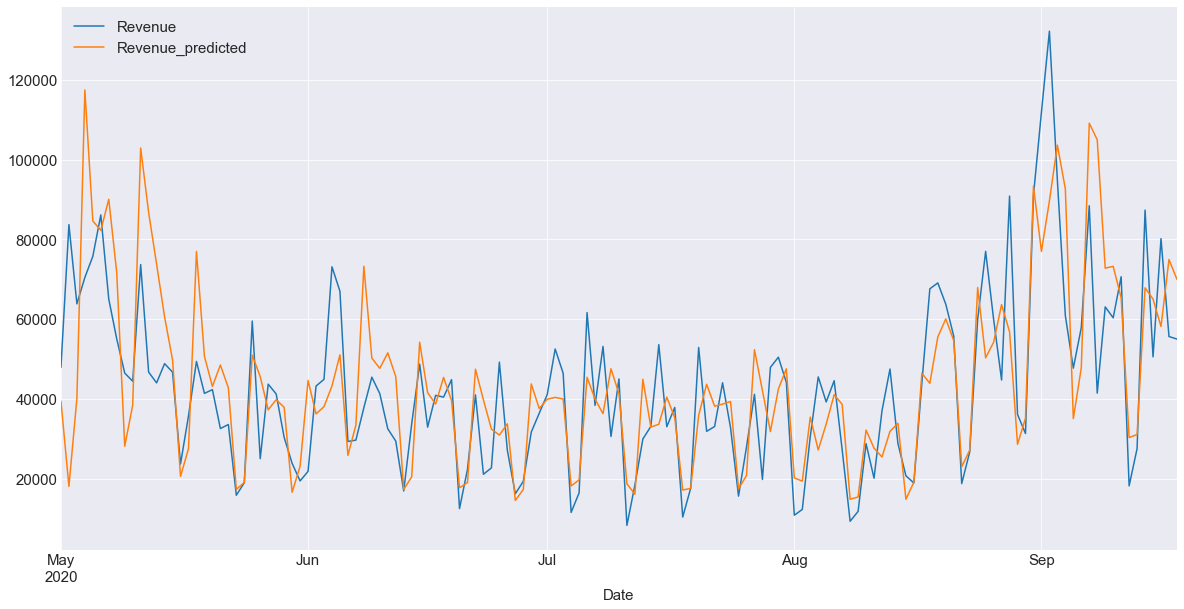

In [73]:
#Let's see a subset of the Time Series
data_train_predict.loc['2020-05-01':'2020-09-18'].plot()

In [74]:
metric_rmse(data_train_predict, 'Revenue')

26318.88540473293

Residuals
count  2.088000e+03
mean   1.299776e-12
std    2.632519e+04
min   -3.023694e+05
25%   -5.560762e+03
50%   -1.477460e+03
75%    3.426474e+03
max    6.311469e+05

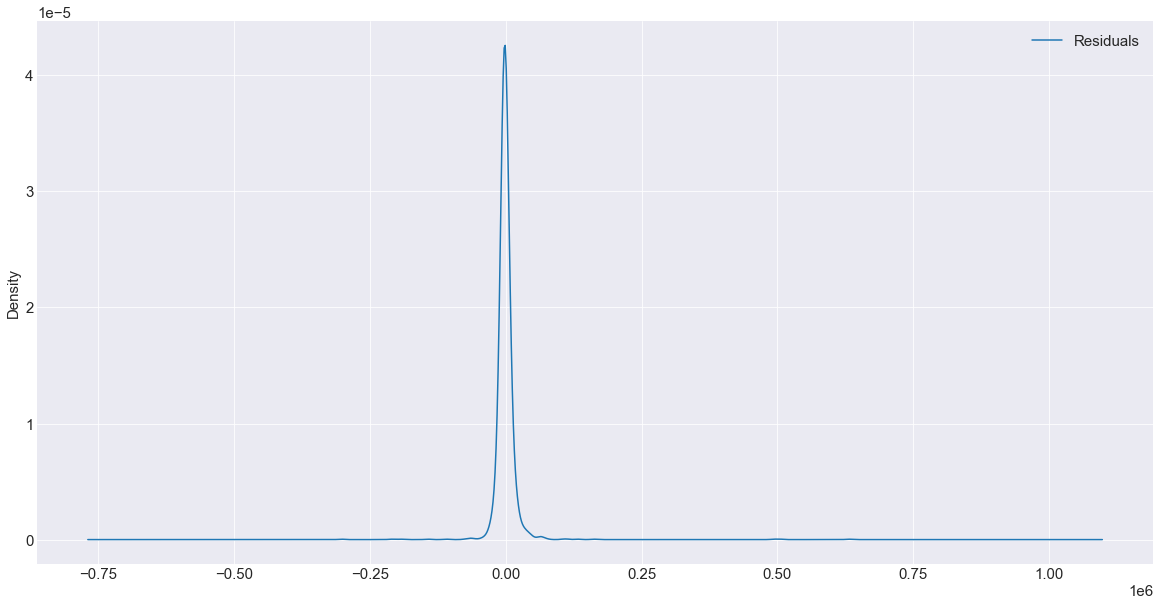

In [75]:
#Residual Analysis
data_residual = pd.DataFrame()
#Real - Predict
data_residual['Residuals'] = \
    data_train_predict[data_train_predict.columns[0]] - data_train_predict[data_train_predict.columns[1]]
data_residual.plot(kind='kde')

#Let's see the mean if it is in the center or show kind of skew
data_residual.describe()

In [308]:
draw_autocorrelation(pd.DataFrame(result.resid), 30)

NameError: name 'result' is not defined

In [76]:
#Augmented Dickey-Fuller test
residual = pd.DataFrame(result.resid)
residual.dropna(inplace= True)
test_adf(residual, residual.columns[0])

** Augmented Dickey-Fuller Test **

T-test: -19.180829942143056 < Confidence Interval[1%]: -3.433499298918619 - Result: Stationary
T-test: -19.180829942143056 < Confidence Interval[5%]: -2.8629312197305192 - Result: Stationary
T-test: -19.180829942143056 < Confidence Interval[10%]: -2.56751062103432 - Result: Stationary

P-Value: 0.0 < 0.05 - Result: Stationary


In [77]:
#Forecast vs. Test

#Predict taking full Test
forecast = result.predict(start= '2020-09-19', end= '2021-05-09')
forecast.rename(f'{y_train.name}_predicted', inplace= True)

2020-09-19    27131.535950
2020-09-20    31408.909655
2020-09-21    68021.872054
2020-09-22    53342.780134
2020-09-23    53206.552635
                  ...     
2021-05-05    30474.248053
2021-05-06    30119.693288
2021-05-07    27864.347976
2021-05-08    13316.307160
2021-05-09    15502.747089
Freq: D, Name: Revenue_predicted, Length: 233, dtype: float64

<AxesSubplot:xlabel='Date'>

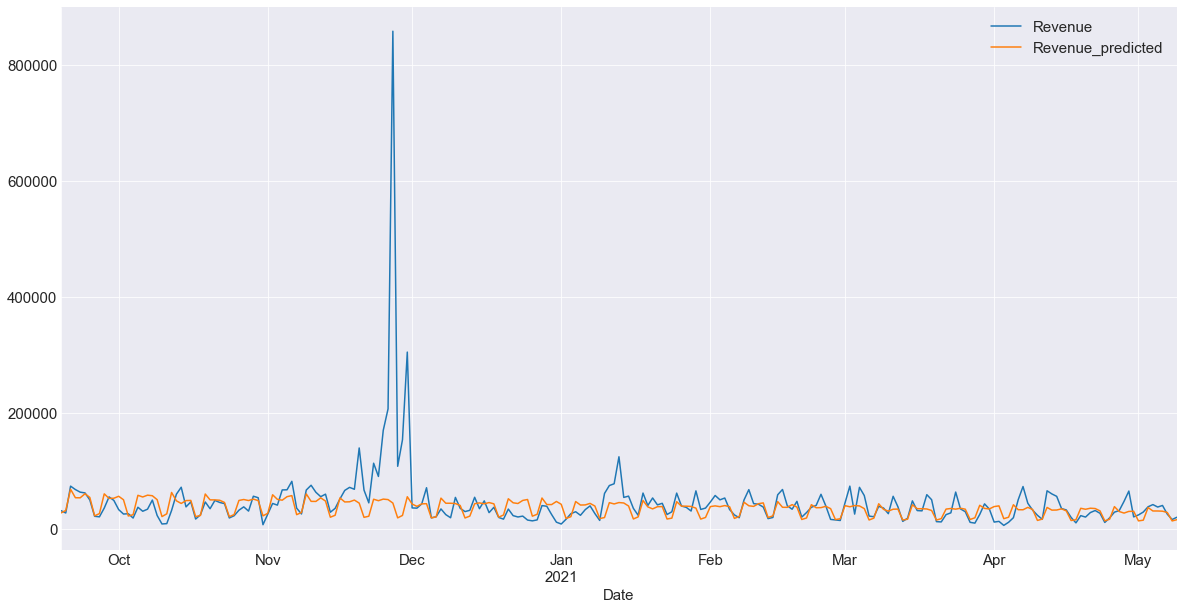

In [78]:
#Let's see how this model predict
data_test_predict = pd.concat([y_test, forecast], axis= 1)
data_test_predict.plot()

In [79]:
metric_rmse(data_test_predict, 'Revenue')

60830.33415477514

## Machine Learning Models for Time Series

In [28]:
#Create the lag features
lags = [1, 2, 3, 4, 5, 6, 7, 364]
data_lag = get_lag_features(data_small, 'Revenue', lags)

In [29]:
#Temporary DataFrame for checking correlation
data_temp = data_lag.copy()
data_temp['Revenue'] = data_small['Revenue']

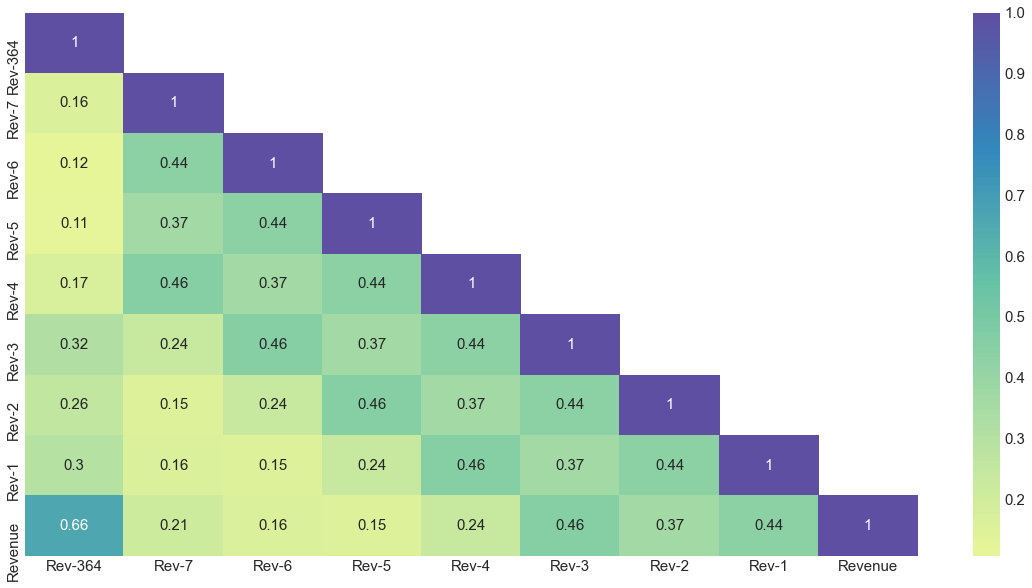

In [30]:
#Let's check the correlation
corr_matrix(data_temp)

In [31]:
#Create Seasonal Features - I am transforming as if they were non-numeric variables
data_seasonal = pd.get_dummies(data_small[['Year', 'Month', 'Day']].astype('str'))
#Create Exogenus Features
data_exogenous = get_exogenous_features(data_small)[['Black_Friday', 'Easter', 'Covid']]
#Create the model to Train and Test with the different Machine Learning models
data_model = pd.concat([data_seasonal, data_exogenous, data_lag, data_small['Revenue']], axis= 1)
data_model.dropna(inplace= True)

### Variance Analysis
It is important to see if we have features with variance close to 0 in that case, we should remove them. This only applies to quantitative variables.

In [22]:
non_zero_variance(data_model, data_model.iloc[:,0:-1])

Day_24 feature: has non-zero variance - Std:0.18
Month_2 feature: has non-zero variance - Std:0.28
Month_3 feature: has non-zero variance - Std:0.29
Day_30 feature: has non-zero variance - Std:0.17
Day_8 feature: has non-zero variance - Std:0.18
Rev-6 feature: has non-zero variance - Std:41024.65
Year_2019 feature: has non-zero variance - Std:0.39
Day_19 feature: has non-zero variance - Std:0.18
Day_1 feature: has non-zero variance - Std:0.18
Day_25 feature: has non-zero variance - Std:0.18
Day_31 feature: has non-zero variance - Std:0.14
Rev-2 feature: has non-zero variance - Std:41014.23
Day_3 feature: has non-zero variance - Std:0.18
Day_14 feature: has non-zero variance - Std:0.18
Year_2016 feature: has non-zero variance - Std:0.39
Day_22 feature: has non-zero variance - Std:0.18
Month_9 feature: has non-zero variance - Std:0.27
Year_2020 feature: has non-zero variance - Std:0.39
Rev-3 feature: has non-zero variance - Std:41015.14
Day_5 feature: has non-zero variance - Std:0.18
Day

### Train/Test Split
Let's prepare the X_train, X_test, y_train and y_test data and scale these features with Robust scaler

A prepare the full time series adding the validation data

In [23]:
#Train and Test Split
X_train, X_test, y_train, y_test = time_series_train_test_split(data_model, lags)

In [184]:
#Scale the features
X_train_scaled, X_test_scaled = data_normalization(X_train, X_test, 'robust')

### Data Validation and Data Forecasting
We are going to concatenate the current Time Series Data with a longer file with more reals values and use this bigger model for checking how good or bad is woking the model

Moreover, we are going to create the last Data Set for Forecasting purposes. The idea is forecasting up to 14 days in advance.
We are going to add to the Data Validation Data Set a new one with the lagged, seasonal and exogenous features in order to try to estimate what will be the sales.

Some important assumptions. We need to trained 14 models for each forecast:
* model_trained_1: This will forecast T+1
* model_trained_2: This will forecast T+2
* And so on...

In [264]:
data_full = pd.concat([data_small, data_validation])

In [265]:
#Create the lag features for data validation
lags = [1, 2, 3, 4, 5, 6, 7, 364]
data_lag_full = get_lag_features(data_full, 'Revenue', lags)

In [35]:
#Create Seasonal Features - I am transforming as if they were non-numeric variables
data_seasonal_full = pd.get_dummies(data_full[['Year', 'Month', 'Day']].astype('str'))
#Create Exogenus Features
data_exogenous_full = get_exogenous_features(data_full)[['Black_Friday', 'Easter', 'Covid']]
#Create the model to Train and Test with the different Machine Learning models
data_model_full = pd.concat([data_seasonal_full, data_exogenous_full, data_lag_full, 
                                   data_full['Revenue']], axis= 1)
data_model_full.dropna(inplace= True)

### Linear Regression Example

Let's check a simple Linear Regression for this data

In [98]:
#Train and Test Split
X_train, X_test, y_train, y_test = time_series_train_test_split(data_model, lags)

In [99]:
#Scale the features
X_train_scaled, X_test_scaled = data_normalization(X_train, X_test, 'robust')

In [100]:
#Linear Regression()
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [101]:
#Let's predict this model with Train Data
y_predict_train = model.predict(X_train_scaled)
y_predict_train = pd.Series(y_predict_train, index= y_train.index)
y_predict_train = y_predict_train.rename(f'{y_train.name}_predicted')
#Create the new DataFrame with the Train y values and Train predict values
forecast_train = pd.DataFrame([y_train, y_predict_train]).T

In [102]:
#Calculate the RMSE
metric_rmse(forecast_train, 'Revenue')

14578.265520365843

<AxesSubplot:xlabel='Date'>

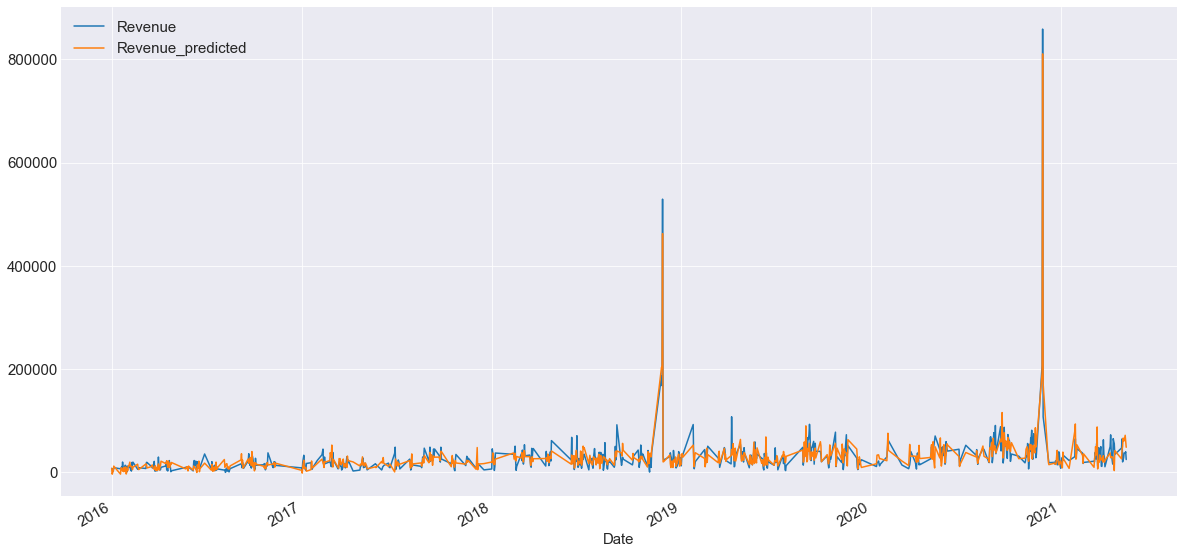

In [103]:
#Let's see the forecast
forecast_train.plot()

#### Residual Analysis 

In [104]:
forecast_train['Residuals'] = forecast_train['Revenue'] - forecast_train['Revenue_predicted']

<AxesSubplot:xlabel='Date'>

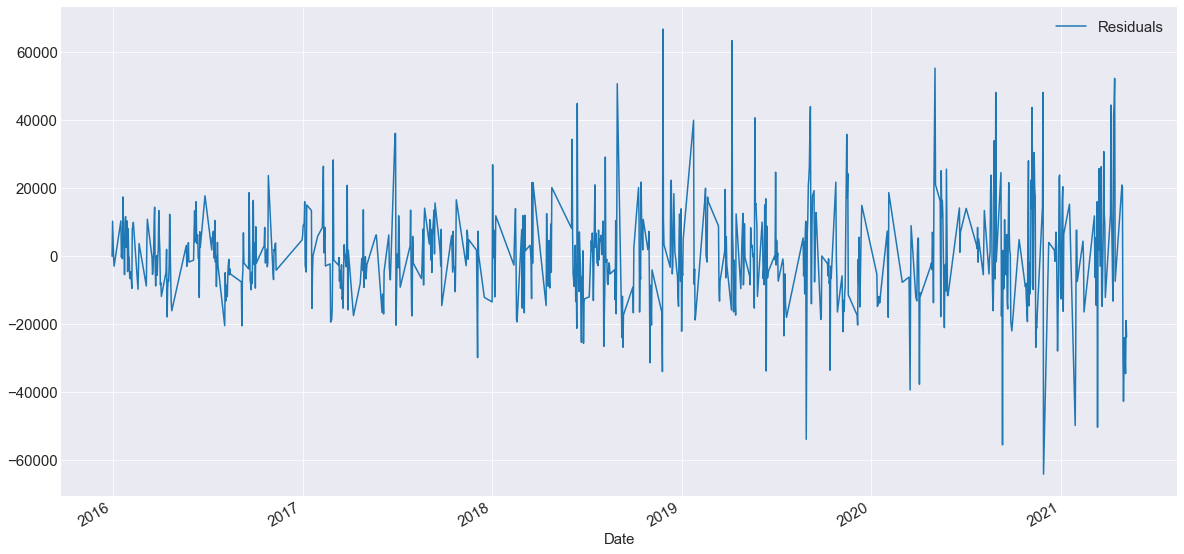

In [105]:
forecast_train[['Residuals']].plot()

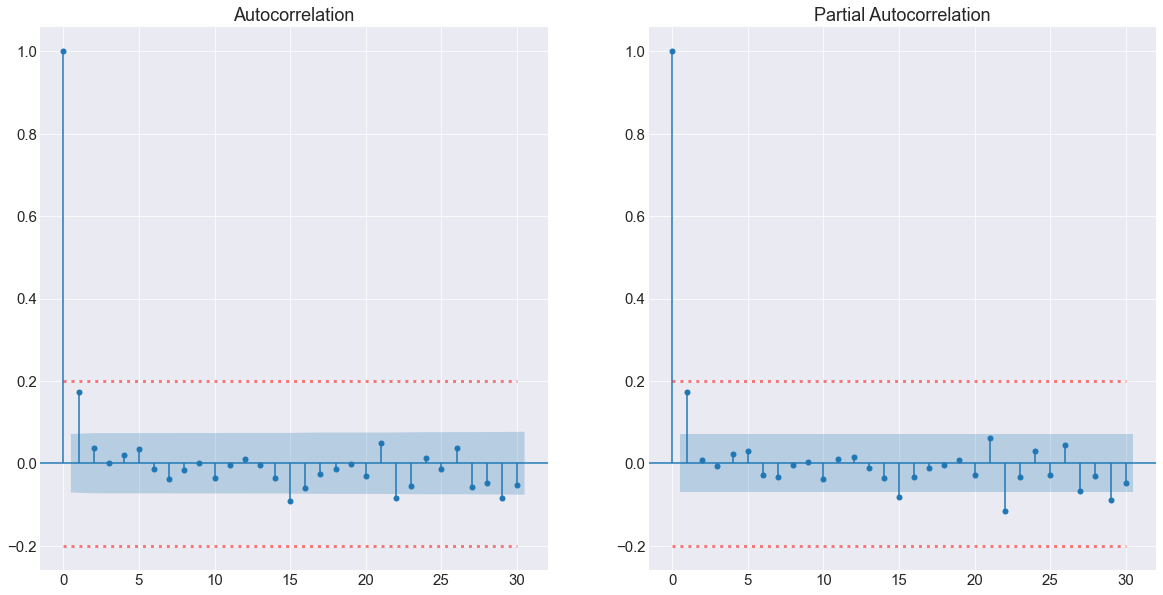

In [286]:
draw_autocorrelation(forecast_train[['Residuals']], 30)

In [108]:
test_adf(forecast_train, 'Residuals')

** Augmented Dickey-Fuller Test **

T-test: -23.105127741667594 < Confidence Interval[1%]: -3.4389722010249386 - Result: Stationary
T-test: -23.105127741667594 < Confidence Interval[5%]: -2.8653454308425705 - Result: Stationary
T-test: -23.105127741667594 < Confidence Interval[10%]: -2.5687964010457227 - Result: Stationary

P-Value: 0.0 < 0.05 - Result: Stationary


In [109]:
#R²
r2_score(forecast_train['Revenue'], forecast_train['Revenue_predicted'])

0.8716276577424926

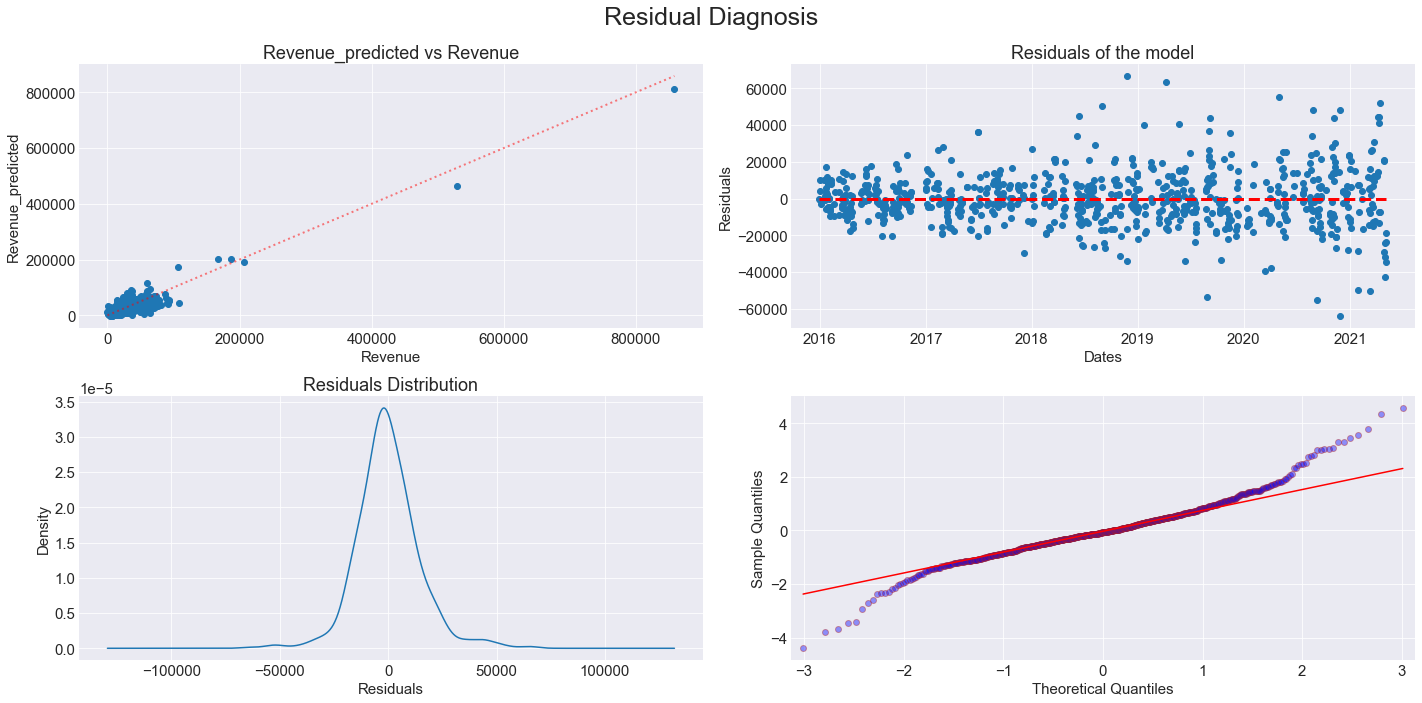

In [110]:
#Residual Analysis
draw_residuals_diagnosis(forecast_train, ['Revenue', 'Revenue_predicted', 'Residuals'])

#### Predict 

In [111]:
#Now how this perform with the Test Data
y_predict_test = model.predict(X_test_scaled)
y_predict_test = pd.Series(y_predict_test, index= y_test.index)
y_predict_test = y_predict_test.rename(f'{y_test.name}_predicted')
#Create the new DataFrame with the Test y values and Test predict values
forecast_test = pd.DataFrame([y_test, y_predict_test]).T

In [112]:
metric_rmse(forecast_test, 'Revenue')

29519.2466327241

<AxesSubplot:xlabel='Date'>

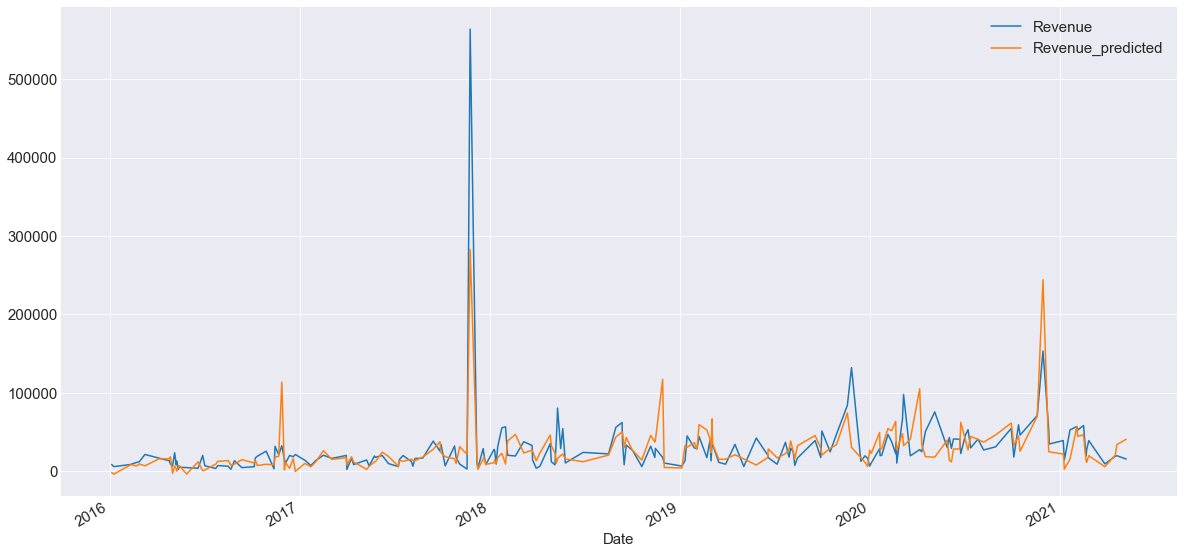

In [113]:
#Let's see the forecast
forecast_test.plot()

In [114]:
#R²
r2_score(forecast_test['Revenue'], forecast_test['Revenue_predicted'])

0.5450427846104638

<AxesSubplot:>

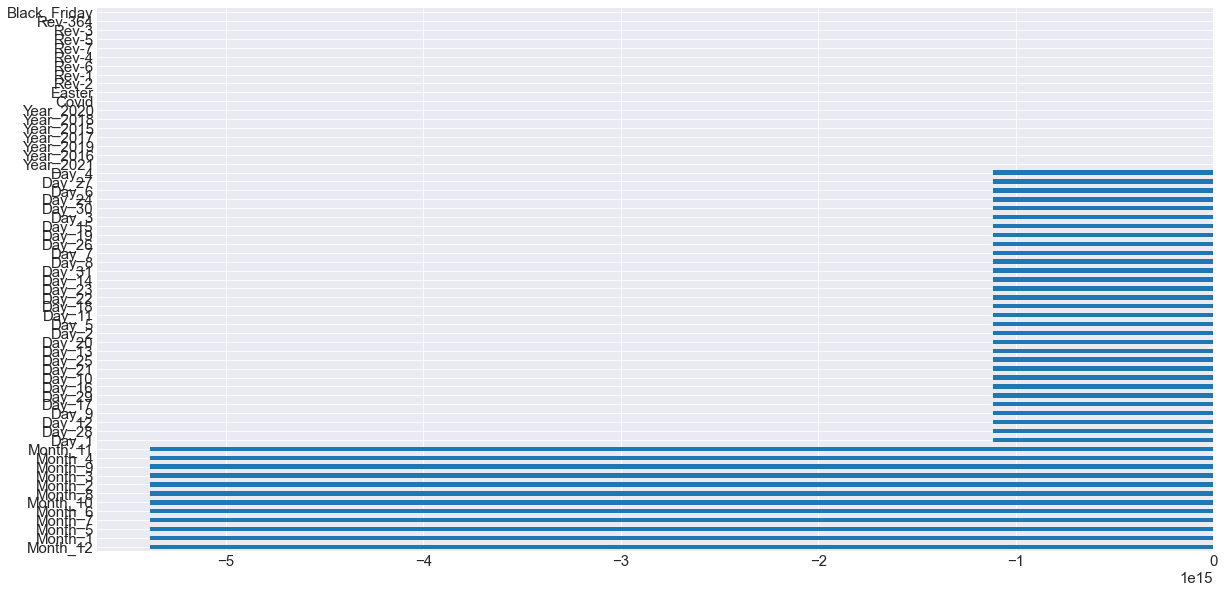

In [115]:
#Features Importance
pd.Series(model.coef_, data_model.columns[0:-1]).sort_values(ascending = True).plot(kind = 'barh')

### Test Machine Learning Models

Assumptions, we are going to fit and predict for forecasting just one day. Then we will chose the best model and create a new dataset for predicting the day after and so on. In total seven different Dataframes.

We are going to test different ML Regression models:
* Ridge
* Elastic Net
* KNeighborsRegressor
* RandomForestRegressor
* GradientBoostingRegressor
* XGBRegressor
* LGBMRegressor

First of all, get the right hyperparameters via GridSearch

##### Constants for GridSearch Time Series

In [34]:
ridge_params = {
    'alpha': [0.001, 0.01, 0.1, 1, 10],
    'fit_intercept': [True, False],
    'solver': ['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
    }

elastic_net_params = {
    'alpha': [0.001, 0.01, 0.1, 0.5, 0.9, 0.99, 0.999],
    'l1_ratios': np.linspace(0, 1, 20),
    'fit_intercept': [True, False]
    }

k_neighbors_params = {
    'n_neighbors': np.linspace(5, 100, 20, dtype= int),
    'weights': ['uniform', 'distance'],
    'algorithm': ['ball_tree', 'kd_tree', 'brute']
    }

random_forest_params = {  
    'n_estimators': np.linspace(100, 1000, 3, dtype= int),
    'max_depth': [30, 40, 50],
    'min_samples_split': np.linspace(2, 10, 3, dtype= int),
    'min_samples_leaf': np.linspace(1, 10, 10, dtype= int),
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True, False],
    }

gradient_boosting_params = {
    'loss': ['ls', 'lad', 'huber', 'quantile'],
    'n_estimators': np.linspace(100, 1000, 3, dtype= int),
    'min_samples_split': np.linspace(2, 10, 3, dtype= int),
    'min_samples_leaf': np.linspace(1, 10, 10, dtype= int),
    'max_depth': [3, 4, 5],
    'max_features': ['auto', 'sqrt']
    }

xgb_params = {
    'n_estimators': np.linspace(100, 1000, 4, dtype= int),
    'max_depth': np.linspace(3, 20, 6, dtype= int),
    'booster': ['gbtree', 'gblinear', 'dart']
    }

lgbm_params = {
    'num_leaves': np.linspace(31, 2000, 6, dtype= int),
    'n_estimators': np.linspace(50, 1000, 6, dtype= int)
    }

#### Ridge 

In [80]:
#GridSearch Ridge
models_list_ridge, metrics_list_ridge, forecasts_list_ridge = \
    grid_search_times_series('ridge', ridge_params, data_model, 'Revenue', lags, 10, 'rmse')

In [106]:
best_model_metric(models_list_ridge, metrics_list_ridge)

(26847.66211027263, Ridge(alpha=0.001, fit_intercept=False, solver='sag'))

#### Elastic Net

In [81]:
#GridSearch Elastic Net
models_list_elastic, metrics_list_elastic, forecasts_list_elastic = \
    grid_search_times_series('elastic', elastic_net_params, data_model, 'Revenue', lags, 10, 'rmse')

In [108]:
best_model_metric(models_list_elastic, metrics_list_elastic)

(24270.631929236923, ElasticNet(alpha=0.9, l1_ratio=0.3684210526315789))

#### K-Neighbors 

In [91]:
#GridSearch K-neighbors
models_list_kn, metrics_list_kn, forecasts_list_kn = \
    grid_search_times_series('kneighbors', k_neighbors_params, data_model, 'Revenue', lags, 10, 'rmse')

In [109]:
best_model_metric(models_list_kn, metrics_list_kn)

(27118.266600226074,
 KNeighborsRegressor(algorithm='kd_tree', n_neighbors=10, weights='distance'))

#### Random Forest

In [26]:
#Random Forest
models_list_random, metrics_list_random, forecasts_list_random = \
    grid_search_times_series('random', random_forest_params, data_model, 'Revenue', lags, 10, 'rmse')

In [27]:
best_model_metric(models_list_random, metrics_list_random)

(25700.928861148837, RandomForestRegressor(max_depth=40))

#### Gradient Boost

In [102]:
#GridSearch Gradient Boost
models_list_gradient, metrics_list_gradient, forecasts_list_gradient = \
    grid_search_times_series('gradient', gradient_boosting_params, data_model, 'Revenue', lags, 10, 'rmse')

In [125]:
best_model_metric(models_list_gradient, metrics_list_gradient)

(22352.736923338736, GradientBoostingRegressor(max_features='auto'))

#### XGB

In [124]:
#XGB
models_list_xgb, metrics_list_xgb, forecasts_list_xgb = \
    grid_search_times_series('xgb', xgb_params, data_model, 'Revenue', lags, 10, 'rmse')

[10:46:56] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:541: 
Parameters: { max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[10:46:56] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:541: 
Parameters: { max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[10:46:56] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:541: 
Parameters: { max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down

[10:47:06] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:541: 
Parameters: { max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[10:47:06] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:541: 
Parameters: { max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[10:47:06] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:541: 
Parameters: { max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down

[10:47:26] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:541: 
Parameters: { max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[10:47:26] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:541: 
Parameters: { max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[10:47:38] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:541: 
Parameters: { max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down

[10:48:13] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:541: 
Parameters: { max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[10:48:13] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:541: 
Parameters: { max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[10:48:13] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:541: 
Parameters: { max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down

[10:49:29] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:541: 
Parameters: { max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[10:49:29] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:541: 
Parameters: { max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[10:49:29] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:541: 
Parameters: { max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down

[10:51:57] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:541: 
Parameters: { max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[10:51:57] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:541: 
Parameters: { max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[10:51:57] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:541: 
Parameters: { max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down

[10:54:00] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:541: 
Parameters: { max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[10:54:00] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:541: 
Parameters: { max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[10:54:01] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:541: 
Parameters: { max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down

[10:57:31] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:541: 
Parameters: { max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[10:59:52] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:541: 
Parameters: { max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[10:59:52] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:541: 
Parameters: { max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down

[11:08:07] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:541: 
Parameters: { max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:08:08] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:541: 
Parameters: { max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:08:08] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:541: 
Parameters: { max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down

[11:12:03] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:541: 
Parameters: { max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:12:04] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:541: 
Parameters: { max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:12:04] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:541: 
Parameters: { max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down

[11:21:20] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:541: 
Parameters: { max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:21:20] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:541: 
Parameters: { max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:21:21] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:541: 
Parameters: { max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down

In [126]:
best_model_metric(models_list_xgb, metrics_list_xgb)

(25635.222201310367,
 XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=13,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=1000, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None))

#### LGBM

In [36]:
#LGBMRegressor
models_list_lgbm, metrics_list_lgbm, forecasts_list_lgbm = \
    grid_search_times_series('lgbm', lgbm_params, data_model, 'Revenue', lags, 10, 'rmse')

In [37]:
best_model_metric(models_list_lgbm, metrics_list_lgbm)

(28423.544286052154, LGBMRegressor(n_estimators=50))

### Training and Validation 

#### Train/Test Split
Let's prepare the X_train, X_test, y_train and y_test data and scale these features with Robust scaler

A prepare the full time series adding the validation data

In [29]:
#Train and Test Split
X_train, X_test, y_train, y_test = time_series_train_test_split(data_model, lags)

In [30]:
#Scale the features
X_train_scaled, X_test_scaled = data_normalization(X_train, X_test, 'robust')

#### Ridge Model

In [31]:
#Ridge Model
model_ridge = Ridge(alpha=0.001, fit_intercept=False, solver='sag')

In [32]:
#Model
model_ridge.fit(X_train_scaled, y_train)

#Create the new DataFrame with the Train y values and Train predict values
forecast_ridge = predict_model(model_ridge, X_train_scaled, y_train)

#Calculate the RMSE and R²
rmse_ridge = metric_rmse(forecast_ridge, "Revenue")
r2_ridge = r2_score(forecast_ridge["Revenue"], forecast_ridge["Revenue_predicted"])
print(f'Ridge RMSE_train: {rmse_ridge}')
print(f'R²: {r2_ridge}')

Ridge RMSE_train: 14720.596503067534
R²: 0.7541295872692808


In [33]:
#Test Values
forecast_ridge_test = predict_model(model_ridge, X_test_scaled, y_test)

#Calculate the RMSE and R²
rmse_ridge_test = metric_rmse(forecast_ridge_test, "Revenue")
r2_ridge_test = r2_score(forecast_ridge_test["Revenue"], forecast_ridge_test["Revenue_predicted"])
print(f'Ridge RMSE_test: {rmse_ridge_test}')
print(f'R²: {r2_ridge_test}')

Ridge RMSE_test: 29436.516417425722
R²: 0.8268722010639824


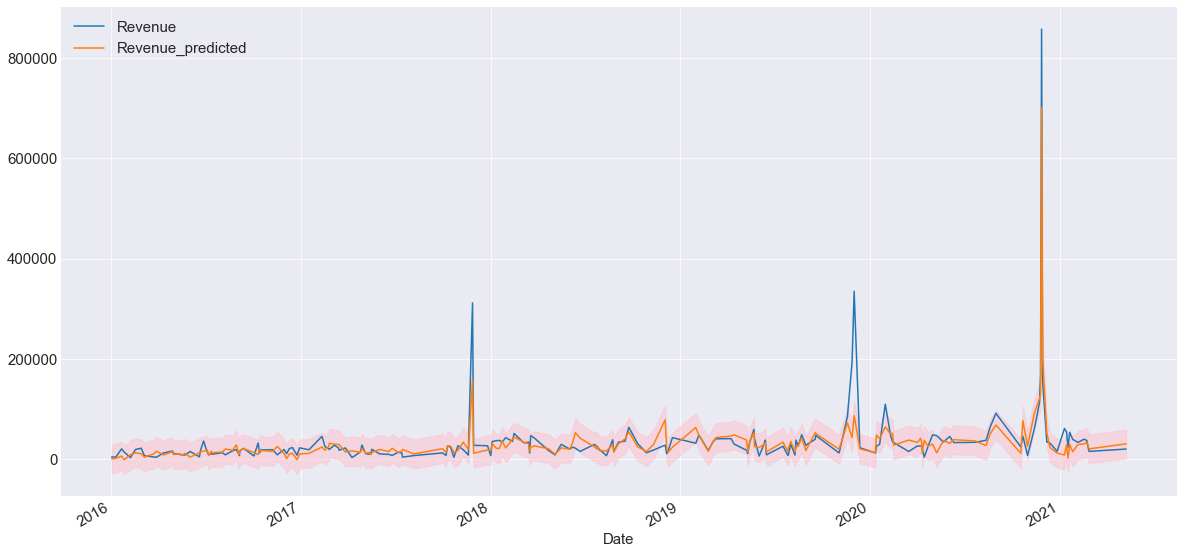

In [34]:
#Let's see the prediction
forecast_ridge_test[['Revenue', 'Revenue_predicted']].plot()
#Get the confidence intervals
confidence_intervals = get_confidence_intervals(forecast_ridge, forecast_ridge_test, 'Revenue', '95%')
plt.fill_between(confidence_intervals.index, confidence_intervals['Revenue_lower'], 
                 confidence_intervals['Revenue_upper'], color= 'pink', alpha= 0.5)

#### Elastic Net Model

In [35]:
#Elastic Net Model
model_elastic_net = ElasticNet(alpha=0.9, l1_ratio=0.3684210526315789)

In [36]:
#Model
model_elastic_net.fit(X_train_scaled, y_train)

#Create the new DataFrame with the Train y values and Train predict values
forecast_elastic_net = predict_model(model_elastic_net, X_train_scaled, y_train)

#Calculate the RMSE and R²
rmse_elastic_net = metric_rmse(forecast_elastic_net, "Revenue")
r2_elastic_net = r2_score(forecast_elastic_net["Revenue"], forecast_elastic_net["Revenue_predicted"])
print(f'Ridge Elastic Net_train: {rmse_elastic_net}')
print(f'R²: {r2_elastic_net}')

Ridge Elastic Net_train: 16820.60225934849
R²: 0.67897523549547


In [37]:
#Test Values
forecast_elastic_net_test = predict_model(model_elastic_net, X_test_scaled, y_test)

#Calculate the RMSE and R²
rmse_elastic_net_test = metric_rmse(forecast_elastic_net_test, "Revenue")
r2_elastic_net_test = r2_score(forecast_elastic_net_test["Revenue"], forecast_elastic_net_test["Revenue_predicted"])
print(f'Ridge Elastic Net_test: {rmse_elastic_net_test}')
print(f'R²: {r2_elastic_net_test}')

Ridge Elastic Net_test: 35919.17638624443
R²: 0.7422214830568524


#### K-Neighbors Model

In [60]:
#K-Neighbors Model
model_kn = KNeighborsRegressor(algorithm='kd_tree', n_neighbors=10, weights='distance')

In [61]:
#Model
model_kn.fit(X_train_scaled, y_train)

#Create the new DataFrame with the Train y values and Train predict values
forecast_kn = predict_model(model_kn, X_train_scaled, y_train)

#Calculate the RMSE and R²
rmse_kn = metric_rmse(forecast_kn, "Revenue")
r2_kn = r2_score(forecast_kn["Revenue"], forecast_kn["Revenue_predicted"])
print(f'K-Neighbors_train: {rmse_kn}')
print(f'R²: {r2_kn}')

K-Neighbors_train: 0.0
R²: 1.0


In [ ]:
#Overfitting?

In [40]:
forecasts_kn = cross_val_time_series(model_kn, data_small, lags, 10, scaler= 'robust')

bias_kn = time_series_score(forecasts_kn, 'Revenue', 'bias')
variance_kn = time_series_score(forecasts_kn, 'Revenue', 'variance')
rmse_kn = time_series_score(forecasts_kn, 'Revenue', 'rmse')

error_kn = pd.DataFrame([rmse_kn, bias_kn, variance_kn], index= ['RMSE', 'Bias', 'Variance']).T

In [41]:
#Total Error
error_kn['Total Error'] = pd.DataFrame(error_kn['Bias'] ** 2 + error_kn['Variance'])

In [42]:
error_kn

RMSE         Bias  Variance   Total Error
0  54177.365839  2830.074081  0.449455  8.009320e+06
1  22367.437858  1062.563893  0.625972  1.129043e+06
2  28420.439242  1285.969271  0.734848  1.653718e+06
3  46799.217478  2625.693085  0.565958  6.894265e+06
4  14924.865950   429.720041  0.737460  1.846601e+05
5  17145.983295   205.990733  0.807908  4.243299e+04
6  15074.429197  -146.079953  0.765343  2.134012e+04
7  29653.323264   430.489600  0.679080  1.853220e+05
8  21026.803454  1234.403828  0.709976  1.523754e+06
9  33476.364929   164.180788  0.611680  2.695594e+04

<AxesSubplot:>

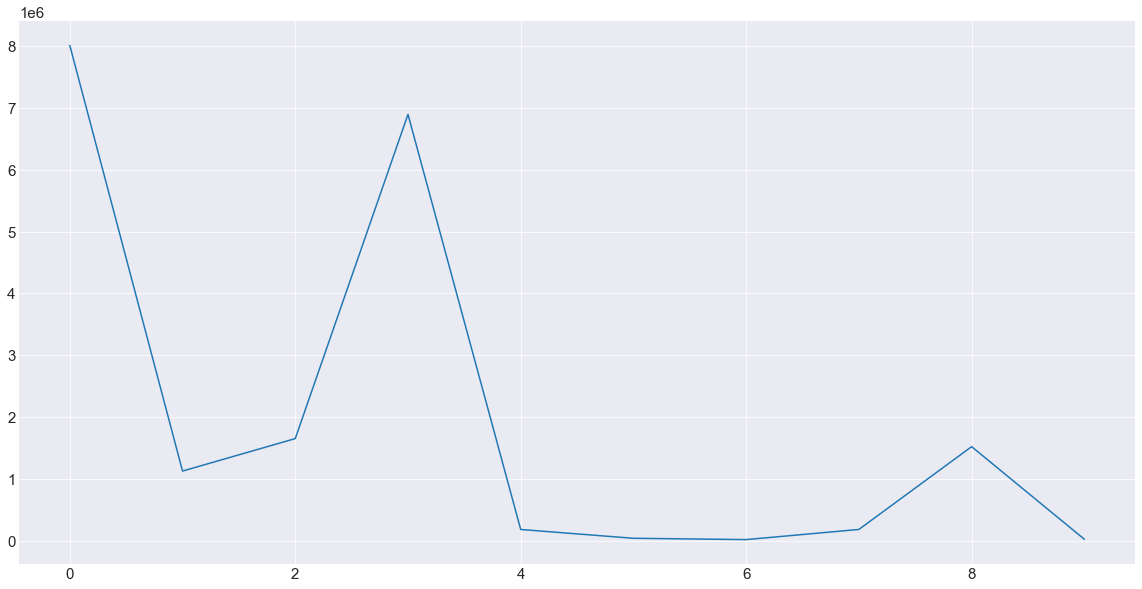

In [63]:
error_kn['Total Error'].plot()

In [82]:
#Model
model_kn.fit(X_train_scaled, y_train)

#Test Values
forecast_kn_test = predict_model(model_kn, X_test_scaled, y_test)

#Calculate the RMSE and R²
rmse_kn_test = metric_rmse(forecast_kn_test, "Revenue")
r2_kn_test = r2_score(forecast_kn_test["Revenue"], forecast_kn_test["Revenue_predicted"])
print(f'K-Neighbors_test: {rmse_kn_test}')
print(f'R²: {r2_kn_test}')

K-Neighbors_test: 57961.23501768812
R²: 0.3287732708327781


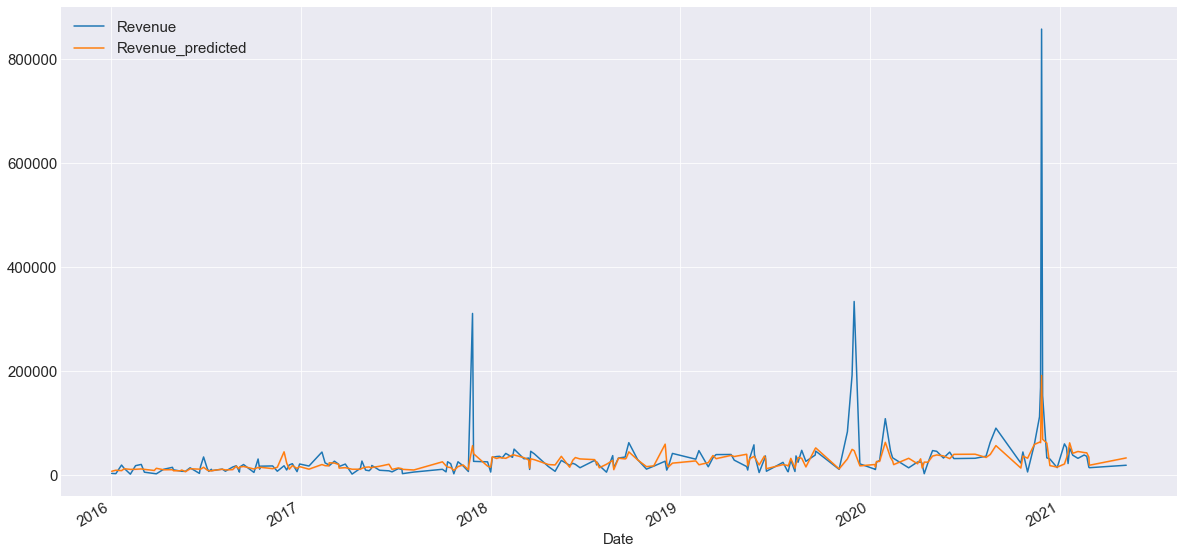

In [64]:
#Let's see the prediction
forecast_kn_test[['Revenue', 'Revenue_predicted']].plot()
#Get the confidence intervals
confidence_intervals = get_confidence_intervals(forecast_kn, forecast_kn_test, 'Revenue', '95%')
plt.fill_between(confidence_intervals.index, confidence_intervals['Revenue_lower'], 
                 confidence_intervals['Revenue_upper'], color= 'pink', alpha= 0.5)

#### Random Forest Model

In [301]:
#Random Fores Model
model_random = RandomForestRegressor(max_depth=40)

In [302]:
#Model
model_random.fit(X_train_scaled, y_train)

#Create the new DataFrame with the Train y values and Train predict values
forecast_random = predict_model(model_random, X_train_scaled, y_train)

#Calculate the RMSE and R²
rmse_random = metric_rmse(forecast_random, "Revenue")
r2_random = r2_score(forecast_random["Revenue"], forecast_random["Revenue_predicted"])
print(f'Random Forest_train: {rmse_random}')
print(f'R²: {r2_random}')

Random Forest_train: 10292.028878448988
R²: 0.9571382650185124


In [307]:
#Test Values
forecast_random_test = predict_model(model_random, X_test_scaled, y_test)

#Calculate the RMSE and R²
rmse_random_test = metric_rmse(forecast_random_test, "Revenue")
r2_random_test = r2_score(forecast_random_test["Revenue"], forecast_random_test["Revenue_predicted"])
print(f'Random Forest_test: {rmse_random_test}')
print(f'R²: {r2_random_test}')

Random Forest_test: 24230.48015047871
R²: 0.09059919988384357


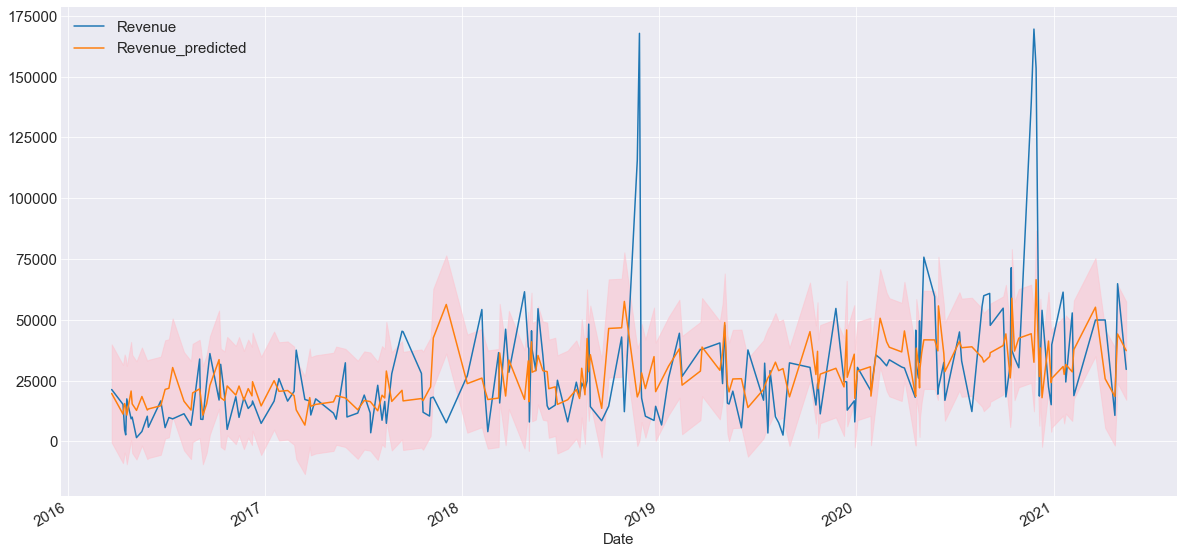

In [308]:
#Let's see the prediction
forecast_random_test[['Revenue', 'Revenue_predicted']].plot()
#Get the confidence intervals
confidence_intervals = get_confidence_intervals(forecast_random, forecast_random_test, 'Revenue', '95%')
plt.fill_between(confidence_intervals.index, confidence_intervals['Revenue_lower'], 
                 confidence_intervals['Revenue_upper'], color= 'pink', alpha= 0.5)

#### Gradient Boost

In [69]:
#Gradient Boost
model_boost = GradientBoostingRegressor(max_features='auto')

In [70]:
#Model
model_boost.fit(X_train_scaled, y_train)

#Create the new DataFrame with the Train y values and Train predict values
forecast_boost = predict_model(model_boost, X_train_scaled, y_train)

#Calculate the RMSE and R²
rmse_boost = metric_rmse(forecast_boost, "Revenue")
r2_boost = r2_score(forecast_boost["Revenue"], forecast_boost["Revenue_predicted"])
print(f'Gradient Boost_train: {rmse_boost}')
print(f'R²: {r2_boost}')

Gradient Boost_train: 8435.812013737082
R²: 0.9192561898113867


In [71]:
#Test Values
forecast_boost_test = predict_model(model_boost, X_test_scaled, y_test)

#Calculate the RMSE and R²
rmse_boost_test = metric_rmse(forecast_boost_test, "Revenue")
r2_boost_test = r2_score(forecast_boost_test["Revenue"], forecast_boost_test["Revenue_predicted"])
print(f'Gradient Boost_test: {rmse_boost_test}')
print(f'R²: {r2_boost_test}')

Gradient Boost_test: 33586.51959809855
R²: 0.7746155310784273


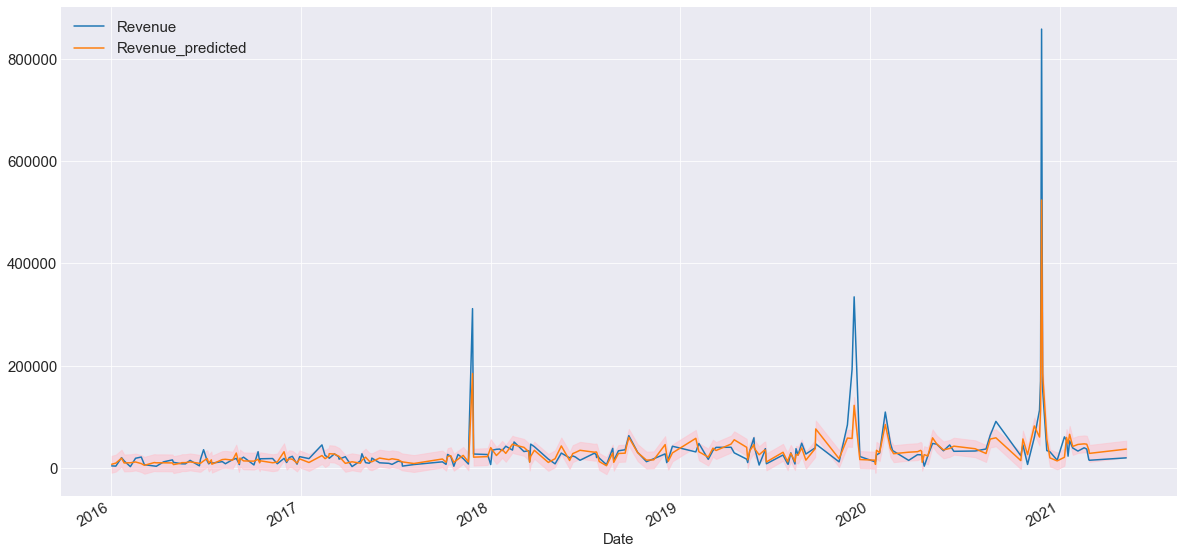

In [72]:
#Let's see the prediction
forecast_boost_test[['Revenue', 'Revenue_predicted']].plot()
#Get the confidence intervals
confidence_intervals = get_confidence_intervals(forecast_boost, forecast_boost_test, 'Revenue', '95%')
plt.fill_between(confidence_intervals.index, confidence_intervals['Revenue_lower'], 
                 confidence_intervals['Revenue_upper'], color= 'pink', alpha= 0.5)

#### XGB

In [73]:
#XGB
model_xgb = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=13,
              min_child_weight=1, missing=np.nan, monotone_constraints='()',
              n_estimators=1000, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [80]:
#Model
model_xgb.fit(X_train_scaled, y_train)

#Create the new DataFrame with the Train y values and Train predict values
forecast_xgb = predict_model(model_xgb, X_train_scaled, y_train)

#Calculate the RMSE and R²
rmse_xgb = metric_rmse(forecast_xgb, "Revenue")
r2_xgb = r2_score(forecast_xgb["Revenue"], forecast_xgb["Revenue_predicted"])
print(f'XGB_train: {rmse_xgb}')
print(f'R²: {r2_xgb}')

XGB_train: 0.0038001915801838134
R²: 0.9999999999999836


In [ ]:
#Overfitting?

In [75]:
forecasts_xgb = cross_val_time_series(model_xgb, data_small, lags, 10, scaler= 'robust')

bias_xgb = time_series_score(forecasts_xgb, 'Revenue', 'bias')
variance_xgb = time_series_score(forecasts_xgb, 'Revenue', 'variance')
rmse_xgb = time_series_score(forecasts_xgb, 'Revenue', 'rmse')

error_xgb = pd.DataFrame([rmse_xgb, bias_xgb, variance_xgb], index= ['RMSE', 'Bias', 'Variance']).T

In [76]:
#Total Error
error_xgb['Total Error'] = pd.DataFrame(error_xgb['Bias'] ** 2 + error_xgb['Variance'])

In [77]:
error_xgb

RMSE         Bias  Variance   Total Error
0  23757.879136 -2518.133685  0.744409  6.340998e+06
1  31411.396417  2146.013128  0.723188  4.605373e+06
2  21914.148002 -1435.760084  0.843634  2.061408e+06
3  53838.237165  4706.125384  0.659104  2.214762e+07
4  12093.203728    -7.116294  0.835837  5.147748e+01
5  15271.112785  1110.458804  0.768639  1.233120e+06
6  15401.898494  1767.715458  0.665280  3.124819e+06
7  45815.272325  -661.183241  0.656919  4.371639e+05
8  41485.339856 -4620.446098  0.441299  2.134852e+07
9  32964.076389  2680.086905  0.700906  7.182867e+06

<AxesSubplot:>

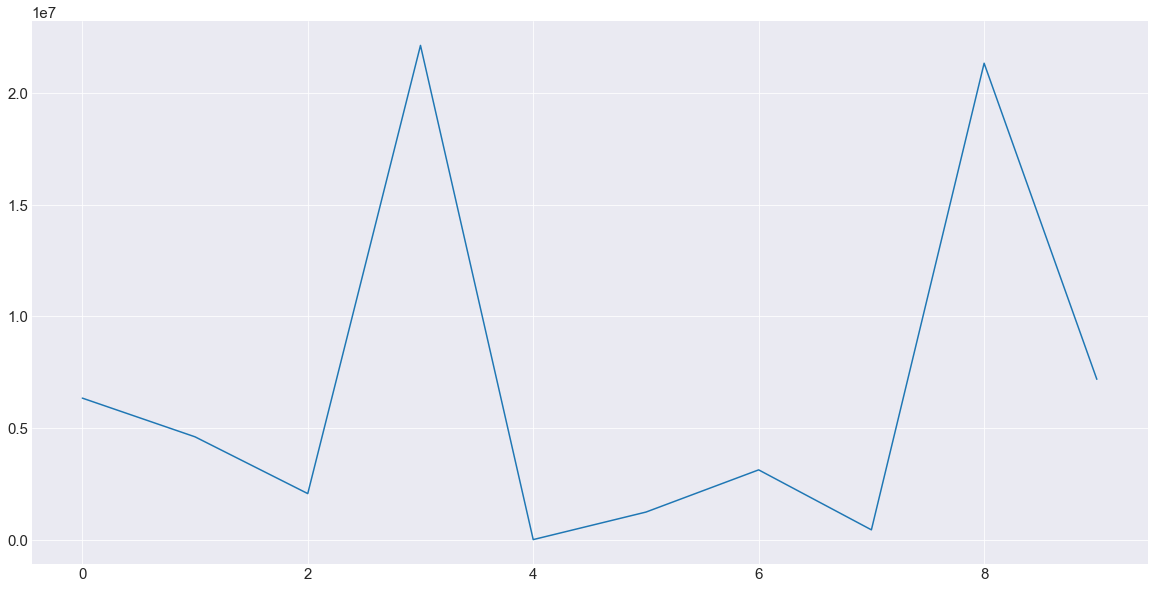

In [78]:
error_xgb['Total Error'].plot()

In [83]:
#Model
model_xgb.fit(X_train_scaled, y_train)

#Test Values
forecast_xgb_test = predict_model(model_xgb, X_test_scaled, y_test)

#Calculate the RMSE and R²
rmse_xgb_test = metric_rmse(forecast_xgb_test, "Revenue")
r2_xgb_test = r2_score(forecast_xgb_test["Revenue"], forecast_xgb_test["Revenue_predicted"])
print(f'XGB_test: {rmse_xgb_test}')
print(f'R²: {r2_xgb_test}')

XGB_test: 34761.65358455191
R²: 0.7585679980206843


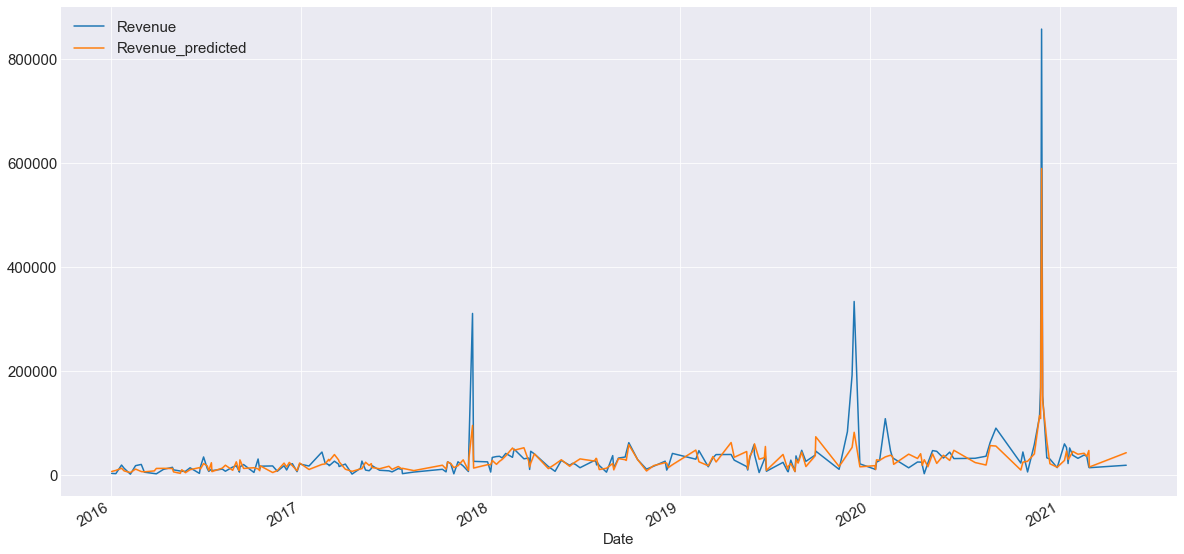

In [84]:
#Let's see the prediction
forecast_xgb_test[['Revenue', 'Revenue_predicted']].plot()
#Get the confidence intervals
confidence_intervals = get_confidence_intervals(forecast_xgb, forecast_xgb_test, 'Revenue', '95%')
plt.fill_between(confidence_intervals.index, confidence_intervals['Revenue_lower'], 
                 confidence_intervals['Revenue_upper'], color= 'pink', alpha= 0.5)

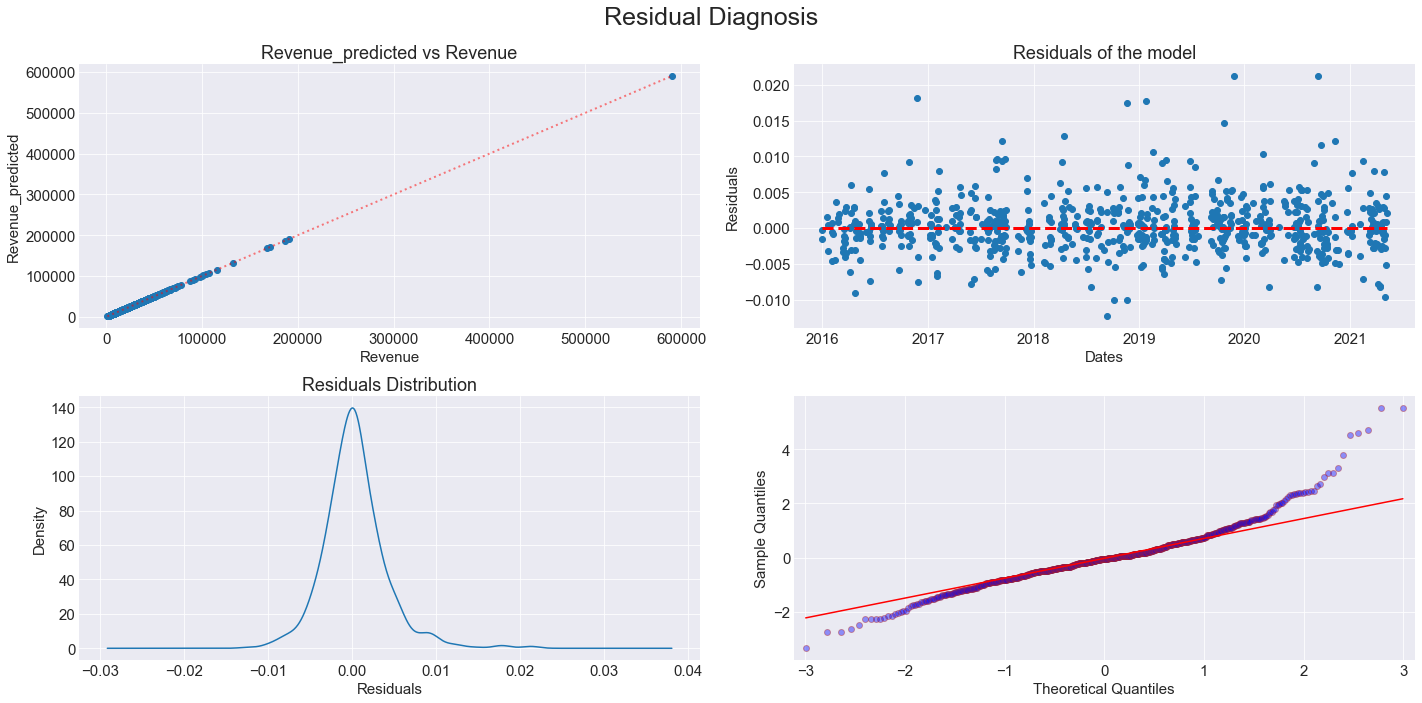

In [85]:
#Residual Analysis
draw_residuals_diagnosis(forecast_xgb, ['Revenue', 'Revenue_predicted', 'Residuals'])

#### LGBM

In [86]:
#LGBM
model_lgbm = LGBMRegressor(n_estimators=50)

In [87]:
#Model
model_lgbm.fit(X_train_scaled, y_train)

#Create the new DataFrame with the Train y values and Train predict values
forecast_lgbm = predict_model(model_lgbm, X_train_scaled, y_train)

#Calculate the RMSE and R²
rmse_lgbm = metric_rmse(forecast_lgbm, "Revenue")
r2_lgbm = r2_score(forecast_lgbm["Revenue"], forecast_lgbm["Revenue_predicted"])
print(f'LGBM_train: {rmse_lgbm}')
print(f'R²: {r2_lgbm}')

LGBM_train: 18327.00947729469
R²: 0.6189002518755717


In [88]:
#Test Values
forecast_lgbm_test = predict_model(model_lgbm, X_test_scaled, y_test)

#Calculate the RMSE and R²
rmse_lgbm_test = metric_rmse(forecast_lgbm_test, "Revenue")
r2_lgbm_test = r2_score(forecast_lgbm_test["Revenue"], forecast_lgbm_test["Revenue_predicted"])
print(f'LGBM_test: {rmse_lgbm_test}')
print(f'R²: {r2_lgbm_test}')

LGBM_test: 57043.87212273375
R²: 0.3498523812073646


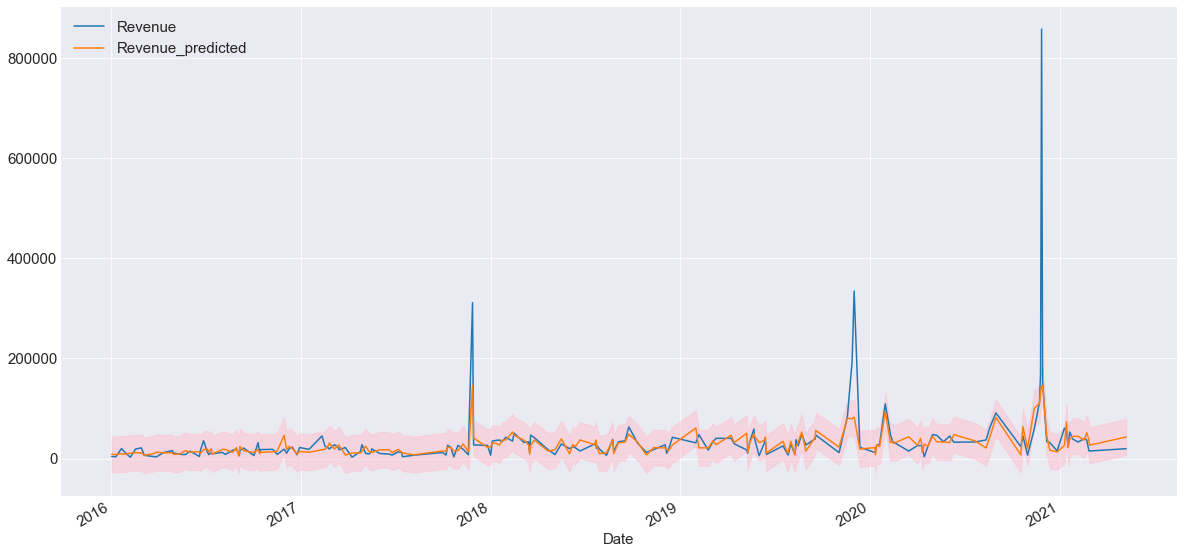

In [89]:
#Let's see the prediction
forecast_lgbm_test[['Revenue', 'Revenue_predicted']].plot()
#Get the confidence intervals
confidence_intervals = get_confidence_intervals(forecast_lgbm, forecast_lgbm_test, 'Revenue', '95%')
plt.fill_between(confidence_intervals.index, confidence_intervals['Revenue_lower'], 
                 confidence_intervals['Revenue_upper'], color= 'pink', alpha= 0.5)

### Models Comparison 

In [90]:
rmse_lgbm
rmse_xgb
rmse_random
rmse_boost
rmse_kn
rmse_elastic_net
rmse_ridge

14720.596503067534

In [194]:
rmse_models = {
    'Ridge': [rmse_ridge, rmse_ridge_test, r2_ridge],
    'Elastic Net': [rmse_elastic_net, rmse_elastic_net_test, r2_elastic_net],
    'K-Neighbors': [rmse_kn, rmse_kn_test, r2_kn],
    'Random Forest': [rmse_random, rmse_random_test, r2_random],
    'Gradient Boost': [rmse_boost, rmse_boost_test, r2_boost],
    'XGB': [rmse_xgb, rmse_xgb_test, r2_xgb],
    'LGBM': [rmse_lgbm, rmse_lgbm_test, r2_lgbm]
}

In [195]:
model_comparison = pd.DataFrame(rmse_models, index= ['RMSE', 'RMSE_Test', 'R2']).T

In [196]:
model_comparison

RMSE     RMSE_Test        R2
Ridge           14720.596503  29436.516417  0.754130
Elastic Net     16820.602259  35919.176386  0.678975
K-Neighbors         0.000000  57961.235018  1.000000
Random Forest    8009.366720  39669.676748  0.927213
Gradient Boost   8435.812014  33586.519598  0.919256
XGB                 0.003800  34761.653585  1.000000
LGBM            18327.009477  57043.872123  0.618900

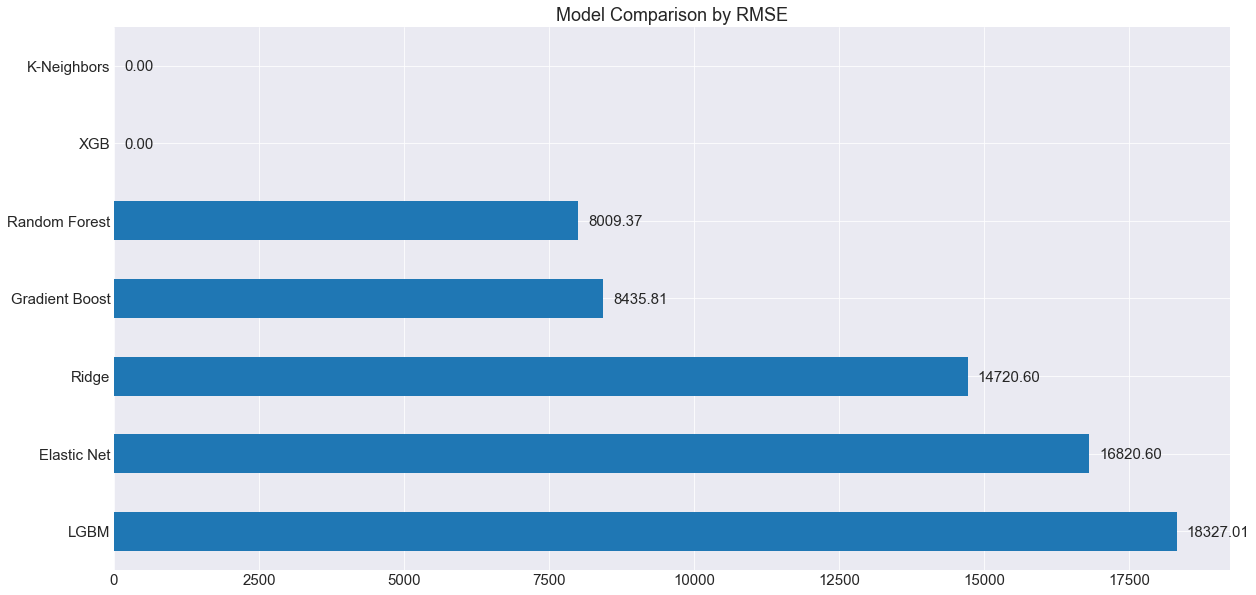

In [245]:
draw_barh(model_comparison, 'RMSE')

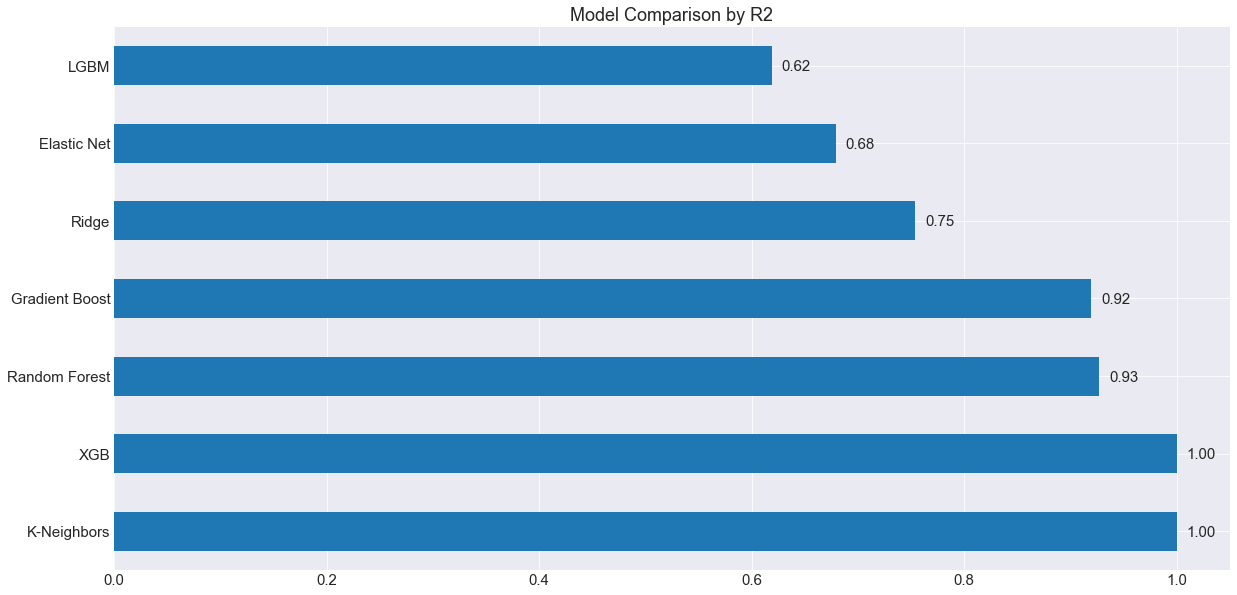

In [247]:
draw_barh(model_comparison, 'R2')

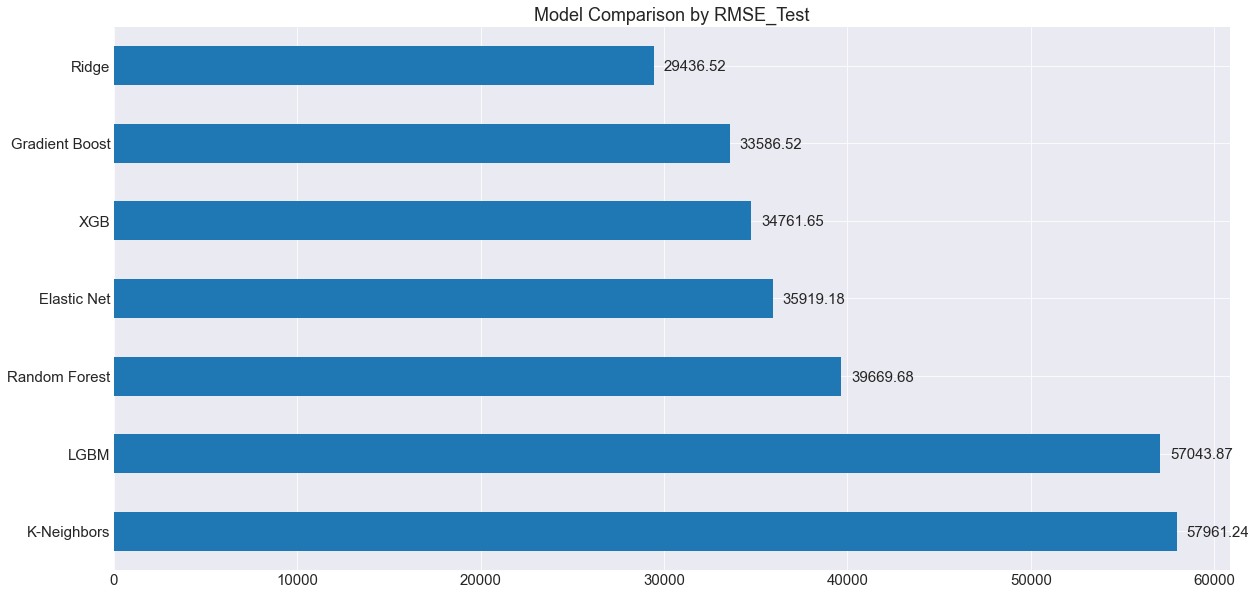

In [246]:
draw_barh(model_comparison, 'RMSE_Test')

In [ ]:
#Finally, let's predict T+1 using using the full set
#NO HAY QUE REVISAR TODOS LOS MODELOS

### Data Validation and Data Forecasting
We are going to concatenate the current Time Series Data with a longer file with more reals values and use this bigger model for checking how good or bad is woking the model

Moreover, we are going to create the last Data Set for Forecasting purposes. The idea is forecasting up to 7 days in advance.
We are going to add to the Data Validation Data Set a new one with the lagged, seasonal and exogenous features in order to try to estimate what will be the sales.

Some important assumptions. We need to trained 14 models for each forecast:
* model_trained_1: This will forecast T+1
* model_trained_2: This will forecast T+2
* And so on...

In [220]:
data_full = pd.concat([data_small, data_validation])

#All lagged features for forecasting - Period 7 days
lags = [1, 2, 3, 4, 5, 6, 7, 364]
data_full_forecast = prepare_data_forecast(data_full, 'Revenue', lags, 7)
data_full_forecast

Year_2021  Month_6  Day_14  Day_15  Day_16  Day_17  Day_18  \
2021-06-14          1        1       1       0       0       0       0   
2021-06-15          1        1       0       1       0       0       0   
2021-06-16          1        1       0       0       1       0       0   
2021-06-17          1        1       0       0       0       1       0   
2021-06-18          1        1       0       0       0       0       1   
2021-06-19          1        1       0       0       0       0       0   
2021-06-20          1        1       0       0       0       0       0   

            Day_19  Day_20  Black_Friday  Easter  Covid   Rev-364     Rev-7  \
2021-06-14       0       0             0       0      0  48735.52  44815.98   
2021-06-15       0       0             0       0      0  33745.33  21760.66   
2021-06-16       0       0             0       0      0  16913.21  74427.57   
2021-06-17       0       0             0       0      0  29435.16  47467.41   
2021-06-18       0       0             0       0      0  32517.81  38282.13   
2021-06-19       1       0             0       0      0  41321.59  44696.72   
2021-06-20       0       1             0       0      0  45465.30  55890.10   

               Rev-6     Rev-5     Rev-4     Rev-3     Rev-2     Rev-1  
2021-06-14  46716.35  47649.11  66938.46  53022.54  25079.69  27413.63  
2021-06-15  44815.98  46716.35  47649.11  66938.46  53022.54  25079.69  
2021-06-16  21760.66  44815.98  46716.35  47649.11  66938.46  53022.54  
2021-06-17  74427.57  21760.66  44815.98  46716.35  47649.11  66938.46  
2021-06-18  47467.41  74427.57  21760.66  44815.98  46716.35  47649.11  
2021-06-19  38282.13  47467.41  74427.57  21760.66  44815.98  46716.35  
2021-06-20  44696.72  38282.13  47467.41  74427.57  21760.66  44815.98

In [28]:
forecast_gradient = forecast_predict(data_full, 'Revenue', lags, 30, 'gradient', 'robust', '95%')
forecast_gradient

Revenue_forecast  Revenue_lower  Revenue_upper
2021-06-14      38768.629115   20086.629513   57450.628717
2021-06-15      44662.305198   27527.460937   61797.149459
2021-06-16      34962.987523   15358.086463   54567.888583
2021-06-17      45773.163165   26287.350344   65258.975985
2021-06-18      30144.690852   10964.259296   49325.122409
2021-06-19      39611.395077   16642.682588   62580.107565
2021-06-20      37006.857117   15796.531339   58217.182896
2021-06-21      38446.030788   19816.043548   57076.018028
2021-06-22      46849.909300   27471.165002   66228.653599
2021-06-23      42086.676994   23115.403401   61057.950588
2021-06-24      38967.948389   15938.867588   61997.029191
2021-06-25      35184.896905   13685.424201   56684.369609
2021-06-26      42109.476203   18618.338507   65600.613898
2021-06-27      35909.850235   13255.714939   58563.985532
2021-06-28      60007.264656   40192.371891   79822.157421
2021-06-29      34339.396697   13390.971523   55287.821871
2021-06-30      47155.367370   28563.116846   65747.617894
2021-07-01      35055.713259   13975.837631   56135.588887
2021-07-02      34967.342848   13310.096208   56624.589487
2021-07-03      41027.740952   18431.912241   63623.569662
2021-07-04      47672.749027   24916.602607   70428.895447
2021-07-05      61771.040817   41872.117066   81669.964567
2021-07-06      39361.847837   17858.669004   60865.026671
2021-07-07      35564.023849   16253.719799   54874.327898
2021-07-08      39985.606640   19708.217324   60262.995956
2021-07-09      34038.267848   13012.097020   55064.438675
2021-07-10      32086.832323   12310.026668   51863.637978
2021-07-11      39997.596911   20542.937261   59452.256561
2021-07-12      44925.991948   25613.107476   64238.876420
2021-07-13      57976.184523   37284.515180   78667.853865

In [29]:
data_full_forecast_gradient = data_full[['Revenue']]
data_full_forecast_gradient = pd.concat([data_full_forecast_gradient, forecast_gradient])

In [30]:
data_full_forecast_gradient['Revenue_forecast'].loc[data_full.index[-1]] = \
data_full_forecast_gradient.loc[data_full.index[-1]]['Revenue']

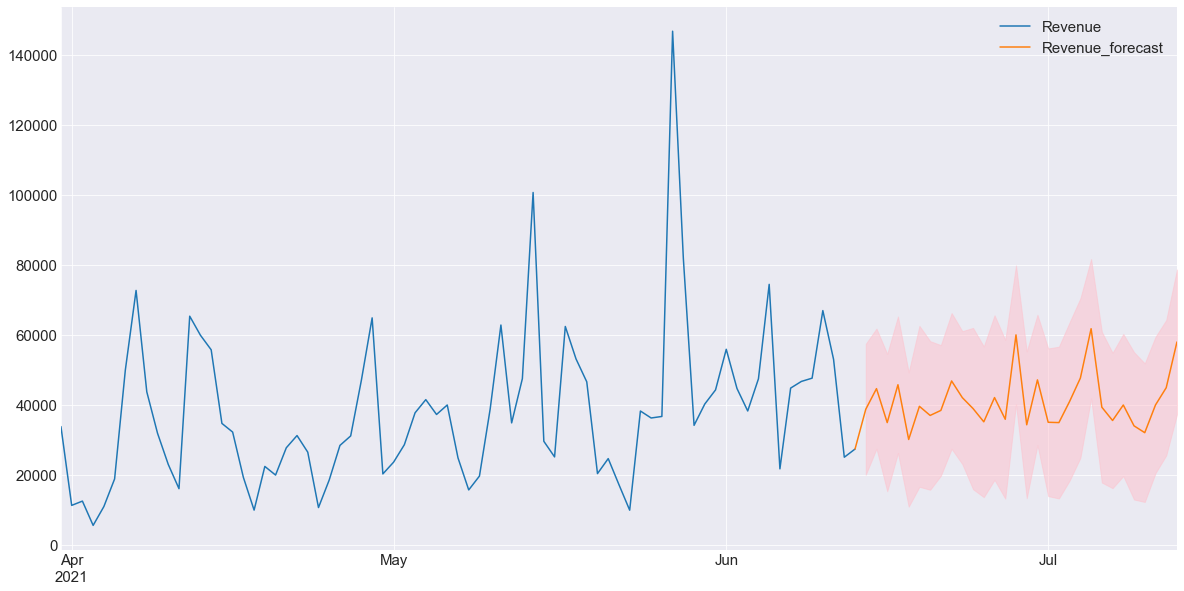

In [31]:
data_full_forecast_gradient.loc['2021-03-31':][['Revenue', 'Revenue_forecast']].plot()
plt.fill_between(data_full_forecast_gradient.index, data_full_forecast_gradient['Revenue_lower'],
                 data_full_forecast_gradient['Revenue_upper'], color='pink', alpha=0.5)

In [32]:
forecast_xgb = forecast_predict(data_full, 'Revenue', lags, 30, 'xgb', 'robust', '95%')
forecast_xgb

Revenue_forecast  Revenue_lower  Revenue_upper
2021-06-14      53103.421875   53103.414062   53103.429688
2021-06-15      47325.089844   47325.082031   47325.097656
2021-06-16      33630.308594   33630.292969   33630.324219
2021-06-17      49961.859375   49961.847656   49961.871094
2021-06-18      37871.230469   37871.218750   37871.242188
2021-06-19      43827.214844   43827.207031   43827.222656
2021-06-20      44172.328125   44172.316406   44172.339844
2021-06-21      38280.394531   38280.386719   38280.402344
2021-06-22      43276.378906   43276.363281   43276.394531
2021-06-23      38548.808594   38548.800781   38548.816406
2021-06-24      52634.921875   52634.906250   52634.937500
2021-06-25      28298.761719   28298.746094   28298.777344
2021-06-26      40036.738281   40036.722656   40036.753906
2021-06-27      48364.218750   48364.210938   48364.226562
2021-06-28      39468.046875   39468.039062   39468.054688
2021-06-29      35018.468750   35018.460938   35018.476562
2021-06-30      52403.906250   52403.898438   52403.914062
2021-07-01      28304.474609   28304.462891   28304.486328
2021-07-02      66699.281250   66699.273438   66699.289062
2021-07-03      55479.214844   55479.203125   55479.226562
2021-07-04      30311.216797   30311.208984   30311.224609
2021-07-05      51372.613281   51372.605469   51372.621094
2021-07-06      54406.097656   54406.085938   54406.109375
2021-07-07      41605.941406   41605.933594   41605.949219
2021-07-08      38626.433594   38626.425781   38626.441406
2021-07-09      56481.636719   56481.628906   56481.644531
2021-07-10      31101.351562   31101.343750   31101.359375
2021-07-11      40282.492188   40282.484375   40282.500000
2021-07-12      43080.917969   43080.902344   43080.933594
2021-07-13      46183.324219   46183.312500   46183.335938

In [33]:
data_full_forecast_xgb = data_full[['Revenue']]
data_full_forecast_xgb = pd.concat([data_full_forecast_xgb, forecast_xgb])

In [34]:
data_full_forecast_xgb['Revenue_forecast'].loc[data_full.index[-1]] = \
data_full_forecast_xgb.loc[data_full.index[-1]]['Revenue']

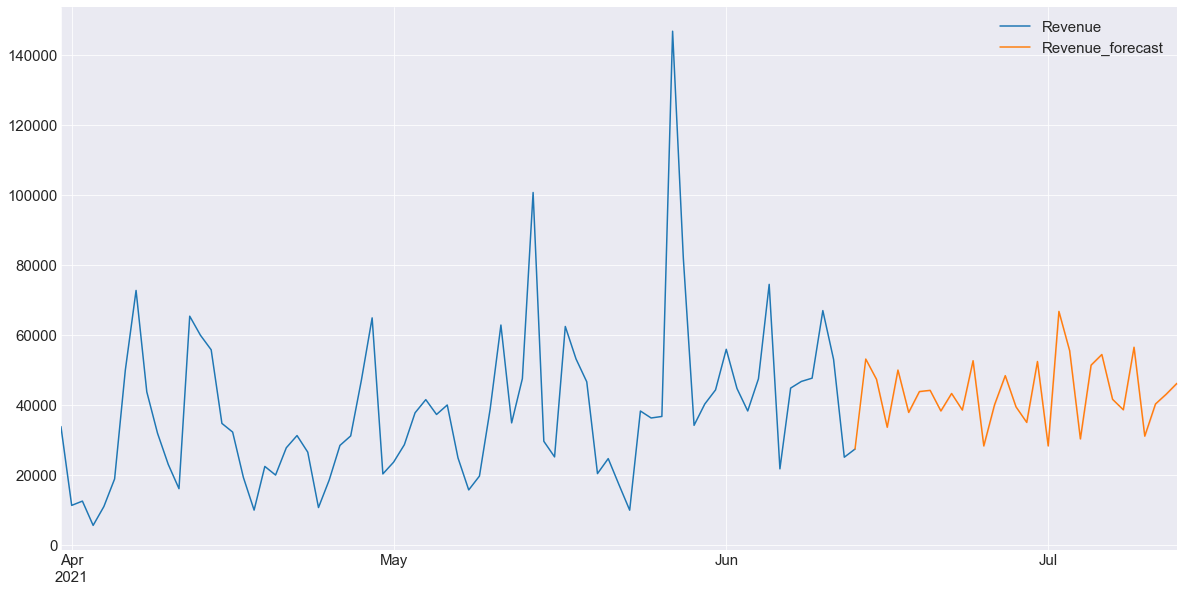

In [35]:
data_full_forecast_xgb.loc['2021-03-31':][['Revenue', 'Revenue_forecast']].plot()
plt.fill_between(data_full_forecast_xgb.index, data_full_forecast_xgb['Revenue_lower'],
                 data_full_forecast_xgb['Revenue_upper'], color='pink', alpha=0.5)

## Alternative Models 

### Prophet 

In [160]:
#Prophet requires a specific data format
data_prophet = pd.DataFrame()
#Prepare the data
data_temp = data.groupby(['Date'])[['Revenue']].sum()
data_temp = data_temp.resample('D', offset='00h00min00sec').sum()
data_temp.reset_index(inplace= True)
#Prophet requiered format
data_prophet['ds'] = data_temp['Date']
data_prophet['y'] = data_temp['Revenue']
data_prophet

ds         y
0    2015-01-01   3244.55
1    2015-01-02   4791.64
2    2015-01-03    534.93
3    2015-01-04    848.43
4    2015-01-05   2393.52
...         ...       ...
2316 2021-05-05  37283.53
2317 2021-05-06  39991.11
2318 2021-05-07  24901.84
2319 2021-05-08  15744.14
2320 2021-05-09  19703.32

[2321 rows x 2 columns]

In [161]:
#Model training
model = Prophet(seasonality_mode='multiplicative', interval_width= 0.95)
model_prophet = model.fit(data_prophet)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [163]:
#Forecast 30 days in advance
future_prophet = model_prophet.make_future_dataframe(freq= 'D', periods= 30)
#Get forecast
forecast_prophet = model_prophet.predict(future_prophet)

In [164]:
#Let's make a copy
forecast_prophet_model = forecast_prophet.copy()
#We are going to check how the model predict with the trained data
forecast_prophet['y'] = data_prophet['y']
forecast_prophet['residuals'] = forecast_prophet['y'] - forecast_prophet['yhat']
forecast_prophet.dropna(inplace= True)

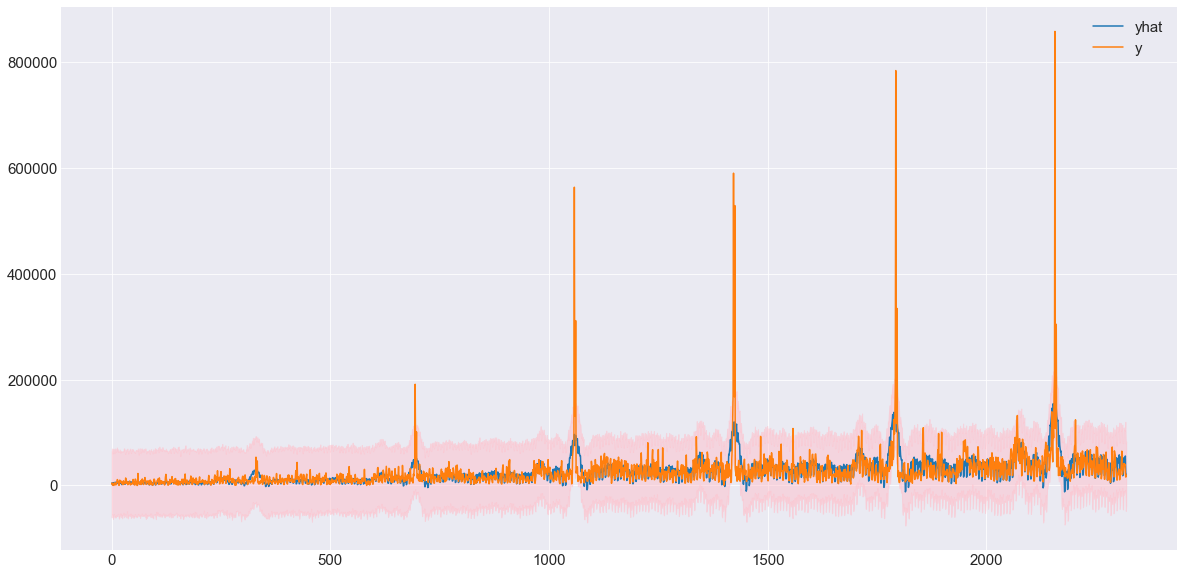

In [165]:
#Show the results and confidence intervals
forecast_prophet[['yhat', 'y']].plot()
plt.fill_between(forecast_prophet.index, forecast_prophet['yhat_lower'],
                 forecast_prophet['yhat_upper'], color='pink', alpha=0.5)

<AxesSubplot:>

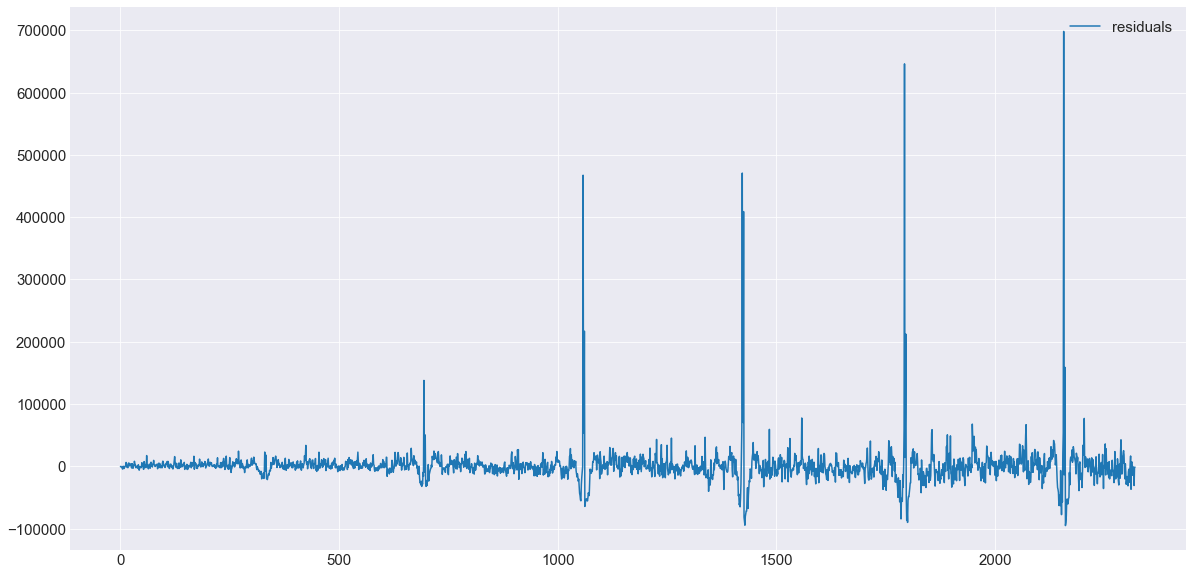

In [166]:
#Check residuals
forecast_prophet[['residuals']].plot()

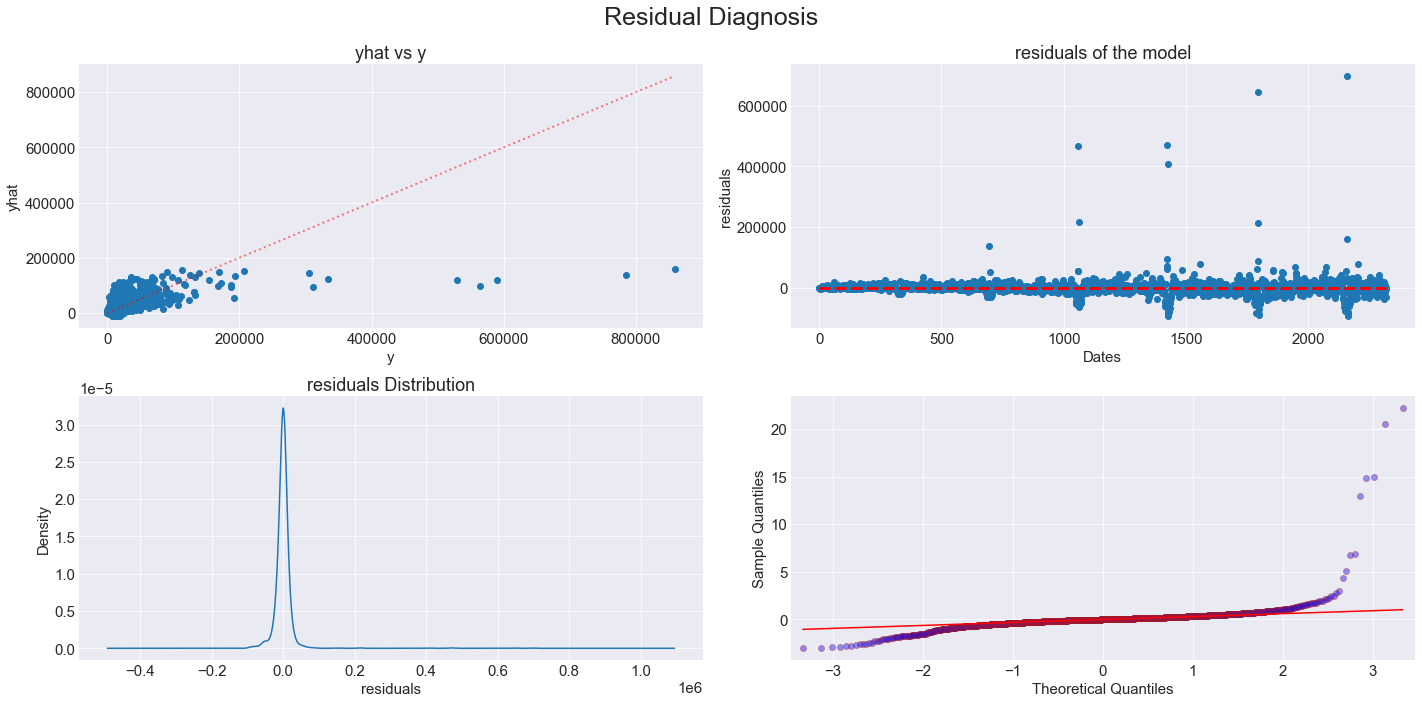

In [167]:
draw_residuals_diagnosis(forecast_prophet, ['y', 'yhat', 'residuals'])

In [168]:
#Check the RMSE
np.sqrt(mean_squared_error(forecast_prophet['y'], forecast_prophet['yhat']))

31429.799938130498

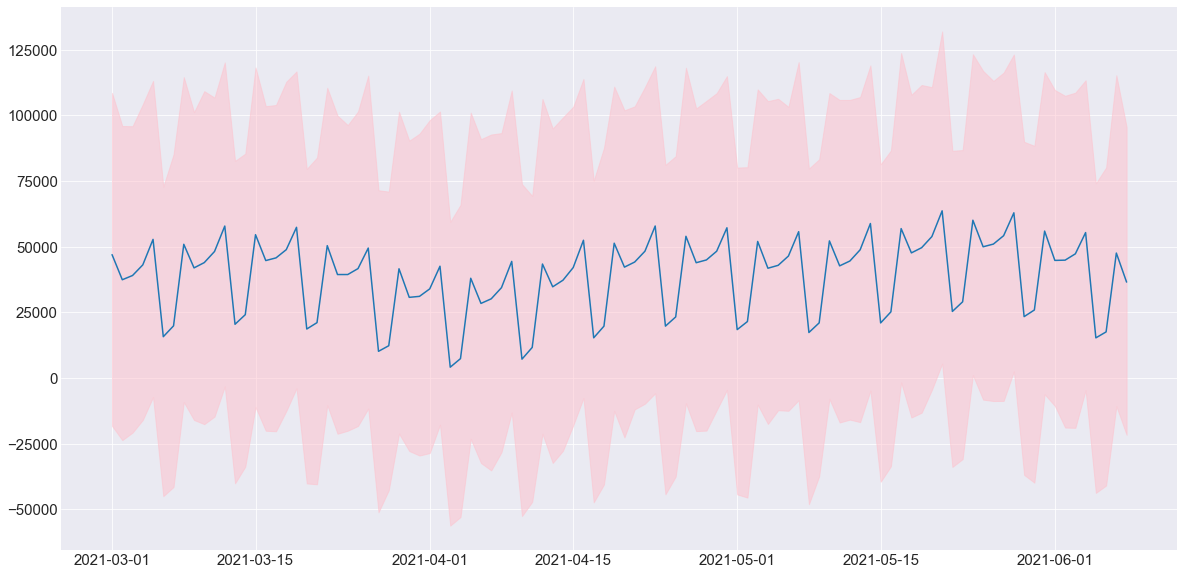

In [192]:
#Forecast
plt.plot(forecast_prophet_model.iloc[-100:]['ds'], forecast_prophet_model.iloc[-100:]['yhat'])
plt.fill_between(forecast_prophet_model.iloc[-100:]['ds'], forecast_prophet_model.iloc[-100:]['yhat_lower'],
                 forecast_prophet_model.iloc[-100:]['yhat_upper'], color='pink', alpha=0.5)

#### Adding Holidays or Seasonality features 

In [193]:
#Holidays
bf_date_list = ['2015-11-27', '2016-11-25', '2017-11-24', '2018-11-23', '2019-11-29', '2020-11-27']
easter_date_list = ['2015-03-30', '2016-03-21', '2017-04-10', '2018-03-26', '2019-04-15', '2020-04-06', '2021-03-29']
covid_date_list = ['2020-03-14']

bf_week_dates = create_date_range(bf_date_list, 'D', 4)
easter_week_dates = create_date_range(easter_date_list, 'D', 8)
covid_week_dates = create_date_range(covid_date_list, 'D', 100)

black_friday = pd.DataFrame({
  'holiday': 'black_friday',
  'ds': [j for i in bf_week_dates for j in i]
})


easter = pd.DataFrame({
  'holiday': 'easter',
  'ds': [j for i in easter_week_dates for j in i]
})

covid = pd.DataFrame({
  'holiday': 'covid',
  'ds': [j for i in covid_week_dates for j in i]
})

holidays = pd.concat((black_friday, easter, covid))
holidays

holiday         ds
0   black_friday 2015-11-27
1   black_friday 2015-11-28
2   black_friday 2015-11-29
3   black_friday 2015-11-30
4   black_friday 2016-11-25
..           ...        ...
95         covid 2020-06-17
96         covid 2020-06-18
97         covid 2020-06-19
98         covid 2020-06-20
99         covid 2020-06-21

[180 rows x 2 columns]

In [194]:
model = Prophet(seasonality_mode='multiplicative', holidays= holidays, interval_width= 0.95, mcmc_samples= 50)
model_prophet = model.fit(data_prophet)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
To run all diagnostics call pystan.check_hmc_diagnostics(fit)


In [195]:
#Forecast 30 days in advance
future_prophet = model_prophet.make_future_dataframe(freq= 'D', periods= 30)
#Get forecast
forecast_prophet = model_prophet.predict(future_prophet)

In [196]:
#Let's make a copy
forecast_prophet_model = forecast_prophet.copy()
#We are going to check how the model predict with the trained data
forecast_prophet['y'] = data_prophet['y']
forecast_prophet['residuals'] = forecast_prophet['y'] - forecast_prophet['yhat']
forecast_prophet.dropna(inplace= True)

In [197]:
#Show the results and confidence intervals
forecast_prophet[['yhat', 'y']].plot()
plt.fill_between(forecast_prophet.index, forecast_prophet['yhat_lower'],
                 forecast_prophet['yhat_upper'], color='pink', alpha=0.5)

In [198]:
#Check residuals
forecast_prophet[['residuals']].plot()

<AxesSubplot:>

In [199]:
draw_residuals_diagnosis(forecast_prophet, ['y', 'yhat', 'residuals'])

In [200]:
#Check the RMSE
np.sqrt(mean_squared_error(forecast_prophet['y'], forecast_prophet['yhat']))

23171.855380031786

In [201]:
#Forecast
plt.plot(forecast_prophet_model.iloc[-100:]['ds'], forecast_prophet_model.iloc[-100:]['yhat'])
plt.fill_between(forecast_prophet_model.iloc[-100:]['ds'], forecast_prophet_model.iloc[-100:]['yhat_lower'],
                 forecast_prophet_model.iloc[-100:]['yhat_upper'], color='pink', alpha=0.5)

In [169]:
tf.keras.layers.Conv1D

tensorflow.python.keras.layers.convolutional.Conv1D

In [55]:
import keras
from keras import models, layers, metrics, losses, optimizers

nn3 = models.Sequential()

nn3.add(layers.Dense(122, input_shape=(61,), activation='relu')) 
nn3.add(layers.Dense(61, activation='relu'))
nn3.add(layers.Dense(30, activation='relu'))
nn3.add(layers.Dense(7, activation='relu'))
nn3.add(layers.Dense(1))

In [279]:
neurona = list()
for i in range(7):
    nn3 = models.Sequential()

    nn3.add(layers.Dense(122, input_shape=(61,), activation='relu')) 
    nn3.add(layers.Dense(61, activation='relu'))
    nn3.add(layers.Dense(30, activation='relu'))
    nn3.add(layers.Dense(7, activation='relu'))
    nn3.add(layers.Dense(1))
    
    nn3.compile(optimizer=optimizers.RMSprop(), loss=losses.mean_absolute_error, metrics=[metrics.mean_absolute_percentage_error]) 
    
    neurona.append(nn3)

In [280]:
neurona

In [56]:
nn3.compile(optimizer=optimizers.RMSprop(), loss=losses.mean_absolute_error, metrics=[metrics.mean_absolute_percentage_error]) 

In [49]:
nn3.compile(optimizer= optimizers.RMSprop(), loss= losses.MeanSquaredError, metrics= [metrics.mean_squared_error]) 

In [93]:
valor = pd.DataFrame(valores, columns= ['Revenue_predicted'], index= data_model.index)
valor

Revenue_predicted
Date                         
2015-12-31        8862.269531
2016-01-01        4156.822266
2016-01-02        1807.709106
2016-01-03        4401.115234
2016-01-04        9655.791992
...                       ...
2021-05-05       27999.052734
2021-05-06       39247.371094
2021-05-07       23887.552734
2021-05-08       13697.226562
2021-05-09       14509.525391

[1957 rows x 1 columns]

In [94]:
valor['Revenue'] = data_model[data_model.columns[-1]]

In [96]:
metric_rmse(valor, 'Revenue')

15513.486034582666

In [97]:
#Train and Test Split
X_train, X_test, y_train, y_test = time_series_train_test_split(data_model, lags)

In [98]:
#Scale the features
X_train_scaled, X_test_scaled = data_normalization(X_train, X_test, 'robust')

In [201]:
#Neurona
nn3.fit(X_train_scaled, y_train, epochs= 100)

Epoch 1/100
25/25 [==============================] - 0s 1ms/step - loss: 972.6217 - mean_absolute_percentage_error: 4.1962
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 924.4034 - mean_absolute_percentage_error: 4.0257
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 902.0911 - mean_absolute_percentage_error: 4.1060
Epoch 4/100
25/25 [==============================] - 0s 1ms/step - loss: 942.8523 - mean_absolute_percentage_error: 4.2447
Epoch 5/100
25/25 [==============================] - 0s 1ms/step - loss: 933.6182 - mean_absolute_percentage_error: 4.2948
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 923.6786 - mean_absolute_percentage_error: 3.9853
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 843.4823 - mean_absolute_percentage_error: 4.1070
Epoch 8/100
25/25 [==============================] - 0s 3ms/step - loss: 906.1896 - mean_absolute_percentage_error: 4.1489
Epoch 9/100
25/2

25/25 [==============================] - 0s 2ms/step - loss: 864.9005 - mean_absolute_percentage_error: 3.8382
Epoch 68/100
25/25 [==============================] - 0s 2ms/step - loss: 915.8898 - mean_absolute_percentage_error: 4.0428
Epoch 69/100
25/25 [==============================] - 0s 2ms/step - loss: 839.3401 - mean_absolute_percentage_error: 3.8945
Epoch 70/100
25/25 [==============================] - 0s 2ms/step - loss: 869.6948 - mean_absolute_percentage_error: 3.9659
Epoch 71/100
25/25 [==============================] - 0s 1ms/step - loss: 834.9156 - mean_absolute_percentage_error: 3.5778
Epoch 72/100
25/25 [==============================] - 0s 2ms/step - loss: 896.1513 - mean_absolute_percentage_error: 4.0027
Epoch 73/100
25/25 [==============================] - 0s 2ms/step - loss: 860.1130 - mean_absolute_percentage_error: 3.8018
Epoch 74/100
25/25 [==============================] - 0s 2ms/step - loss: 889.8039 - mean_absolute_percentage_error: 3.9807
Epoch 75/100
25/25 [=

In [202]:
y_predict_train = nn3.predict(X_train_scaled)
y_pred = pd.DataFrame(y_predict_train, index= y_train.index, columns= [f'{y_train.name}_predicted'])

In [203]:
#Let's predict this model with Train Data
#y_predict_train = nn3.predict(X_train_scaled)
#y_predict_train = pd.Series(y_pred, index= y_train.index)
#y_predict_train = y_predict_train.rename(f'{y_train.name}_predicted')
#Create the new DataFrame with the Train y values and Train predict values
forecast_train = pd.concat([y_train.to_frame(), y_pred], axis= 1)

In [204]:
forecast_train

Revenue  Revenue_predicted
Date                                   
2015-12-31   7688.27        7144.084473
2016-01-01   6785.55        6016.229004
2016-01-02   4017.26        3749.145020
2016-01-03   2398.62        1919.197876
2016-01-14   8204.08        7890.136230
...              ...                ...
2021-04-22  31266.89       30070.408203
2021-04-24  10713.67        9979.351562
2021-05-07  24901.84       23853.675781
2021-05-08  15744.14       15560.715820
2021-05-09  19703.32       19112.736328

[784 rows x 2 columns]

In [205]:
#Calculate the RMSE
metric_rmse(forecast_train, 'Revenue')

2572.908924649102

In [206]:
#Let's see the forecast
forecast_train.plot()

<AxesSubplot:xlabel='Date'>

#### Residual Analysis 

In [207]:
forecast_train['Residuals'] = forecast_train['Revenue'] - forecast_train['Revenue_predicted']

In [208]:
forecast_train[['Residuals']].plot()

<AxesSubplot:xlabel='Date'>

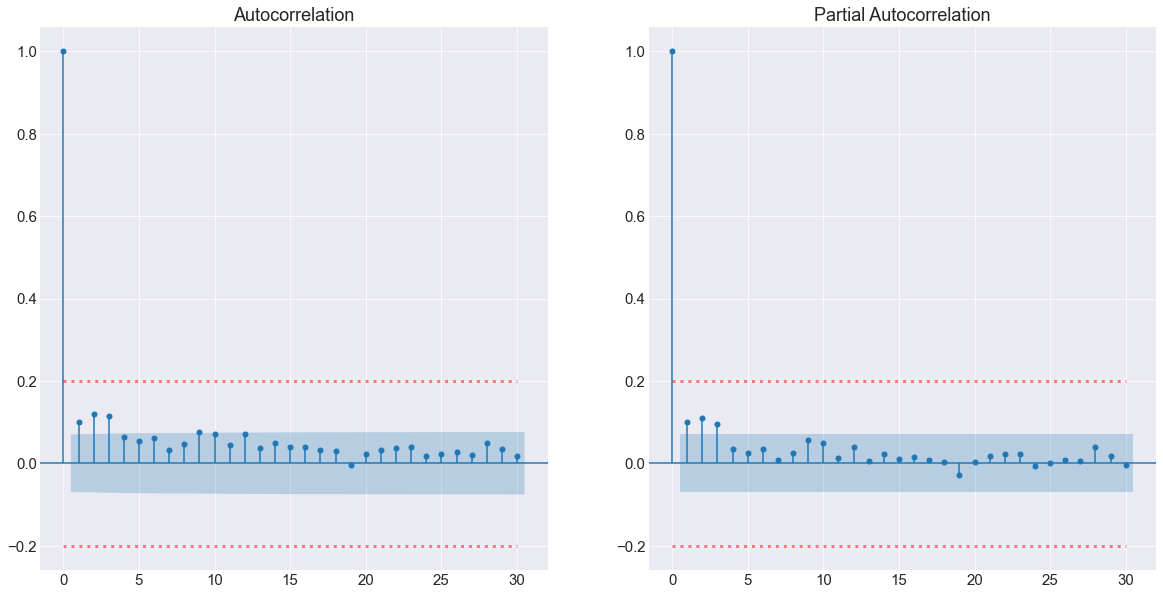

In [209]:
draw_autocorrelation(forecast_train[['Residuals']], 30)

In [210]:
test_adf(forecast_train, 'Residuals')

** Augmented Dickey-Fuller Test **

T-test: -13.0456767629206 < Confidence Interval[1%]: -3.438750669890019 - Result: Stationary
T-test: -13.0456767629206 < Confidence Interval[5%]: -2.8652477937238703 - Result: Stationary
T-test: -13.0456767629206 < Confidence Interval[10%]: -2.56874438754281 - Result: Stationary

P-Value: 2.1943699577675943e-24 < 0.05 - Result: Stationary


In [211]:
#R²
r2_score(forecast_train['Revenue'], forecast_train['Revenue_predicted'])

0.9953482424785485

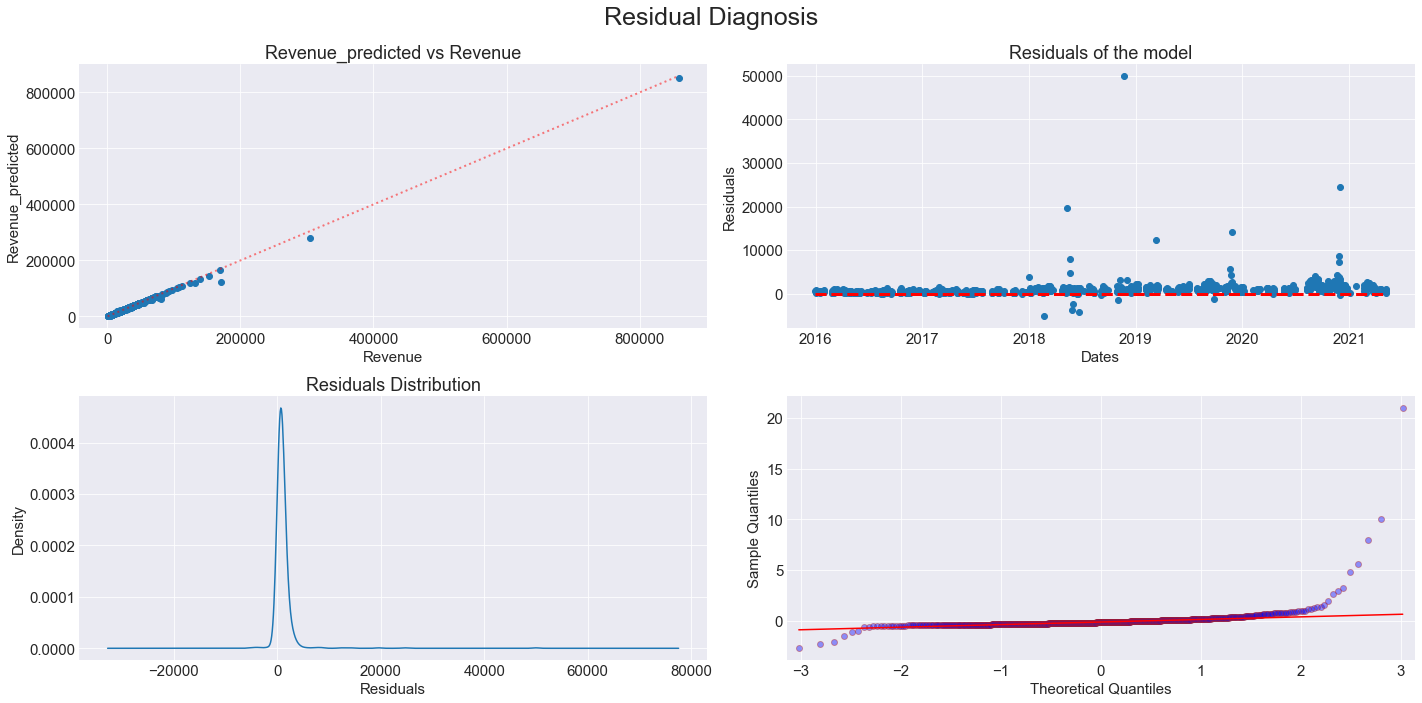

In [212]:
#Residual Analysis
draw_residuals_diagnosis(forecast_train, ['Revenue', 'Revenue_predicted', 'Residuals'])

#### Predict 

In [213]:
y_predict_test = nn3.predict(X_test_scaled)
y_pred = pd.DataFrame(y_predict_test, index= y_test.index, columns= [f'{y_test.name}_predicted'])

In [214]:
#Let's predict this model with Train Data
#y_predict_train = nn3.predict(X_train_scaled)
#y_predict_train = pd.Series(y_pred, index= y_train.index)
#y_predict_train = y_predict_train.rename(f'{y_train.name}_predicted')
#Create the new DataFrame with the Train y values and Train predict values
forecast_test = pd.concat([y_test.to_frame(), y_pred], axis= 1)

In [215]:
metric_rmse(forecast_test, 'Revenue')

35658.88239387639

<AxesSubplot:xlabel='Date'>

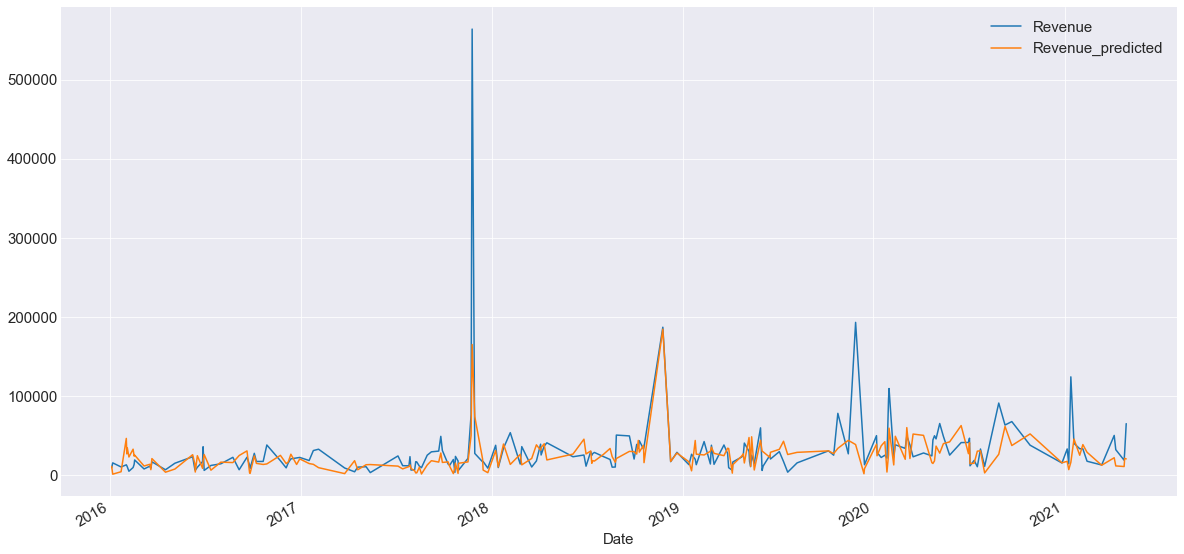

In [216]:
#Let's see the forecast
forecast_test.plot()

In [217]:
#R²
r2_score(forecast_test['Revenue'], forecast_test['Revenue_predicted'])

0.38826468672061487

In [295]:
data = data_full
period = 7
column = 'Revenue'
confidence = '95%'
#Convert list lags into arrays lags for manipulation
lags_a = np.array(lags)
#Prepare the scaler
scaler = get_scaler('robust')
#Forecast to return
forecast = pd.DataFrame()
#Confidence intervals
intervals = pd.DataFrame()
#Get the machine learning to train and use for forecasting
model = neurona
#Index for the forecast - period would be same as lags
index_range = create_date_range([data.index[-1] + pd.to_timedelta(1, 'D')], 'D', period)


#Need to prepare the data for forecasting. We need to merge the set for prediction because there are
#Some dummies which are not available. Mainly the seasonal and exogenous features
data_forecast = prepare_data_forecast(data, column, lags, period)
seasonal_forecast = prepare_seasonal_data(data)
#Need to concatenate by rows and then by columns
temp_forecast = pd.concat([seasonal_forecast, data_forecast])
data_forecast = pd.concat([temp_forecast, data[column]], axis= 1).fillna(0, downcast= 'infer')

#Therefore, we will have the forecast with all features needed otherwise, there will be missing some
#due to we use categorical ones for dates

#For each lag, we need to create a new model with the new lagged features
for i in range(period):
    #Let's start from i=0 means lag T-lags list -1, -2, and so on
    #from i=1 means lag T-lags array -1-1=T-2, -2-1=T-3 and so on 
    lag = lags_a + i

    #--Begin Training the model
    #Prepare the data for training
    data_model = prepare_data(data, column, lag)

    #Train and Test Split. However, we are not going to use Test
    X_train, X_test, y_train, y_test = time_series_train_test_split(data_model, lag)

    #Train the scaler with the X_train data
    scaler.fit(X_train)
    #Scale just Train
    X_train_scaled = scaler.transform(X_train)

    #Apply the fit to regressor
    model[i].fit(X_train_scaled, y_train, epochs= 300)
    
    y_predict_train = model[i].predict(X_train_scaled)
    y_predict_train = pd.DataFrame(y_predict_train, index= y_train.index, columns= [f'{y_train.name}_predicted'])
    predict_train = pd.concat([y_train.to_frame(), y_predict_train], axis= 1)
    predict_train['Residuals'] = predict_train[column] - predict_train[f'{column}_predicted']
    
    #Calculate the Standard Deviation
    std = predict_train['Residuals'].std()
    
    #Start with the prediction
    #Pick the <i> position value to forecast and so on and apply the scaler
    X_forecast = data_forecast.loc[index_range[0][i]][:-1]
    X_forecast = np.array(X_forecast).reshape(1, -1)
    X_forecast_scaled = scaler.transform(X_forecast)
    #Predict
    y_forecast = model[i].predict(X_forecast_scaled)
    
    y_forecast_serie = pd.Series(y_forecast[0], index= [index_range[0][i]])
    y_forecast_serie = y_forecast_serie.rename(f'{column}_forecast')
    
    #Now prepare the Confidence Intervals
    lower = y_forecast - get_confidence(confidence) * std
    upper = y_forecast + get_confidence(confidence) * std

    y_lower_serie = pd.Series(lower[0], index= [index_range[0][i]])
    y_lower_serie = y_lower_serie.rename(f'{column}_lower')
    
    y_upper_serie = pd.Series(upper[0], index= [index_range[0][i]])
    y_upper_serie = y_upper_serie.rename(f'{column}_upper')
    
    #Add the Series to the final Forecast DataFrame
    forecast = pd.concat([forecast, y_forecast_serie.to_frame()])
    #Add the Confidence Intervals
    intervals = pd.concat([intervals, pd.concat([y_lower_serie.to_frame(), y_upper_serie.to_frame()], axis= 1)])

final = pd.concat([forecast, intervals], axis= 1)

Epoch 1/300
25/25 [==============================] - 0s 1ms/step - loss: 10579.3936 - mean_absolute_percentage_error: 58.6188
Epoch 2/300
25/25 [==============================] - 0s 2ms/step - loss: 10466.0439 - mean_absolute_percentage_error: 56.9636
Epoch 3/300
25/25 [==============================] - 0s 2ms/step - loss: 10386.5098 - mean_absolute_percentage_error: 57.5436
Epoch 4/300
25/25 [==============================] - 0s 1ms/step - loss: 10323.2090 - mean_absolute_percentage_error: 55.6195
Epoch 5/300
25/25 [==============================] - 0s 2ms/step - loss: 10258.9023 - mean_absolute_percentage_error: 55.6088
Epoch 6/300
25/25 [==============================] - 0s 2ms/step - loss: 10251.9180 - mean_absolute_percentage_error: 55.0577
Epoch 7/300
25/25 [==============================] - 0s 2ms/step - loss: 10179.6855 - mean_absolute_percentage_error: 54.7899
Epoch 8/300
25/25 [==============================] - 0s 2ms/step - loss: 10142.5020 - mean_absolute_percentage_error: 

Epoch 66/300
25/25 [==============================] - 0s 2ms/step - loss: 9341.0195 - mean_absolute_percentage_error: 48.3372
Epoch 67/300
25/25 [==============================] - 0s 2ms/step - loss: 9321.7266 - mean_absolute_percentage_error: 48.3609
Epoch 68/300
25/25 [==============================] - 0s 2ms/step - loss: 9325.5664 - mean_absolute_percentage_error: 48.4768
Epoch 69/300
25/25 [==============================] - 0s 1ms/step - loss: 9311.8496 - mean_absolute_percentage_error: 47.8436
Epoch 70/300
25/25 [==============================] - 0s 2ms/step - loss: 9309.8457 - mean_absolute_percentage_error: 47.7459
Epoch 71/300
25/25 [==============================] - 0s 1ms/step - loss: 9283.9180 - mean_absolute_percentage_error: 47.1877
Epoch 72/300
25/25 [==============================] - 0s 1ms/step - loss: 9274.0645 - mean_absolute_percentage_error: 47.9436
Epoch 73/300
25/25 [==============================] - 0s 1ms/step - loss: 9265.9111 - mean_absolute_percentage_error: 

25/25 [==============================] - 0s 2ms/step - loss: 8599.6758 - mean_absolute_percentage_error: 43.1646
Epoch 131/300
25/25 [==============================] - 0s 2ms/step - loss: 8589.2158 - mean_absolute_percentage_error: 42.8177
Epoch 132/300
25/25 [==============================] - 0s 2ms/step - loss: 8584.9014 - mean_absolute_percentage_error: 42.7929
Epoch 133/300
25/25 [==============================] - 0s 2ms/step - loss: 8554.3301 - mean_absolute_percentage_error: 42.8812
Epoch 134/300
25/25 [==============================] - 0s 2ms/step - loss: 8554.3213 - mean_absolute_percentage_error: 43.0714
Epoch 135/300
25/25 [==============================] - 0s 1ms/step - loss: 8524.6201 - mean_absolute_percentage_error: 42.6579
Epoch 136/300
25/25 [==============================] - 0s 1ms/step - loss: 8516.0625 - mean_absolute_percentage_error: 42.3780
Epoch 137/300
25/25 [==============================] - 0s 1ms/step - loss: 8508.8506 - mean_absolute_percentage_error: 42.242

25/25 [==============================] - 0s 4ms/step - loss: 7667.4692 - mean_absolute_percentage_error: 37.2018
Epoch 195/300
25/25 [==============================] - 0s 2ms/step - loss: 7647.9932 - mean_absolute_percentage_error: 37.2492
Epoch 196/300
25/25 [==============================] - 0s 3ms/step - loss: 7609.5156 - mean_absolute_percentage_error: 37.1125
Epoch 197/300
25/25 [==============================] - 0s 3ms/step - loss: 7588.0503 - mean_absolute_percentage_error: 36.5148
Epoch 198/300
25/25 [==============================] - 0s 3ms/step - loss: 7613.6494 - mean_absolute_percentage_error: 37.1912
Epoch 199/300
25/25 [==============================] - 0s 4ms/step - loss: 7571.8853 - mean_absolute_percentage_error: 36.6967
Epoch 200/300
25/25 [==============================] - 0s 3ms/step - loss: 7561.2144 - mean_absolute_percentage_error: 36.8865
Epoch 201/300
25/25 [==============================] - 0s 2ms/step - loss: 7536.1235 - mean_absolute_percentage_error: 36.525

25/25 [==============================] - 0s 3ms/step - loss: 6708.0200 - mean_absolute_percentage_error: 30.3150
Epoch 259/300
25/25 [==============================] - 0s 2ms/step - loss: 6721.6499 - mean_absolute_percentage_error: 30.3668
Epoch 260/300
25/25 [==============================] - 0s 3ms/step - loss: 6711.8970 - mean_absolute_percentage_error: 30.6050
Epoch 261/300
25/25 [==============================] - 0s 4ms/step - loss: 6671.9468 - mean_absolute_percentage_error: 30.5531
Epoch 262/300
25/25 [==============================] - 0s 5ms/step - loss: 6658.2583 - mean_absolute_percentage_error: 30.4555
Epoch 263/300
25/25 [==============================] - 0s 5ms/step - loss: 6663.8032 - mean_absolute_percentage_error: 30.1557
Epoch 264/300
25/25 [==============================] - 0s 5ms/step - loss: 6636.0620 - mean_absolute_percentage_error: 30.2054
Epoch 265/300
25/25 [==============================] - 0s 5ms/step - loss: 6650.4282 - mean_absolute_percentage_error: 30.451

24/24 [==============================] - 0s 4ms/step - loss: 11436.2773 - mean_absolute_percentage_error: 45.1225
Epoch 23/300
24/24 [==============================] - 0s 4ms/step - loss: 11378.7412 - mean_absolute_percentage_error: 44.8455
Epoch 24/300
24/24 [==============================] - 0s 5ms/step - loss: 11349.2920 - mean_absolute_percentage_error: 45.4788
Epoch 25/300
24/24 [==============================] - 0s 4ms/step - loss: 11321.6670 - mean_absolute_percentage_error: 44.4168
Epoch 26/300
24/24 [==============================] - 0s 3ms/step - loss: 11256.3281 - mean_absolute_percentage_error: 44.1729
Epoch 27/300
24/24 [==============================] - 0s 3ms/step - loss: 11246.5410 - mean_absolute_percentage_error: 44.2372
Epoch 28/300
24/24 [==============================] - 0s 4ms/step - loss: 11197.9316 - mean_absolute_percentage_error: 43.3479
Epoch 29/300
24/24 [==============================] - 0s 3ms/step - loss: 11154.8203 - mean_absolute_percentage_error: 43.51

24/24 [==============================] - 0s 8ms/step - loss: 9551.4912 - mean_absolute_percentage_error: 34.6570
Epoch 87/300
24/24 [==============================] - 0s 6ms/step - loss: 9479.9570 - mean_absolute_percentage_error: 34.4147
Epoch 88/300
24/24 [==============================] - 0s 6ms/step - loss: 9475.9922 - mean_absolute_percentage_error: 34.2482
Epoch 89/300
24/24 [==============================] - 0s 6ms/step - loss: 9437.7266 - mean_absolute_percentage_error: 34.1681
Epoch 90/300
24/24 [==============================] - 0s 6ms/step - loss: 9414.1162 - mean_absolute_percentage_error: 34.0028
Epoch 91/300
24/24 [==============================] - 0s 6ms/step - loss: 9368.0088 - mean_absolute_percentage_error: 33.9392
Epoch 92/300
24/24 [==============================] - 0s 5ms/step - loss: 9343.1074 - mean_absolute_percentage_error: 33.5454
Epoch 93/300
24/24 [==============================] - 0s 5ms/step - loss: 9338.1250 - mean_absolute_percentage_error: 33.5622
Epoch

24/24 [==============================] - 0s 6ms/step - loss: 8066.5845 - mean_absolute_percentage_error: 26.5141
Epoch 151/300
24/24 [==============================] - 0s 7ms/step - loss: 8016.8413 - mean_absolute_percentage_error: 26.1990
Epoch 152/300
24/24 [==============================] - 0s 5ms/step - loss: 8064.6973 - mean_absolute_percentage_error: 26.3825
Epoch 153/300
24/24 [==============================] - 0s 5ms/step - loss: 8030.6162 - mean_absolute_percentage_error: 26.0668
Epoch 154/300
24/24 [==============================] - 0s 5ms/step - loss: 7997.5938 - mean_absolute_percentage_error: 25.9572
Epoch 155/300
24/24 [==============================] - 0s 6ms/step - loss: 7992.3486 - mean_absolute_percentage_error: 25.7531
Epoch 156/300
24/24 [==============================] - 0s 6ms/step - loss: 7951.3267 - mean_absolute_percentage_error: 25.7861
Epoch 157/300
24/24 [==============================] - 0s 6ms/step - loss: 7944.7969 - mean_absolute_percentage_error: 25.791

24/24 [==============================] - 0s 6ms/step - loss: 6893.3140 - mean_absolute_percentage_error: 20.3264
Epoch 215/300
24/24 [==============================] - 0s 6ms/step - loss: 6850.5283 - mean_absolute_percentage_error: 20.1706
Epoch 216/300
24/24 [==============================] - 0s 4ms/step - loss: 6840.3950 - mean_absolute_percentage_error: 20.2755
Epoch 217/300
24/24 [==============================] - 0s 4ms/step - loss: 6785.6367 - mean_absolute_percentage_error: 19.8205
Epoch 218/300
24/24 [==============================] - 0s 6ms/step - loss: 6813.3706 - mean_absolute_percentage_error: 19.7534
Epoch 219/300
24/24 [==============================] - 0s 4ms/step - loss: 6787.2407 - mean_absolute_percentage_error: 19.7739
Epoch 220/300
24/24 [==============================] - 0s 4ms/step - loss: 6757.5542 - mean_absolute_percentage_error: 19.6339
Epoch 221/300
24/24 [==============================] - 0s 3ms/step - loss: 6764.3281 - mean_absolute_percentage_error: 19.910

24/24 [==============================] - 0s 6ms/step - loss: 5771.4727 - mean_absolute_percentage_error: 15.4973
Epoch 279/300
24/24 [==============================] - 0s 5ms/step - loss: 5685.4248 - mean_absolute_percentage_error: 15.1979
Epoch 280/300
24/24 [==============================] - 0s 6ms/step - loss: 5699.1665 - mean_absolute_percentage_error: 15.0665
Epoch 281/300
24/24 [==============================] - 0s 6ms/step - loss: 5695.7925 - mean_absolute_percentage_error: 14.9954
Epoch 282/300
24/24 [==============================] - 0s 6ms/step - loss: 5648.4478 - mean_absolute_percentage_error: 15.0523
Epoch 283/300
24/24 [==============================] - 0s 6ms/step - loss: 5698.0137 - mean_absolute_percentage_error: 15.2458
Epoch 284/300
24/24 [==============================] - 0s 7ms/step - loss: 5660.4639 - mean_absolute_percentage_error: 14.8554
Epoch 285/300
24/24 [==============================] - 0s 5ms/step - loss: 5586.2056 - mean_absolute_percentage_error: 14.996

Epoch 43/300
25/25 [==============================] - 0s 5ms/step - loss: 8322.5918 - mean_absolute_percentage_error: 47.2774
Epoch 44/300
25/25 [==============================] - 0s 5ms/step - loss: 8332.6943 - mean_absolute_percentage_error: 47.1491
Epoch 45/300
25/25 [==============================] - 0s 4ms/step - loss: 8284.0469 - mean_absolute_percentage_error: 47.3591
Epoch 46/300
25/25 [==============================] - 0s 3ms/step - loss: 8219.2773 - mean_absolute_percentage_error: 47.1525
Epoch 47/300
25/25 [==============================] - 0s 3ms/step - loss: 8219.6787 - mean_absolute_percentage_error: 47.3729
Epoch 48/300
25/25 [==============================] - 0s 3ms/step - loss: 8167.6118 - mean_absolute_percentage_error: 46.3709
Epoch 49/300
25/25 [==============================] - 0s 3ms/step - loss: 8167.6040 - mean_absolute_percentage_error: 46.6231
Epoch 50/300
25/25 [==============================] - 0s 5ms/step - loss: 8148.6934 - mean_absolute_percentage_error: 

25/25 [==============================] - 0s 4ms/step - loss: 6876.7290 - mean_absolute_percentage_error: 37.5984
Epoch 108/300
25/25 [==============================] - 0s 5ms/step - loss: 6842.6240 - mean_absolute_percentage_error: 37.4716
Epoch 109/300
25/25 [==============================] - 0s 5ms/step - loss: 6812.5566 - mean_absolute_percentage_error: 37.5136
Epoch 110/300
25/25 [==============================] - 0s 5ms/step - loss: 6815.4961 - mean_absolute_percentage_error: 37.6079
Epoch 111/300
25/25 [==============================] - 0s 4ms/step - loss: 6844.5112 - mean_absolute_percentage_error: 36.9079
Epoch 112/300
25/25 [==============================] - 0s 5ms/step - loss: 6745.6934 - mean_absolute_percentage_error: 36.8661
Epoch 113/300
25/25 [==============================] - 0s 6ms/step - loss: 6736.1733 - mean_absolute_percentage_error: 37.1002
Epoch 114/300
25/25 [==============================] - 0s 6ms/step - loss: 6732.8135 - mean_absolute_percentage_error: 36.878

25/25 [==============================] - 0s 4ms/step - loss: 5687.1421 - mean_absolute_percentage_error: 27.5064
Epoch 172/300
25/25 [==============================] - 0s 3ms/step - loss: 5711.6792 - mean_absolute_percentage_error: 27.2899: 0s - loss: 6136.1035 - mean_absolute_percentage_error: 30.21
Epoch 173/300
25/25 [==============================] - 0s 4ms/step - loss: 5682.5566 - mean_absolute_percentage_error: 27.3663
Epoch 174/300
25/25 [==============================] - 0s 3ms/step - loss: 5634.8057 - mean_absolute_percentage_error: 26.7619
Epoch 175/300
25/25 [==============================] - 0s 3ms/step - loss: 5580.0352 - mean_absolute_percentage_error: 26.6989
Epoch 176/300
25/25 [==============================] - 0s 3ms/step - loss: 5607.0488 - mean_absolute_percentage_error: 26.5407
Epoch 177/300
25/25 [==============================] - 0s 3ms/step - loss: 5599.0518 - mean_absolute_percentage_error: 26.7836
Epoch 178/300
25/25 [==============================] - 0s 3ms/s

25/25 [==============================] - 0s 3ms/step - loss: 4645.9595 - mean_absolute_percentage_error: 20.5942
Epoch 235/300
25/25 [==============================] - 0s 5ms/step - loss: 4642.5605 - mean_absolute_percentage_error: 20.6155
Epoch 236/300
25/25 [==============================] - 0s 4ms/step - loss: 4685.7207 - mean_absolute_percentage_error: 20.9372
Epoch 237/300
25/25 [==============================] - 0s 4ms/step - loss: 4632.9116 - mean_absolute_percentage_error: 20.5083
Epoch 238/300
25/25 [==============================] - 0s 4ms/step - loss: 4641.1846 - mean_absolute_percentage_error: 20.5250
Epoch 239/300
25/25 [==============================] - 0s 3ms/step - loss: 4562.1230 - mean_absolute_percentage_error: 20.0130
Epoch 240/300
25/25 [==============================] - 0s 3ms/step - loss: 4606.6519 - mean_absolute_percentage_error: 20.4802
Epoch 241/300
25/25 [==============================] - 0s 2ms/step - loss: 4613.8687 - mean_absolute_percentage_error: 20.761

25/25 [==============================] - 0s 3ms/step - loss: 3783.3623 - mean_absolute_percentage_error: 15.6512
Epoch 299/300
25/25 [==============================] - 0s 4ms/step - loss: 3841.5239 - mean_absolute_percentage_error: 16.1070
Epoch 300/300
25/25 [==============================] - 0s 3ms/step - loss: 3831.6567 - mean_absolute_percentage_error: 16.0537
Epoch 1/300
25/25 [==============================] - 0s 2ms/step - loss: 11348.6777 - mean_absolute_percentage_error: 59.2334
Epoch 2/300
25/25 [==============================] - 0s 2ms/step - loss: 11175.4727 - mean_absolute_percentage_error: 58.7159
Epoch 3/300
25/25 [==============================] - 0s 2ms/step - loss: 10979.4678 - mean_absolute_percentage_error: 57.9828
Epoch 4/300
25/25 [==============================] - 0s 3ms/step - loss: 10935.7451 - mean_absolute_percentage_error: 57.1079
Epoch 5/300
25/25 [==============================] - 0s 4ms/step - loss: 10856.4307 - mean_absolute_percentage_error: 56.7307
Epo

25/25 [==============================] - 0s 3ms/step - loss: 8765.4004 - mean_absolute_percentage_error: 42.6595
Epoch 64/300
25/25 [==============================] - 0s 4ms/step - loss: 8711.7373 - mean_absolute_percentage_error: 42.3134
Epoch 65/300
25/25 [==============================] - 0s 2ms/step - loss: 8705.8291 - mean_absolute_percentage_error: 42.4827
Epoch 66/300
25/25 [==============================] - 0s 3ms/step - loss: 8690.4775 - mean_absolute_percentage_error: 42.4495
Epoch 67/300
25/25 [==============================] - 0s 3ms/step - loss: 8672.1680 - mean_absolute_percentage_error: 42.3291
Epoch 68/300
25/25 [==============================] - 0s 3ms/step - loss: 8637.1787 - mean_absolute_percentage_error: 42.4096
Epoch 69/300
25/25 [==============================] - 0s 3ms/step - loss: 8604.2061 - mean_absolute_percentage_error: 41.9859
Epoch 70/300
25/25 [==============================] - 0s 3ms/step - loss: 8575.5459 - mean_absolute_percentage_error: 41.7327: 0s -

25/25 [==============================] - 0s 2ms/step - loss: 7367.4600 - mean_absolute_percentage_error: 34.5990
Epoch 128/300
25/25 [==============================] - 0s 3ms/step - loss: 7308.4395 - mean_absolute_percentage_error: 34.4237
Epoch 129/300
25/25 [==============================] - 0s 4ms/step - loss: 7298.3779 - mean_absolute_percentage_error: 34.1126
Epoch 130/300
25/25 [==============================] - 0s 3ms/step - loss: 7269.0781 - mean_absolute_percentage_error: 34.0173
Epoch 131/300
25/25 [==============================] - 0s 3ms/step - loss: 7290.0552 - mean_absolute_percentage_error: 33.9628
Epoch 132/300
25/25 [==============================] - 0s 3ms/step - loss: 7229.0815 - mean_absolute_percentage_error: 33.7451
Epoch 133/300
25/25 [==============================] - 0s 6ms/step - loss: 7221.4937 - mean_absolute_percentage_error: 33.9383
Epoch 134/300
25/25 [==============================] - 0s 8ms/step - loss: 7187.4355 - mean_absolute_percentage_error: 33.743

25/25 [==============================] - 0s 3ms/step - loss: 5887.4941 - mean_absolute_percentage_error: 24.5543
Epoch 192/300
25/25 [==============================] - 0s 3ms/step - loss: 5887.9409 - mean_absolute_percentage_error: 24.6974
Epoch 193/300
25/25 [==============================] - 0s 3ms/step - loss: 5832.4355 - mean_absolute_percentage_error: 24.1660
Epoch 194/300
25/25 [==============================] - 0s 3ms/step - loss: 5845.8281 - mean_absolute_percentage_error: 24.3563
Epoch 195/300
25/25 [==============================] - 0s 3ms/step - loss: 5795.6875 - mean_absolute_percentage_error: 24.2015
Epoch 196/300
25/25 [==============================] - 0s 3ms/step - loss: 5754.8975 - mean_absolute_percentage_error: 23.4271
Epoch 197/300
25/25 [==============================] - 0s 3ms/step - loss: 5804.8491 - mean_absolute_percentage_error: 23.8828
Epoch 198/300
25/25 [==============================] - 0s 2ms/step - loss: 5742.4307 - mean_absolute_percentage_error: 23.706

25/25 [==============================] - 0s 3ms/step - loss: 4805.9937 - mean_absolute_percentage_error: 14.9976
Epoch 256/300
25/25 [==============================] - 0s 4ms/step - loss: 4814.2554 - mean_absolute_percentage_error: 14.6603
Epoch 257/300
25/25 [==============================] - 0s 4ms/step - loss: 4769.5244 - mean_absolute_percentage_error: 14.8006
Epoch 258/300
25/25 [==============================] - 0s 3ms/step - loss: 4711.3916 - mean_absolute_percentage_error: 14.1906
Epoch 259/300
25/25 [==============================] - 0s 4ms/step - loss: 4720.2739 - mean_absolute_percentage_error: 14.4901
Epoch 260/300
25/25 [==============================] - 0s 4ms/step - loss: 4738.8984 - mean_absolute_percentage_error: 14.7134
Epoch 261/300
25/25 [==============================] - 0s 3ms/step - loss: 4692.9307 - mean_absolute_percentage_error: 14.1696
Epoch 262/300
25/25 [==============================] - 0s 4ms/step - loss: 4733.1177 - mean_absolute_percentage_error: 14.517

25/25 [==============================] - 0s 2ms/step - loss: 10877.8779 - mean_absolute_percentage_error: 42.2933
Epoch 20/300
25/25 [==============================] - 0s 6ms/step - loss: 10812.9707 - mean_absolute_percentage_error: 42.2130
Epoch 21/300
25/25 [==============================] - 0s 4ms/step - loss: 10752.5098 - mean_absolute_percentage_error: 41.6764
Epoch 22/300
25/25 [==============================] - 0s 4ms/step - loss: 10734.7344 - mean_absolute_percentage_error: 41.5553
Epoch 23/300
25/25 [==============================] - 0s 4ms/step - loss: 10660.0898 - mean_absolute_percentage_error: 41.4660
Epoch 24/300
25/25 [==============================] - 0s 4ms/step - loss: 10610.7686 - mean_absolute_percentage_error: 41.4130
Epoch 25/300
25/25 [==============================] - 0s 4ms/step - loss: 10563.0312 - mean_absolute_percentage_error: 41.0460
Epoch 26/300
25/25 [==============================] - 0s 4ms/step - loss: 10547.7881 - mean_absolute_percentage_error: 40.97

Epoch 84/300
25/25 [==============================] - 0s 4ms/step - loss: 8590.4922 - mean_absolute_percentage_error: 31.7560
Epoch 85/300
25/25 [==============================] - 0s 6ms/step - loss: 8575.5352 - mean_absolute_percentage_error: 31.4629
Epoch 86/300
25/25 [==============================] - 0s 4ms/step - loss: 8535.6182 - mean_absolute_percentage_error: 31.5693
Epoch 87/300
25/25 [==============================] - 0s 4ms/step - loss: 8521.8174 - mean_absolute_percentage_error: 31.2393
Epoch 88/300
25/25 [==============================] - 0s 4ms/step - loss: 8485.4893 - mean_absolute_percentage_error: 30.9783
Epoch 89/300
25/25 [==============================] - 0s 4ms/step - loss: 8454.3389 - mean_absolute_percentage_error: 31.0594
Epoch 90/300
25/25 [==============================] - 0s 5ms/step - loss: 8443.3467 - mean_absolute_percentage_error: 30.8716
Epoch 91/300
25/25 [==============================] - 0s 5ms/step - loss: 8414.9121 - mean_absolute_percentage_error: 

25/25 [==============================] - 0s 3ms/step - loss: 7007.6460 - mean_absolute_percentage_error: 23.2348
Epoch 149/300
25/25 [==============================] - 0s 3ms/step - loss: 6962.4126 - mean_absolute_percentage_error: 23.0223
Epoch 150/300
25/25 [==============================] - 0s 4ms/step - loss: 6952.5239 - mean_absolute_percentage_error: 22.9628
Epoch 151/300
25/25 [==============================] - 0s 3ms/step - loss: 6915.5137 - mean_absolute_percentage_error: 22.7483
Epoch 152/300
25/25 [==============================] - 0s 3ms/step - loss: 6874.3652 - mean_absolute_percentage_error: 22.5768
Epoch 153/300
25/25 [==============================] - 0s 4ms/step - loss: 6872.2544 - mean_absolute_percentage_error: 22.5407
Epoch 154/300
25/25 [==============================] - 0s 4ms/step - loss: 6857.7603 - mean_absolute_percentage_error: 22.3964
Epoch 155/300
25/25 [==============================] - 0s 6ms/step - loss: 6819.4639 - mean_absolute_percentage_error: 22.331

25/25 [==============================] - 0s 5ms/step - loss: 5584.4238 - mean_absolute_percentage_error: 16.7254
Epoch 213/300
25/25 [==============================] - 0s 6ms/step - loss: 5606.2114 - mean_absolute_percentage_error: 16.9374
Epoch 214/300
25/25 [==============================] - 0s 6ms/step - loss: 5568.8276 - mean_absolute_percentage_error: 16.6327
Epoch 215/300
25/25 [==============================] - 0s 4ms/step - loss: 5521.8081 - mean_absolute_percentage_error: 16.2954
Epoch 216/300
25/25 [==============================] - 0s 5ms/step - loss: 5560.3809 - mean_absolute_percentage_error: 16.6384
Epoch 217/300
25/25 [==============================] - 0s 4ms/step - loss: 5512.0181 - mean_absolute_percentage_error: 16.4103
Epoch 218/300
25/25 [==============================] - 0s 5ms/step - loss: 5500.7158 - mean_absolute_percentage_error: 16.4477
Epoch 219/300
25/25 [==============================] - 0s 5ms/step - loss: 5490.8198 - mean_absolute_percentage_error: 16.513

25/25 [==============================] - 0s 3ms/step - loss: 4478.3340 - mean_absolute_percentage_error: 12.2065
Epoch 277/300
25/25 [==============================] - 0s 2ms/step - loss: 4454.4971 - mean_absolute_percentage_error: 12.1171
Epoch 278/300
25/25 [==============================] - 0s 4ms/step - loss: 4422.7407 - mean_absolute_percentage_error: 12.0813
Epoch 279/300
25/25 [==============================] - 0s 3ms/step - loss: 4395.9243 - mean_absolute_percentage_error: 11.8359
Epoch 280/300
25/25 [==============================] - 0s 4ms/step - loss: 4395.4775 - mean_absolute_percentage_error: 12.0031
Epoch 281/300
25/25 [==============================] - 0s 6ms/step - loss: 4400.6582 - mean_absolute_percentage_error: 11.9793
Epoch 282/300
25/25 [==============================] - 0s 3ms/step - loss: 4327.8228 - mean_absolute_percentage_error: 11.6897
Epoch 283/300
25/25 [==============================] - 0s 3ms/step - loss: 4332.2397 - mean_absolute_percentage_error: 11.795

24/24 [==============================] - 0s 4ms/step - loss: 7320.2622 - mean_absolute_percentage_error: 57.9690
Epoch 41/300
24/24 [==============================] - 0s 4ms/step - loss: 7266.8345 - mean_absolute_percentage_error: 57.6669
Epoch 42/300
24/24 [==============================] - 0s 6ms/step - loss: 7274.8530 - mean_absolute_percentage_error: 57.3418
Epoch 43/300
24/24 [==============================] - 0s 4ms/step - loss: 7222.6646 - mean_absolute_percentage_error: 57.5173
Epoch 44/300
24/24 [==============================] - 0s 4ms/step - loss: 7218.1699 - mean_absolute_percentage_error: 57.6112
Epoch 45/300
24/24 [==============================] - 0s 5ms/step - loss: 7153.8745 - mean_absolute_percentage_error: 58.0539
Epoch 46/300
24/24 [==============================] - 0s 6ms/step - loss: 7140.0562 - mean_absolute_percentage_error: 56.5766
Epoch 47/300
24/24 [==============================] - 0s 5ms/step - loss: 7099.4531 - mean_absolute_percentage_error: 56.9491
Epoch

24/24 [==============================] - 0s 4ms/step - loss: 5687.7993 - mean_absolute_percentage_error: 43.0348
Epoch 106/300
24/24 [==============================] - 0s 5ms/step - loss: 5661.2266 - mean_absolute_percentage_error: 42.2242
Epoch 107/300
24/24 [==============================] - 0s 7ms/step - loss: 5694.7114 - mean_absolute_percentage_error: 42.3834
Epoch 108/300
24/24 [==============================] - 0s 6ms/step - loss: 5627.0298 - mean_absolute_percentage_error: 42.1756
Epoch 109/300
24/24 [==============================] - 0s 4ms/step - loss: 5623.0542 - mean_absolute_percentage_error: 42.2414
Epoch 110/300
24/24 [==============================] - 0s 5ms/step - loss: 5590.5493 - mean_absolute_percentage_error: 42.1286
Epoch 111/300
24/24 [==============================] - 0s 5ms/step - loss: 5593.9604 - mean_absolute_percentage_error: 41.6431
Epoch 112/300
24/24 [==============================] - 0s 3ms/step - loss: 5538.8413 - mean_absolute_percentage_error: 41.675

24/24 [==============================] - 0s 6ms/step - loss: 4544.4121 - mean_absolute_percentage_error: 29.2131
Epoch 170/300
24/24 [==============================] - 0s 7ms/step - loss: 4524.6147 - mean_absolute_percentage_error: 28.6662
Epoch 171/300
24/24 [==============================] - 0s 6ms/step - loss: 4517.2241 - mean_absolute_percentage_error: 28.4355
Epoch 172/300
24/24 [==============================] - 0s 7ms/step - loss: 4502.0356 - mean_absolute_percentage_error: 28.4311
Epoch 173/300
24/24 [==============================] - 0s 6ms/step - loss: 4495.8037 - mean_absolute_percentage_error: 27.7730
Epoch 174/300
24/24 [==============================] - 0s 6ms/step - loss: 4472.9224 - mean_absolute_percentage_error: 26.8181
Epoch 175/300
24/24 [==============================] - 0s 6ms/step - loss: 4454.8296 - mean_absolute_percentage_error: 28.1282
Epoch 176/300
24/24 [==============================] - 0s 5ms/step - loss: 4428.3853 - mean_absolute_percentage_error: 26.933

24/24 [==============================] - 0s 6ms/step - loss: 3595.3928 - mean_absolute_percentage_error: 15.9154
Epoch 234/300
24/24 [==============================] - 0s 5ms/step - loss: 3523.1663 - mean_absolute_percentage_error: 15.4032
Epoch 235/300
24/24 [==============================] - 0s 6ms/step - loss: 3572.8713 - mean_absolute_percentage_error: 15.7495
Epoch 236/300
24/24 [==============================] - 0s 9ms/step - loss: 3567.3206 - mean_absolute_percentage_error: 15.6095
Epoch 237/300
24/24 [==============================] - 0s 6ms/step - loss: 3521.0840 - mean_absolute_percentage_error: 15.3551
Epoch 238/300
24/24 [==============================] - 0s 6ms/step - loss: 3515.8679 - mean_absolute_percentage_error: 15.2255
Epoch 239/300
24/24 [==============================] - 0s 6ms/step - loss: 3481.5105 - mean_absolute_percentage_error: 15.0832
Epoch 240/300
24/24 [==============================] - 0s 5ms/step - loss: 3528.3213 - mean_absolute_percentage_error: 15.287

24/24 [==============================] - 0s 16ms/step - loss: 2794.5723 - mean_absolute_percentage_error: 10.8709
Epoch 298/300
24/24 [==============================] - 1s 39ms/step - loss: 2800.7542 - mean_absolute_percentage_error: 10.9962
Epoch 299/300
24/24 [==============================] - 1s 21ms/step - loss: 2814.5369 - mean_absolute_percentage_error: 11.0390
Epoch 300/300
24/24 [==============================] - 1s 30ms/step - loss: 2740.9014 - mean_absolute_percentage_error: 10.6586
Epoch 1/300
25/25 [==============================] - 0s 17ms/step - loss: 10862.8740 - mean_absolute_percentage_error: 43.5768
Epoch 2/300
25/25 [==============================] - 0s 12ms/step - loss: 10786.6045 - mean_absolute_percentage_error: 43.0594
Epoch 3/300
25/25 [==============================] - 0s 17ms/step - loss: 10656.5322 - mean_absolute_percentage_error: 42.7198
Epoch 4/300
25/25 [==============================] - 1s 27ms/step - loss: 10604.3799 - mean_absolute_percentage_error: 42

25/25 [==============================] - 0s 8ms/step - loss: 8670.1396 - mean_absolute_percentage_error: 33.9301
Epoch 60/300
25/25 [==============================] - 0s 4ms/step - loss: 8678.1836 - mean_absolute_percentage_error: 33.9503
Epoch 61/300
25/25 [==============================] - 0s 4ms/step - loss: 8659.3486 - mean_absolute_percentage_error: 33.8432
Epoch 62/300
25/25 [==============================] - 0s 3ms/step - loss: 8640.6455 - mean_absolute_percentage_error: 33.5243
Epoch 63/300
25/25 [==============================] - 0s 3ms/step - loss: 8604.2139 - mean_absolute_percentage_error: 33.6961
Epoch 64/300
25/25 [==============================] - 0s 4ms/step - loss: 8554.4463 - mean_absolute_percentage_error: 33.4261
Epoch 65/300
25/25 [==============================] - 0s 3ms/step - loss: 8524.9492 - mean_absolute_percentage_error: 33.1194
Epoch 66/300
25/25 [==============================] - 0s 3ms/step - loss: 8501.3311 - mean_absolute_percentage_error: 33.2557
Epoch

25/25 [==============================] - 0s 3ms/step - loss: 7265.6265 - mean_absolute_percentage_error: 27.2334
Epoch 124/300
25/25 [==============================] - 0s 4ms/step - loss: 7234.3188 - mean_absolute_percentage_error: 27.0473
Epoch 125/300
25/25 [==============================] - 0s 4ms/step - loss: 7230.7754 - mean_absolute_percentage_error: 26.8056
Epoch 126/300
25/25 [==============================] - 0s 6ms/step - loss: 7197.5938 - mean_absolute_percentage_error: 26.7522
Epoch 127/300
25/25 [==============================] - 0s 4ms/step - loss: 7229.8784 - mean_absolute_percentage_error: 26.9469
Epoch 128/300
25/25 [==============================] - 0s 5ms/step - loss: 7171.1387 - mean_absolute_percentage_error: 26.4850
Epoch 129/300
25/25 [==============================] - 0s 4ms/step - loss: 7186.4897 - mean_absolute_percentage_error: 26.6538
Epoch 130/300
25/25 [==============================] - 0s 5ms/step - loss: 7156.0674 - mean_absolute_percentage_error: 26.243

25/25 [==============================] - 0s 5ms/step - loss: 6187.0117 - mean_absolute_percentage_error: 21.3000
Epoch 188/300
25/25 [==============================] - 0s 5ms/step - loss: 6151.3687 - mean_absolute_percentage_error: 21.1362
Epoch 189/300
25/25 [==============================] - 0s 5ms/step - loss: 6167.6270 - mean_absolute_percentage_error: 21.3159
Epoch 190/300
25/25 [==============================] - 0s 6ms/step - loss: 6103.8081 - mean_absolute_percentage_error: 20.9609
Epoch 191/300
25/25 [==============================] - 0s 3ms/step - loss: 6107.7930 - mean_absolute_percentage_error: 20.9071
Epoch 192/300
25/25 [==============================] - 0s 3ms/step - loss: 6061.5894 - mean_absolute_percentage_error: 20.8846
Epoch 193/300
25/25 [==============================] - 0s 3ms/step - loss: 6082.6353 - mean_absolute_percentage_error: 20.7322
Epoch 194/300
25/25 [==============================] - 0s 5ms/step - loss: 6035.5234 - mean_absolute_percentage_error: 20.720

25/25 [==============================] - 0s 5ms/step - loss: 5150.4907 - mean_absolute_percentage_error: 16.7376
Epoch 252/300
25/25 [==============================] - 0s 4ms/step - loss: 5122.5200 - mean_absolute_percentage_error: 16.6747
Epoch 253/300
25/25 [==============================] - 0s 5ms/step - loss: 5069.8281 - mean_absolute_percentage_error: 16.3521
Epoch 254/300
25/25 [==============================] - 0s 5ms/step - loss: 5052.0420 - mean_absolute_percentage_error: 16.2933
Epoch 255/300
25/25 [==============================] - 0s 3ms/step - loss: 5055.0303 - mean_absolute_percentage_error: 16.3858
Epoch 256/300
25/25 [==============================] - 0s 4ms/step - loss: 5022.0273 - mean_absolute_percentage_error: 16.1494
Epoch 257/300
25/25 [==============================] - 0s 4ms/step - loss: 5037.4795 - mean_absolute_percentage_error: 16.5171
Epoch 258/300
25/25 [==============================] - 0s 5ms/step - loss: 4982.8696 - mean_absolute_percentage_error: 16.122

In [296]:
final

Revenue_forecast  Revenue_lower  Revenue_upper
2021-06-14      37669.621094   15231.175781   60108.066406
2021-06-15      58068.281250   -2862.003906  118998.562500
2021-06-16      27953.523438  -13878.289062   69785.335938
2021-06-17      36178.152344   -3002.367188   75358.671875
2021-06-18      27557.554688  -14958.488281   70073.593750
2021-06-19      49669.449219   19773.884766   79565.015625
2021-06-20      57241.785156   22239.972656   92243.593750

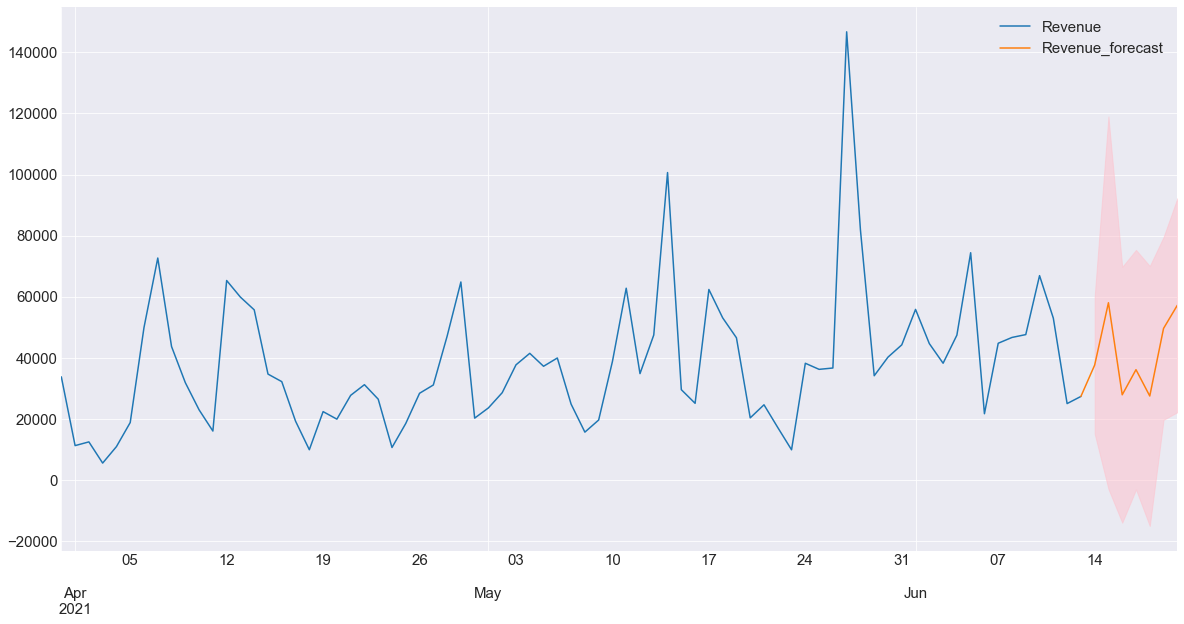

In [297]:
data_full_forecast_neurona = data_full[['Revenue']]
data_full_forecast_neurona = pd.concat([data_full_forecast_neurona, final])

data_full_forecast_neurona['Revenue_forecast'].loc[data_full.index[-1]] = \
data_full_forecast_neurona.loc[data_full.index[-1]]['Revenue']

data_full_forecast_neurona.loc['2021-03-31':][['Revenue', 'Revenue_forecast']].plot()
plt.fill_between(data_full_forecast_neurona.index, data_full_forecast_neurona['Revenue_lower'],
                 data_full_forecast_neurona['Revenue_upper'], color='pink', alpha=0.5)

Metodos clásicos

    Naive 2, which is actually a random walk model adjusted for season.
    Simple Exponential Smoothing.
    Holt.
    Damped exponential smoothing.
    Average of SES, Holt, and Damped.
    Theta method.
    ARIMA, automatic.
    ETS, automatic.
Métodos Machine Learning

    Multi-Layer Perceptron (MLP)
    Bayesian Neural Network (BNN)
    Radial Basis Functions (RBF)
    Generalized Regression Neural Networks (GRNN), also called kernel regression
    K-Nearest Neighbor regression (KNN)
    CART regression trees (CART)
    Support Vector Regression (SVR)
    Gaussian Processes (GP)
Redes Neuronales

    Recurrent Neural Network (RNN)
    Long Short-Term Memory (LSTM)
